## Introduction
Retailkart.com is a small and medium-scale organization that deals in wine, fruit and meat products, holding around 35% offline market share. The company has been leading the domain offline for a long time. Due to increased competition, they decided to move online as well. But there are many challenges that the company has to overcome to stay competitive in the market.

Churn Rate Analysis Accurately segregating segments and identifying customers with a high probability of churn would be the first step towards solving the problem. The next step would be to create a detailed action plan for the identified cohorts. For example, showing only premium brand products to a segment of customers who are well-equipped economically.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading Dataset

In [2]:
data = pd.read_csv("User+App+Behaviour.csv", encoding="UTF-8")
data.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

<b>Note: </b>There are 20 features in the dataset, 15 of which are of datatype 'numeric' (int/float), and 5 of object datatype. <u>However, it can be noticed that a few categorical variables have been wrongly represented as numeric, and will have to be corrected.</u> <br>
There's also presence of a few <u>missing values</u> in the dataset, which will have to be addressed

In [4]:
data.shape

(5630, 20)

<u>Dataset Dimensions</u>: 5630 rows and 20 columns, representing records of 5630 customers using 20 features. 

In [5]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [6]:
data.isna().sum().sum()

1856

<b>Note: </b>There are <u>1856 missing values</u> in the dataset. These occur in 7 features/columns. 

In [7]:
data.duplicated().sum()

0

No duplicate records found in the dataset

In [8]:
data.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.221492  
std       2.939680           3.654433       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

<b>Note: </b>5 categorical columns are featured as numeric: CustomerID, Churn, CityTier, SatisfactionScore and Complain. 

#### Hence, before proceeding with summary statistics, let us first correct the data types of those categorical variables that have a numeric data type.

In [9]:
data_dt = data.copy()

In [10]:
data_dt[['CustomerID', 'Churn', 'CityTier', 'SatisfactionScore', 'Complain']] = data_dt[['CustomerID', 'Churn', 'CityTier', 'SatisfactionScore', 'Complain']].astype('object')


In [11]:
data_dt.describe()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
count  5366.000000      5379.000000     5375.000000               5630.000000   
mean     10.189899        15.639896        2.931535                  3.688988   
std       8.557241         8.531475        0.721926                  1.023999   
min       0.000000         5.000000        0.000000                  1.000000   
25%       2.000000         9.000000        2.000000                  3.000000   
50%       9.000000        14.000000        3.000000                  4.000000   
75%      16.000000        20.000000        3.000000                  4.000000   
max      61.000000       127.000000        5.000000                  6.000000   

       NumberOfAddress  OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count      5630.000000                  5365.000000  5374.000000  5372.000000   
mean          4.214032                    15.707922     1.751023     3.008004   
std           2.583586                     3.675485     1.894621     2.939680   
min           1.000000                    11.000000     0.000000     1.000000   
25%           2.000000                    13.000000     1.000000     1.000000   
50%           3.000000                    15.000000     1.000000     2.000000   
75%           6.000000                    18.000000     2.000000     3.000000   
max          22.000000                    26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        5323.000000     5630.000000  
mean            4.543491      177.221492  
std             3.654433       49.193869  
min             0.000000        0.000000  
25%             2.000000      146.000000  
50%             3.000000      163.000000  
75%             7.000000      196.000000  
max            46.000000      325.000000

In [12]:
data_dt.describe().T

count        mean        std   min    25%  \
Tenure                       5366.0   10.189899   8.557241   0.0    2.0   
WarehouseToHome              5379.0   15.639896   8.531475   5.0    9.0   
HourSpendOnApp               5375.0    2.931535   0.721926   0.0    2.0   
NumberOfDeviceRegistered     5630.0    3.688988   1.023999   1.0    3.0   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.0   
OrderAmountHikeFromlastYear  5365.0   15.707922   3.675485  11.0   13.0   
CouponUsed                   5374.0    1.751023   1.894621   0.0    1.0   
OrderCount                   5372.0    3.008004   2.939680   1.0    1.0   
DaySinceLastOrder            5323.0    4.543491   3.654433   0.0    2.0   
CashbackAmount               5630.0  177.221492  49.193869   0.0  146.0   

                               50%    75%    max  
Tenure                         9.0   16.0   61.0  
WarehouseToHome               14.0   20.0  127.0  
HourSpendOnApp                 3.0    3.0    5.0  
NumberOfDeviceRegistered       4.0    4.0    6.0  
NumberOfAddress                3.0    6.0   22.0  
OrderAmountHikeFromlastYear   15.0   18.0   26.0  
CouponUsed                     1.0    2.0   16.0  
OrderCount                     2.0    3.0   16.0  
DaySinceLastOrder              3.0    7.0   46.0  
CashbackAmount               163.0  196.0  325.0

In [13]:
data_dt.describe(include='object').T

count unique                 top  freq
CustomerID            5630   5630               50001     1
Churn                 5630      2                   0  4682
PreferredLoginDevice  5630      3        Mobile Phone  2765
CityTier              5630      3                   1  3666
PreferredPaymentMode  5630      7          Debit Card  2314
Gender                5630      2                Male  3384
PreferedOrderCat      5630      6  Laptop & Accessory  2050
SatisfactionScore     5630      5                   3  1698
MaritalStatus         5630      3             Married  2986
Complain              5630      2                   0  4026

In [14]:
## list of numeric depenent variables
data_num = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder','CashbackAmount']

In [15]:
## list of categorical dependent variables (does not include CustomerID)
data_cat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']

<Axes: >

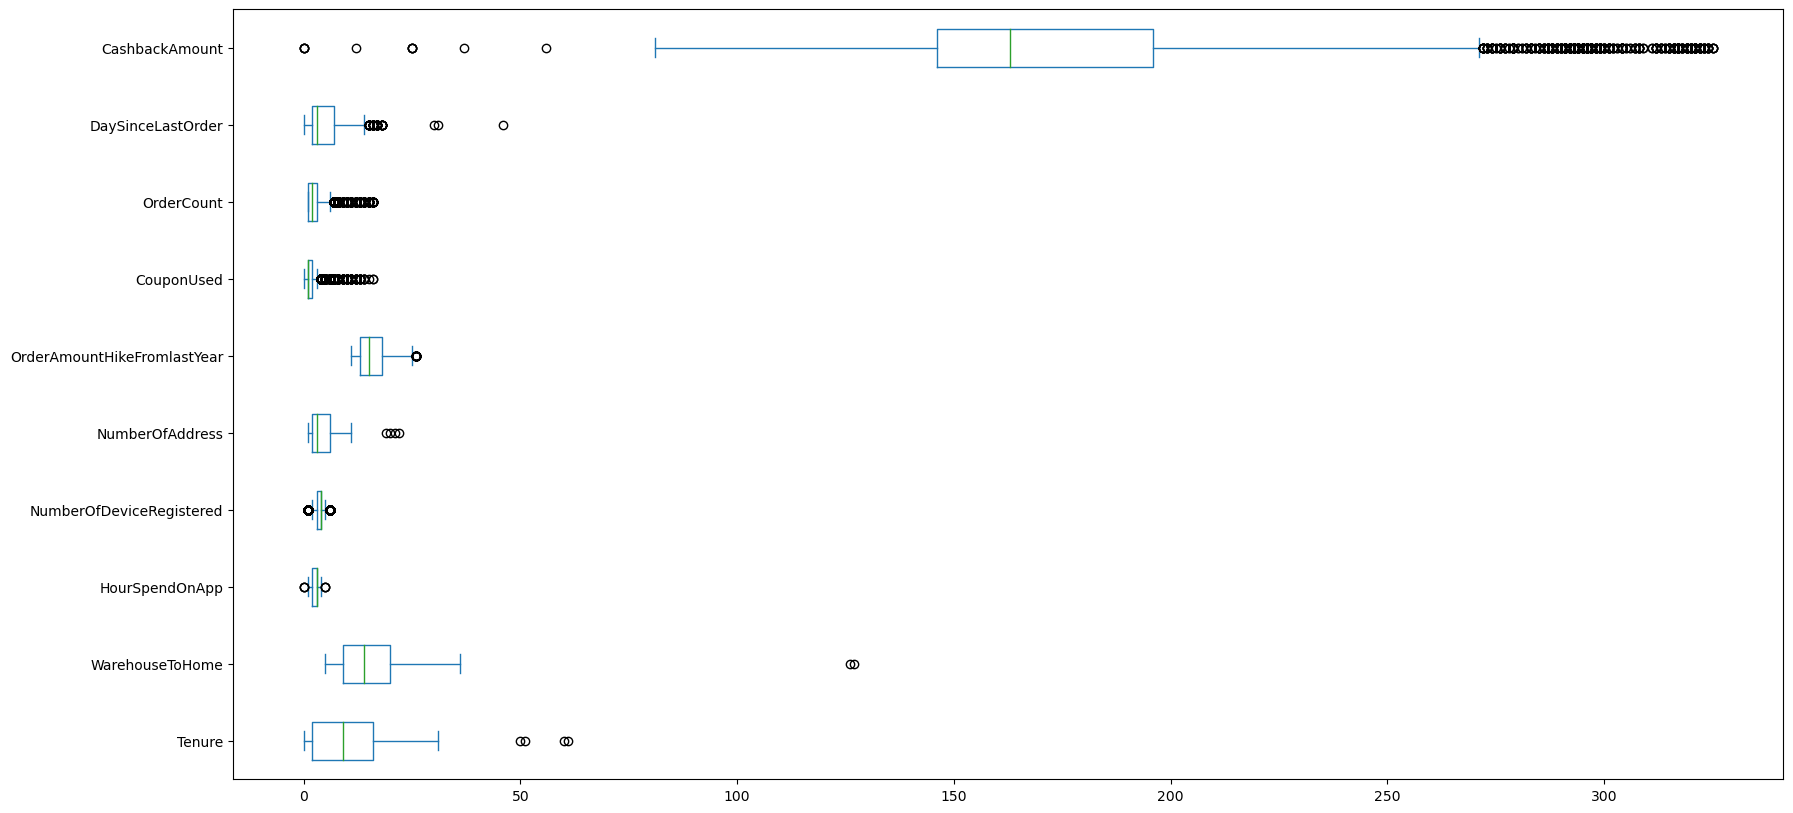

In [16]:
data_dt[data_num].plot(kind='box', vert=False, figsize=(20,10))

## EDA - UNIVARIATE

### We start with the Categorical Variables

#### CustomerID

In [17]:
data_dt.CustomerID.nunique()

5630

5630 unique customers in the dataset. 

In [18]:
data_dt['CustomerID'].describe()

count      5630
unique     5630
top       50001
freq          1
Name: CustomerID, dtype: int64

The CustomerID variable is a unique label assigned to each customer record. This feature will not be used in modeling, and will be dropped presently. 

#### Churn - the target variable

In [19]:
data_dt.Churn.value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [20]:
data_dt.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

Around 17% of the customers fall in Churn category 1. This suggests an imbalance in the representation of customers who are likely to Churn, as a significant majority fall in Churn category 0. 

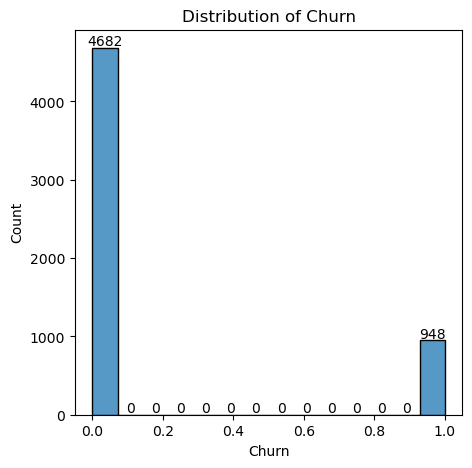

In [21]:
ax = plt.figure(figsize=(5,5))
ax = sns.histplot(data_dt.Churn)
ax.set(title='Distribution of Churn')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


In [22]:
## all variable transformations going forward will be made to a new dataset:
data_vt = data_dt.copy()

#### PreferredLoginDevice

In [23]:
data_dt.PreferredLoginDevice.value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [24]:
data_dt.PreferredLoginDevice.value_counts(normalize=True)

Mobile Phone    0.491119
Computer        0.290231
Phone           0.218650
Name: PreferredLoginDevice, dtype: float64

Mobile phone accounts for almost 50% of the share of preferred login devices. Together with Phone, 70% customers prefer to use their handheld devices to log in. 

In [25]:
data_vt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   object 
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [26]:
data_vt['PreferredLoginDevice'] = np.where(data_vt['PreferredLoginDevice']=='Phone', 'Mobile Phone', data_vt['PreferredLoginDevice'])

In [27]:
data_vt['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

#### CityTier

In [28]:
data_dt.CityTier.value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

In [29]:
data_dt.CityTier.value_counts(normalize=True)

1    0.651155
3    0.305861
2    0.042984
Name: CityTier, dtype: float64

Almost two-thirds (over 65%) of customers reside in Tier 1 cities. Tier 3 accounts for 30% of the customers. Less than 5% reside in Tier 2 cities.

#### PreferredPaymentMode

In [30]:
data_dt.PreferredPaymentMode.value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [31]:
data_dt.PreferredPaymentMode.value_counts(normalize=True)

Debit Card          0.411012
Credit Card         0.266607
E wallet            0.109059
UPI                 0.073535
COD                 0.064831
CC                  0.048490
Cash on Delivery    0.026465
Name: PreferredPaymentMode, dtype: float64

Debit Card ranks as the favoured payment mode for over 41% of the customers. <br>However, we <u>note that certain categories are repeated under different names. CC is likely to be Credit Card. COD is likely to be Cash on Delivery. Hence, we consolidate the 2 categories.</u>

In [32]:
data_vt['PreferredPaymentMode'] = np.where(data_vt['PreferredPaymentMode']=='CC', 'Credit Card', data_vt['PreferredPaymentMode'])

In [33]:
data_vt['PreferredPaymentMode'] = np.where(data_vt['PreferredPaymentMode']=='COD', 'Cash on Delivery', data_vt['PreferredPaymentMode'])

In [34]:
data_vt['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [35]:
data_vt['PreferredPaymentMode'].value_counts(normalize=True)

Debit Card          0.411012
Credit Card         0.315098
E wallet            0.109059
Cash on Delivery    0.091297
UPI                 0.073535
Name: PreferredPaymentMode, dtype: float64

#### Gender

In [36]:
data_dt.Gender.value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [37]:
data_dt.Gender.value_counts(normalize=True)

Male      0.601066
Female    0.398934
Name: Gender, dtype: float64

60% of the customers are Male, and 40% Female. 

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\3900089598.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_vt.Gender, palette='Spectral')


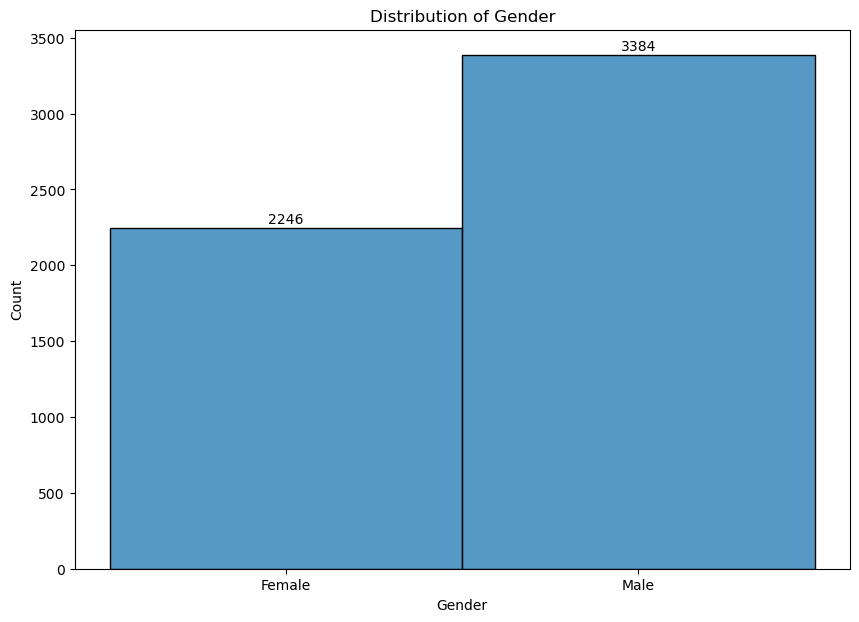

In [38]:
ax = plt.figure(figsize=(10,7))
ax = sns.histplot(data_vt.Gender, palette='Spectral')
ax.set(title='Distribution of Gender')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### PreferedOrderCat

In [39]:
data_dt.PreferedOrderCat.value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [40]:
data_dt.PreferedOrderCat.value_counts(normalize=True)

Laptop & Accessory    0.364121
Mobile Phone          0.225755
Fashion               0.146714
Mobile                0.143694
Grocery               0.072824
Others                0.046892
Name: PreferedOrderCat, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\847410025.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.PreferedOrderCat, palette='Spectral')


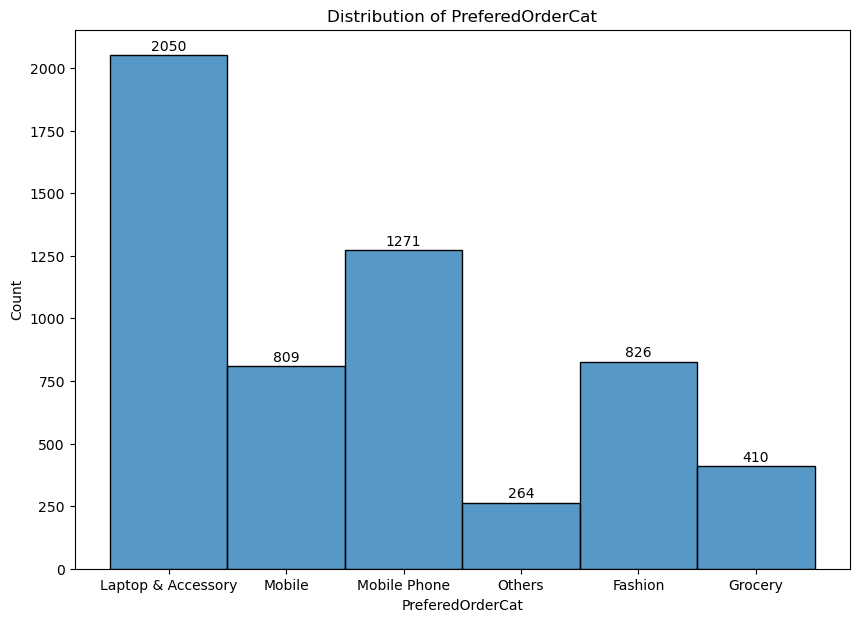

In [41]:
ax = plt.figure(figsize=(10,7))
ax = sns.histplot(data_dt.PreferedOrderCat, palette='Spectral')
ax.set(title='Distribution of PreferedOrderCat')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


Laptop and Accessories appear to be the highest ranked Preferred Order Category, with 36% of the customers. <br>
<u>We however note that Mobile and Mobile Phone appear as 2 categories, where it is likely the same category. Hence we consolidate the 2 categories into 'Mobile Phone.</u>

In [42]:
data_vt['PreferedOrderCat'] = np.where(data_vt['PreferedOrderCat']=='Mobile', 'Mobile Phone', data_vt['PreferedOrderCat'])

In [43]:
data_vt['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [44]:
data_vt['PreferedOrderCat'].value_counts(normalize=True)

Mobile Phone          0.369449
Laptop & Accessory    0.364121
Fashion               0.146714
Grocery               0.072824
Others                0.046892
Name: PreferedOrderCat, dtype: float64

With the transformation, Mobile Phone becomes the leading category, with Laptop & Accessories a very close second. 

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\1305836502.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_vt.PreferedOrderCat, palette='Spectral')


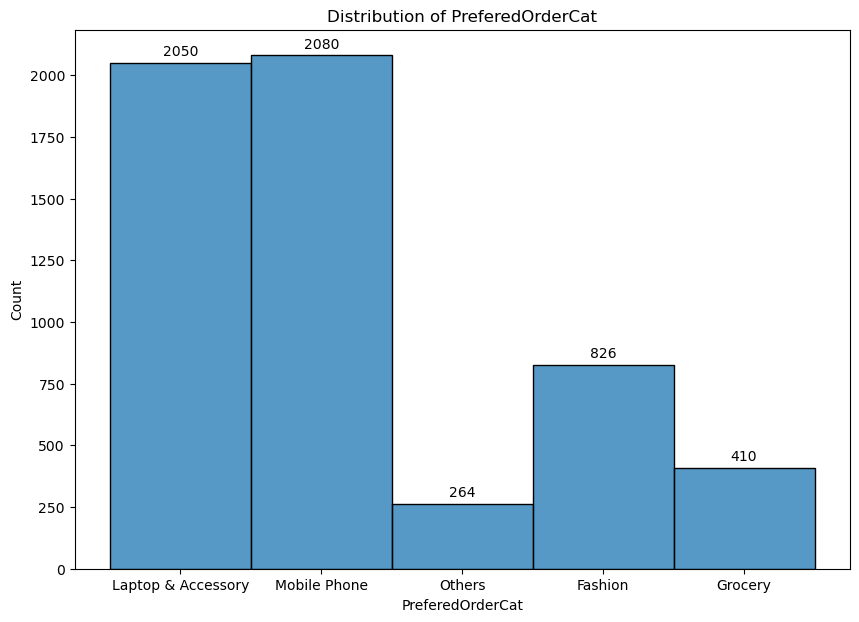

In [45]:
## plot after transformation

ax = plt.figure(figsize=(10,7))
ax = sns.histplot(data_vt.PreferedOrderCat, palette='Spectral')
ax.set(title='Distribution of PreferedOrderCat')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### SatisfactionScore

In [46]:
data_dt.SatisfactionScore.value_counts()

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

In [47]:
data_dt.SatisfactionScore.value_counts(normalize=True)

3    0.301599
1    0.206750
5    0.196803
4    0.190764
2    0.104085
Name: SatisfactionScore, dtype: float64

The rating of 3 or average is the largest category. 20% have given it a score of 1, the lowest score. 

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\4190092917.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.SatisfactionScore, palette='Spectral')


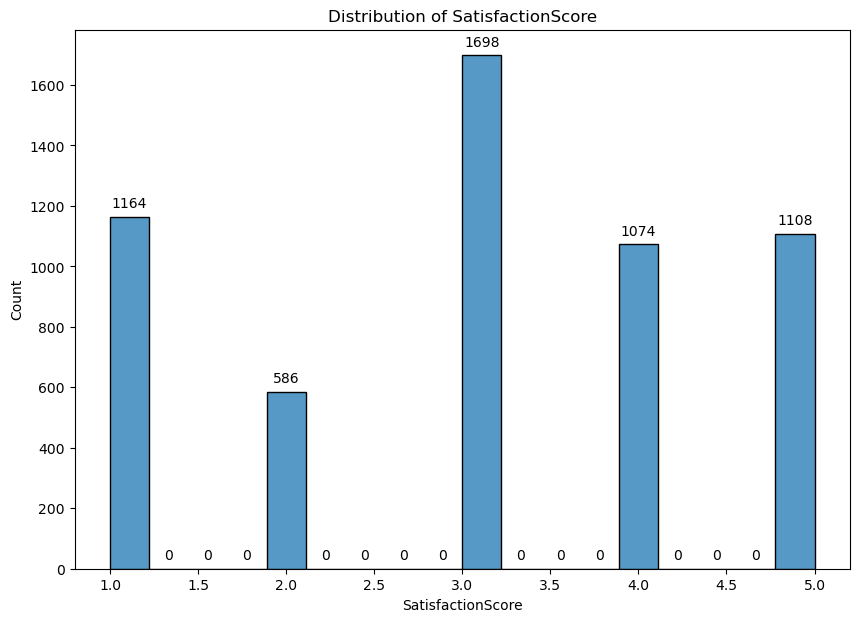

In [48]:
ax = plt.figure(figsize=(10,7))
ax = sns.histplot(data_dt.SatisfactionScore, palette='Spectral')
ax.set(title='Distribution of SatisfactionScore')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### MaritalStatus

In [49]:
data_dt.MaritalStatus.value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [50]:
data_dt.MaritalStatus.value_counts(normalize=True)

Married     0.530373
Single      0.319005
Divorced    0.150622
Name: MaritalStatus, dtype: float64

53% of the customers are married. And around 32% are single. 

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\2593833096.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.MaritalStatus, palette='Spectral')


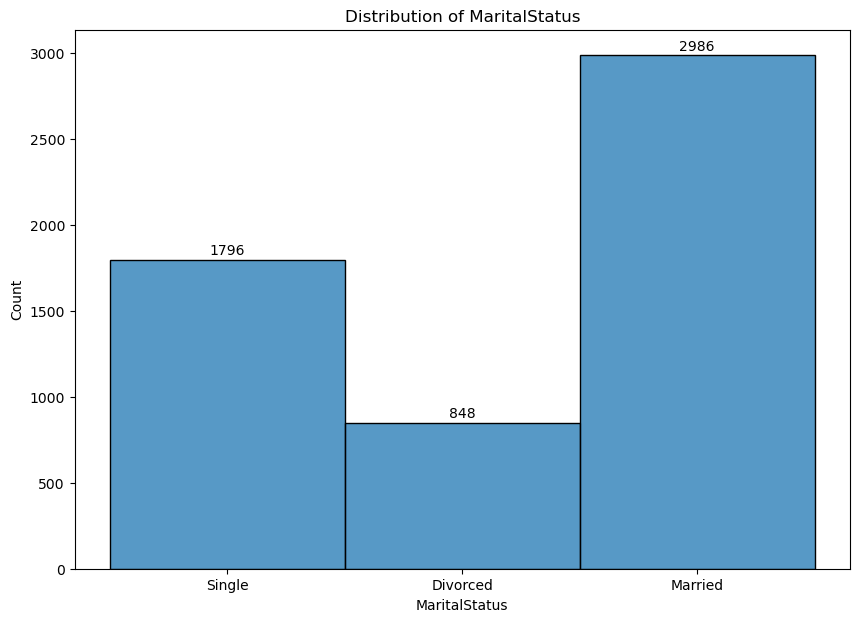

In [51]:
ax = plt.figure(figsize=(10,7))
ax = sns.histplot(data_dt.MaritalStatus, palette='Spectral')
ax.set(title='Distribution of MaritalStatus')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### Complain

In [52]:
data_dt.Complain.value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

In [53]:
data_dt.Complain.value_counts(normalize=True)

0    0.715098
1    0.284902
Name: Complain, dtype: float64

Over 28% of the customers have raised a complaint in the last month. 

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\1011736083.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.Complain, palette='Spectral')


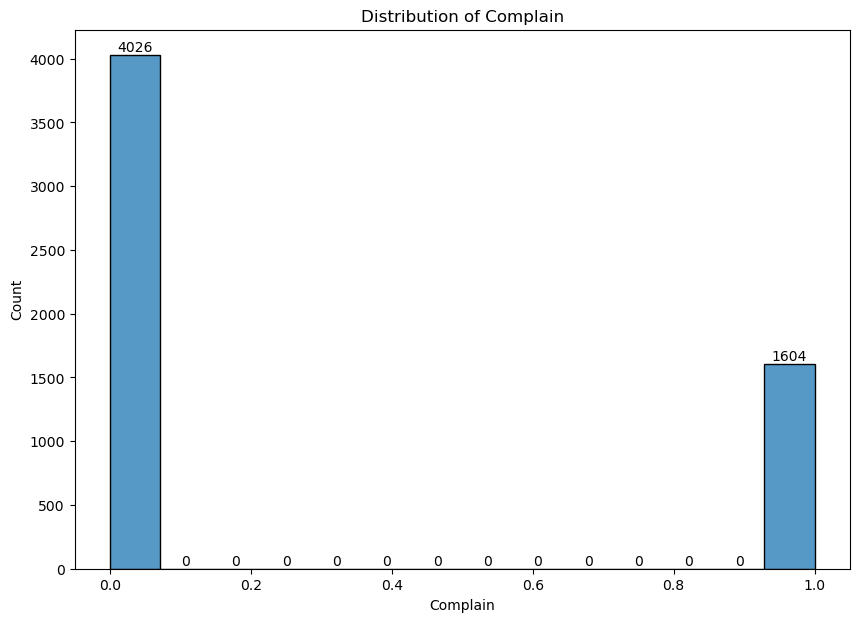

In [54]:
ax = plt.figure(figsize=(10,7))
ax = sns.histplot(data_dt.Complain, palette='Spectral')
ax.set(title='Distribution of Complain')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


### Numeric Variables

In [55]:
print(data_num)

['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


#### Tenure

In [56]:
data_dt.Tenure.describe()

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

In [57]:
## assumption: Tenure unit is months

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\2284991979.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['Tenure'], bins=10, kde=False)


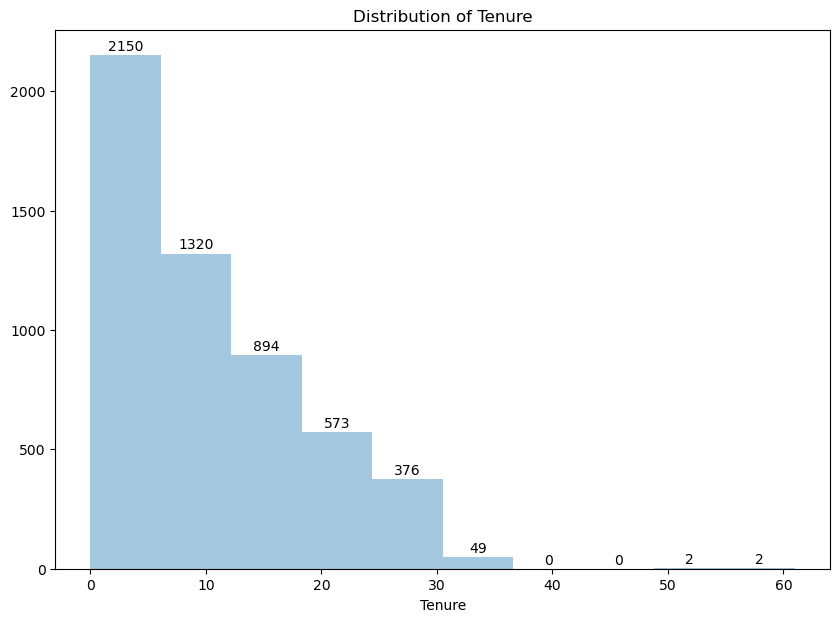

In [58]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['Tenure'], bins=10, kde=False)
ax.set(title="Distribution of Tenure")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [59]:
data_dt.Tenure.value_counts()

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\2902840939.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.Tenure, palette='Spectral')


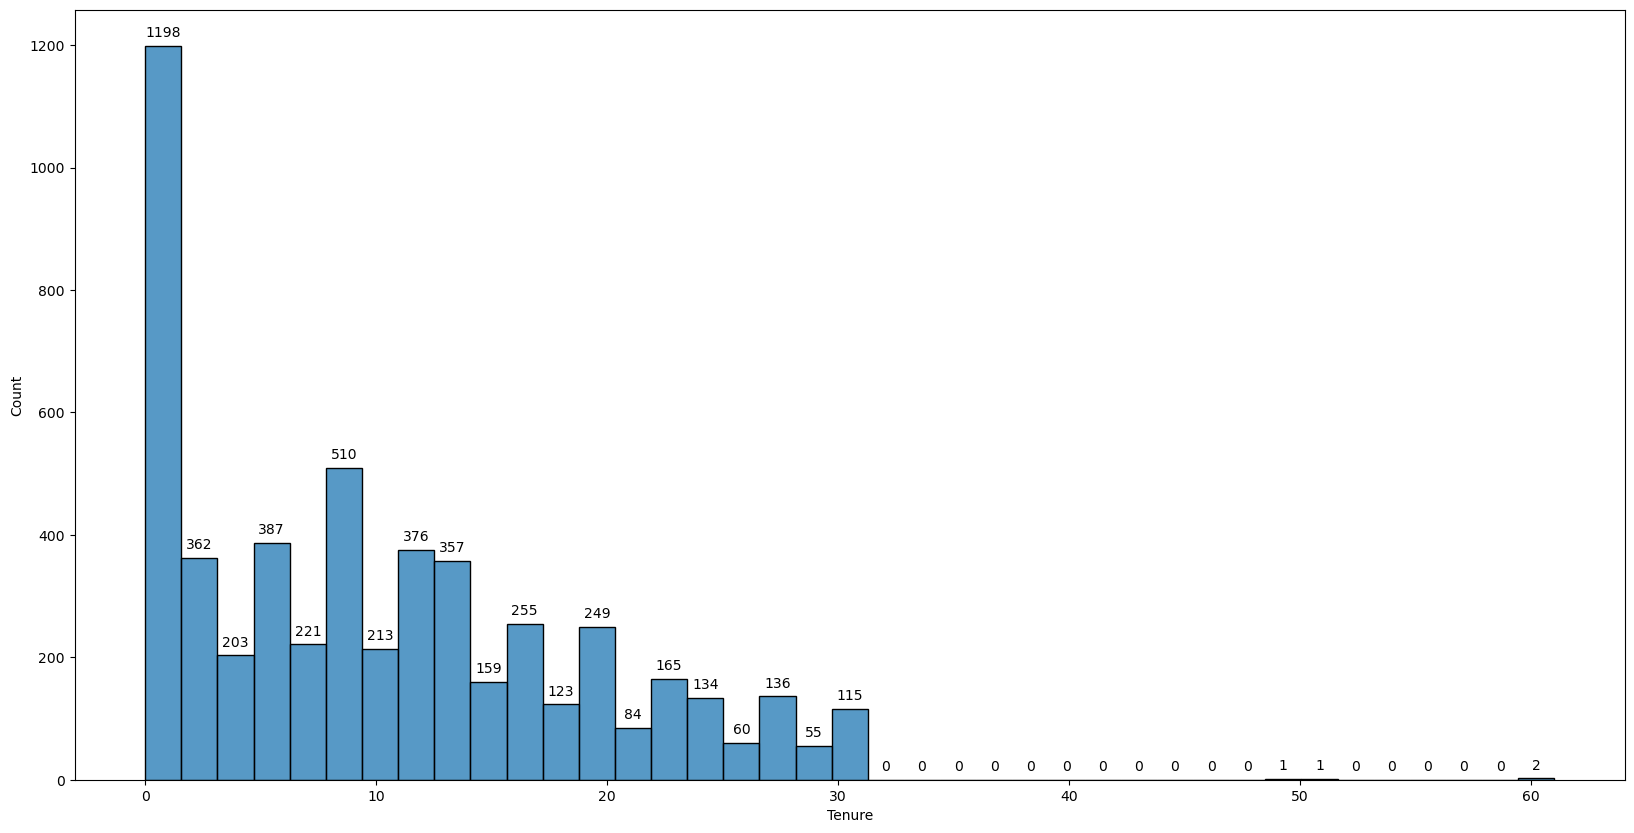

In [60]:
plt.figure(figsize = (20,10))
ax = sns.histplot(data_dt.Tenure, palette='Spectral')
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+15, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



<Axes: >

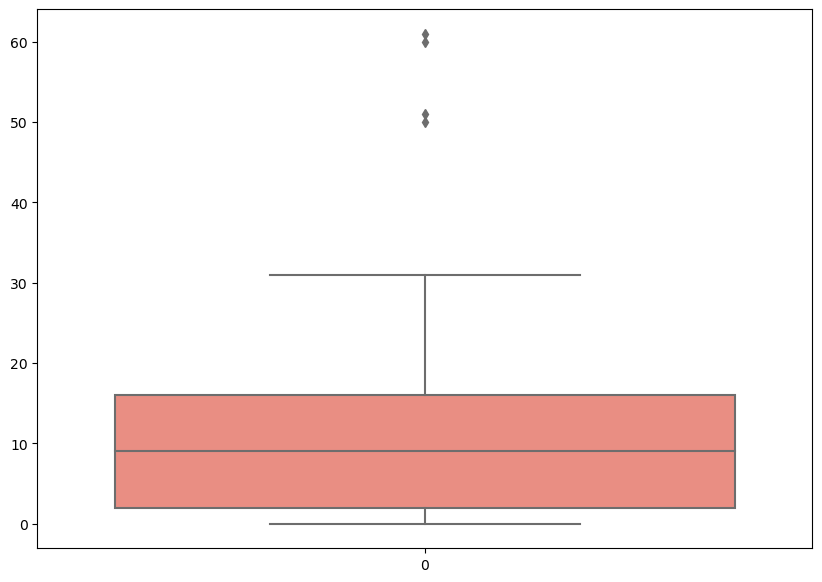

In [61]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.Tenure, color='Salmon')

We assume tenure is measured in months. Mean tenure is 10 months. Minimum is 0, which can imply these have joined less than 1 month ago. There are also some outlier values, exceeding 50 months.

#### WarehouseToHome

In [62]:
data_dt.WarehouseToHome.describe()

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\2649871735.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['WarehouseToHome'], bins=10, kde=False)


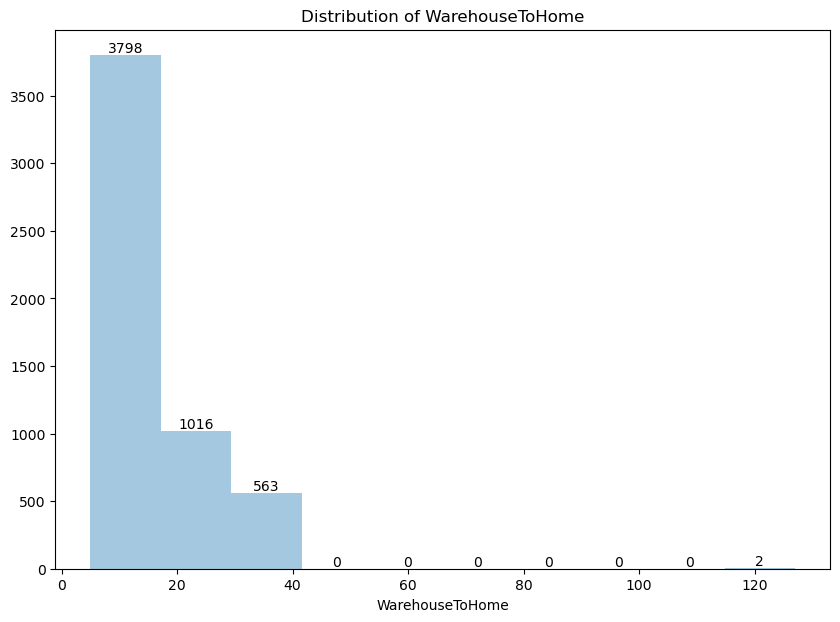

In [63]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['WarehouseToHome'], bins=10, kde=False)
ax.set(title="Distribution of WarehouseToHome")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [64]:
data_dt.WarehouseToHome.value_counts()

9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      93
18.0      89
26.0      89
25.0      86
21.0      85
24.0      85
27.0      81
29.0      81
19.0      75
20.0      74
28.0      71
33.0      67
34.0      63
36.0      51
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\3152418218.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.WarehouseToHome, palette='Spectral')


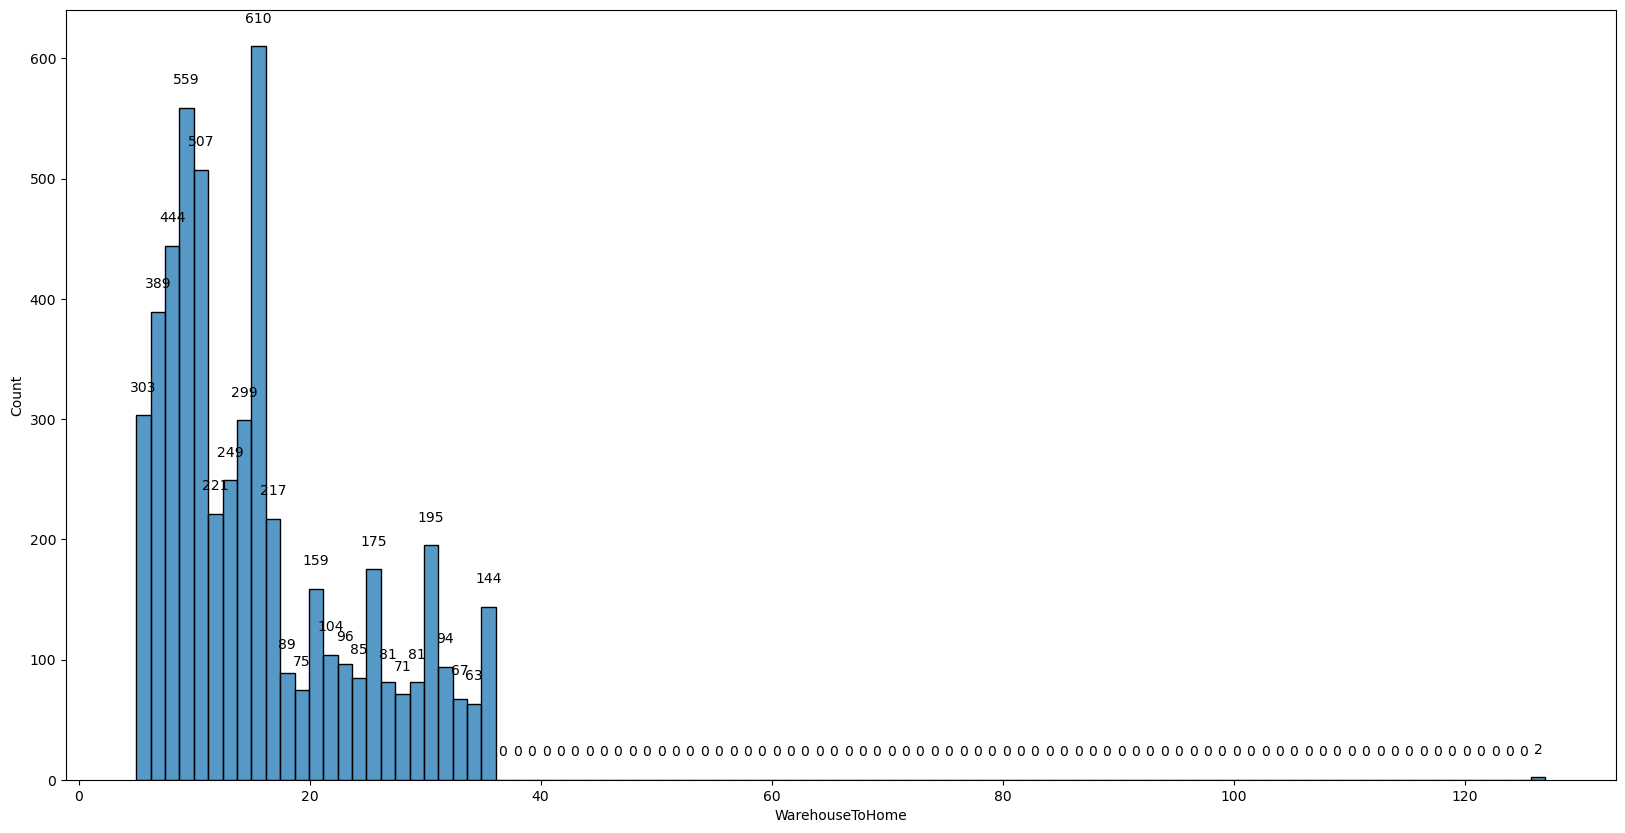

In [65]:
plt.figure(figsize = (20,10))
ax = sns.histplot(data_dt.WarehouseToHome, palette='Spectral')
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



<Axes: >

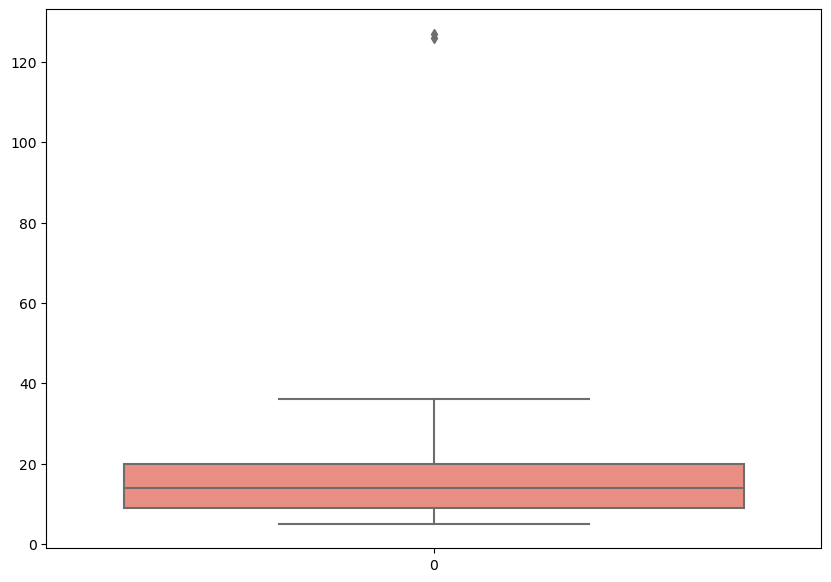

In [66]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.WarehouseToHome, color='Salmon')

<b>Note: </b>half the customers live within 14 km/miles from warehouse, and three-fourths of customers, less than or equal to 20. There is a couple of extreme values that live more than 120 units from the warehouse. 

In [67]:
data_dt[data_dt.WarehouseToHome>40]

CustomerID Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
1309      51310     0    25.0             Computer        3            126.0   
4124      54125     0    26.0             Computer        3            127.0   

     PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1309           Debit Card   Male             2.0                         3   
4124           Debit Card   Male             3.0                         4   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
1309           Mobile                 1       Married                3   
4124     Mobile Phone                 1       Married                4   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1309        0                         15.0         1.0         1.0   
4124        0                         16.0         2.0         2.0   

      DaySinceLastOrder  CashbackAmount  
1309                0.0             135  
4124                1.0             160

outliers present, 2 extreme values

#### HourSpendOnApp

In [68]:
data_dt.HourSpendOnApp.describe()

count    5375.000000
mean        2.931535
std         0.721926
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\4116870996.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['HourSpendOnApp'], bins=10, kde=False)


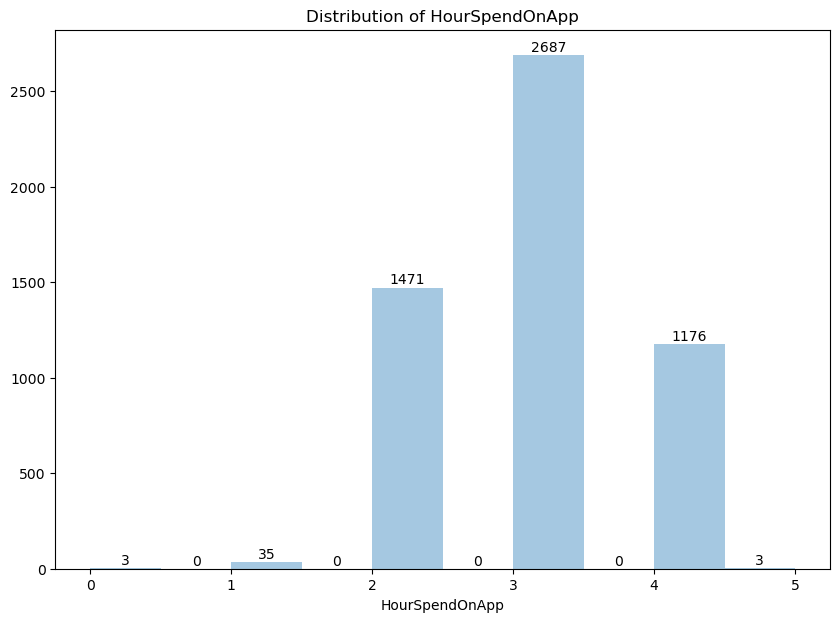

In [69]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['HourSpendOnApp'], bins=10, kde=False)
ax.set(title="Distribution of HourSpendOnApp")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


In [70]:
data_dt.HourSpendOnApp.value_counts()

3.0    2687
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: HourSpendOnApp, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\55454372.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.HourSpendOnApp, palette='Spectral')


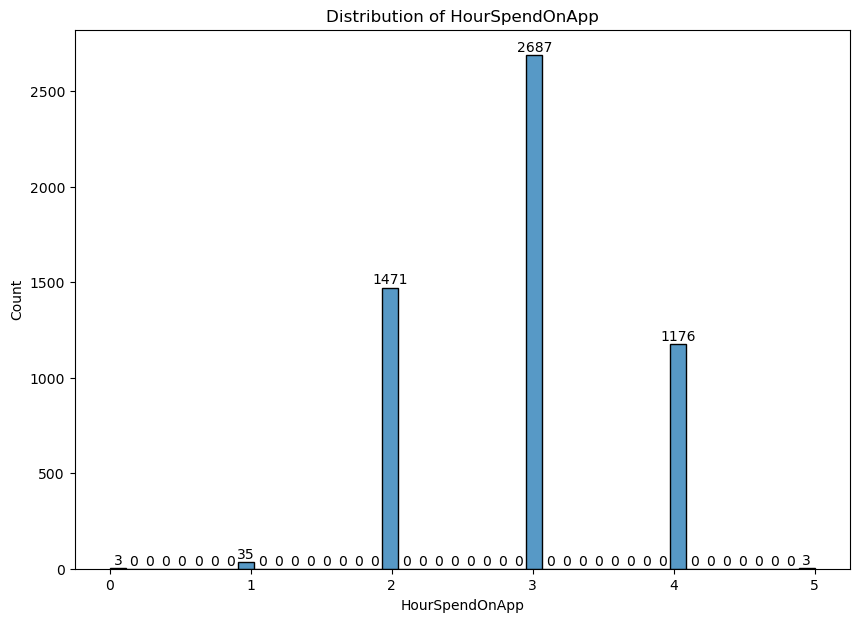

In [71]:
plt.figure(figsize = (10,7))
ax = sns.histplot(data_dt.HourSpendOnApp, palette='Spectral')
ax.set(title="Distribution of HourSpendOnApp")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


<Axes: >

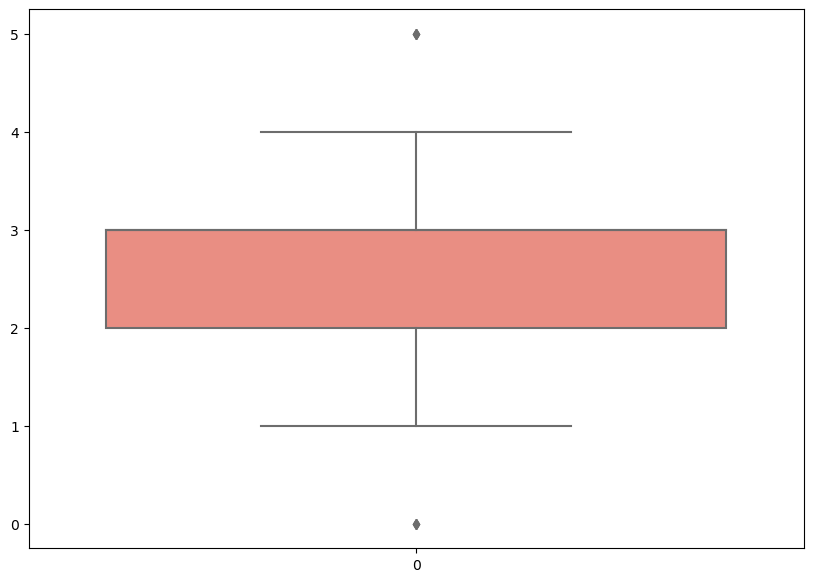

In [72]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.HourSpendOnApp, color='Salmon')

In [73]:
data_dt[data_dt.HourSpendOnApp==0]

CustomerID Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
150       50151     0    10.0             Computer        1              6.0   
950       50951     0     5.0         Mobile Phone        1             16.0   
1950      51951     0    11.0             Computer        1             18.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
150           Credit Card  Female             0.0                         3   
950           Credit Card    Male             0.0                         3   
1950           Debit Card    Male             0.0                         4   

        PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
150              Fashion                 2       Married                3   
950              Fashion                 1        Single                3   
1950  Laptop & Accessory                 5       Married                3   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
150         1                         18.0         0.0         NaN   
950         0                         25.0         0.0         1.0   
1950        0                         15.0         1.0         1.0   

      DaySinceLastOrder  CashbackAmount  
150                 2.0             236  
950                 NaN             212  
1950                2.0             163

In [74]:
data_dt[data_dt.HourSpendOnApp==5]

CustomerID Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
4223      54224     0    31.0         Mobile Phone        3             32.0   
4248      54249     0     4.0         Mobile Phone        1              9.0   
4351      54352     0     1.0                Phone        1             16.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
4223           Debit Card  Female             5.0                         4   
4248           Debit Card    Male             5.0                         5   
4351          Credit Card  Female             5.0                         4   

        PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
4223             Fashion                 5        Single                9   
4248  Laptop & Accessory                 1       Married                3   
4351        Mobile Phone                 4        Single                3   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
4223        0                         12.0         7.0         8.0   
4248        0                         20.0         4.0        11.0   
4351        0                         17.0         1.0         2.0   

      DaySinceLastOrder  CashbackAmount  
4223               10.0             201  
4248                9.0             167  
4351                4.0             148

Assume: 0 hours indicates less than 1 hour

#### NumberOfDeviceRegistered

In [75]:
data_dt.NumberOfDeviceRegistered.describe()

count    5630.000000
mean        3.688988
std         1.023999
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfDeviceRegistered, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\1080968343.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['NumberOfDeviceRegistered'], bins=10, kde=False)


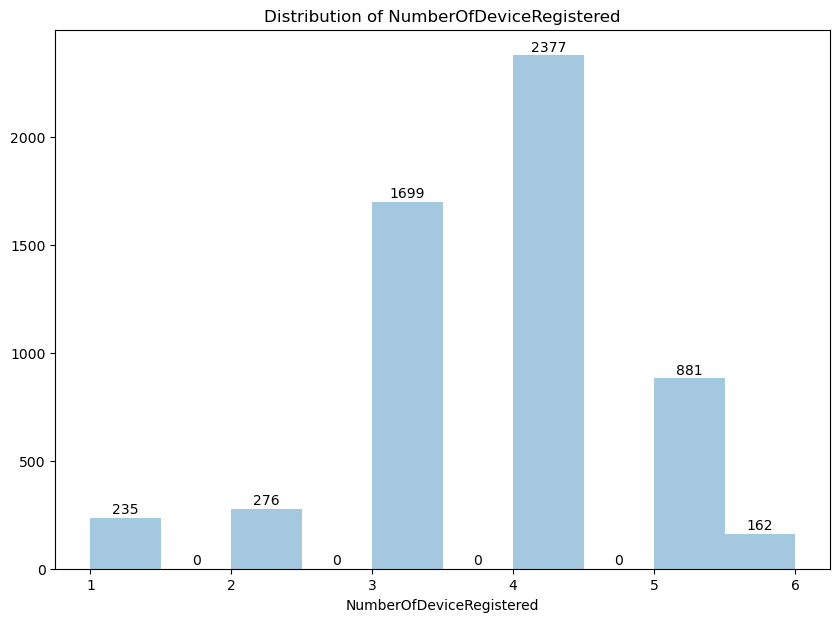

In [76]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['NumberOfDeviceRegistered'], bins=10, kde=False)
ax.set(title="Distribution of NumberOfDeviceRegistered")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [77]:
data_dt.NumberOfDeviceRegistered.value_counts()

4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64

In [78]:
data_dt.NumberOfDeviceRegistered.value_counts(normalize=True)

4    0.422202
3    0.301776
5    0.156483
2    0.049023
1    0.041741
6    0.028774
Name: NumberOfDeviceRegistered, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\2889254761.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.NumberOfDeviceRegistered, palette='Spectral')


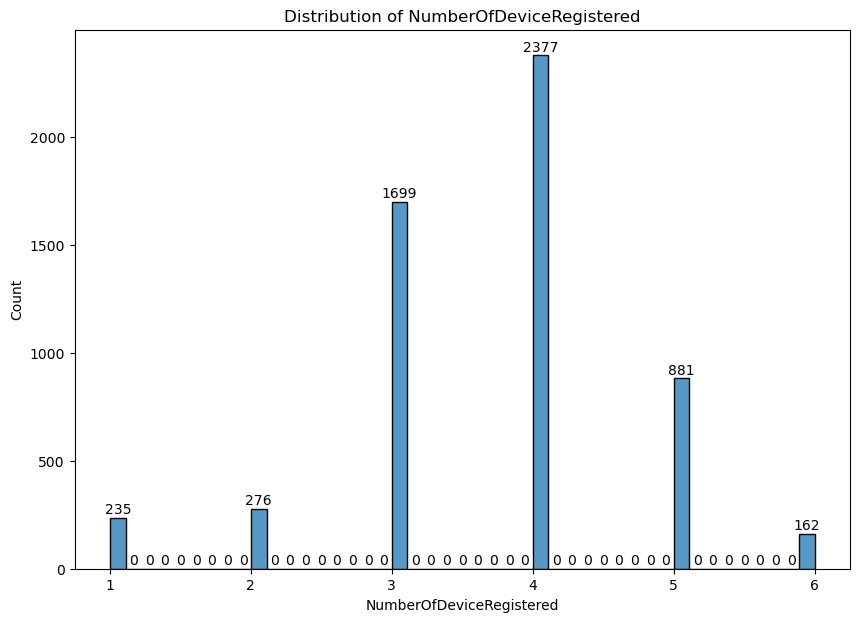

In [79]:
plt.figure(figsize = (10,7))
ax = sns.histplot(data_dt.NumberOfDeviceRegistered, palette='Spectral')
ax.set(title="Distribution of NumberOfDeviceRegistered")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


<Axes: >

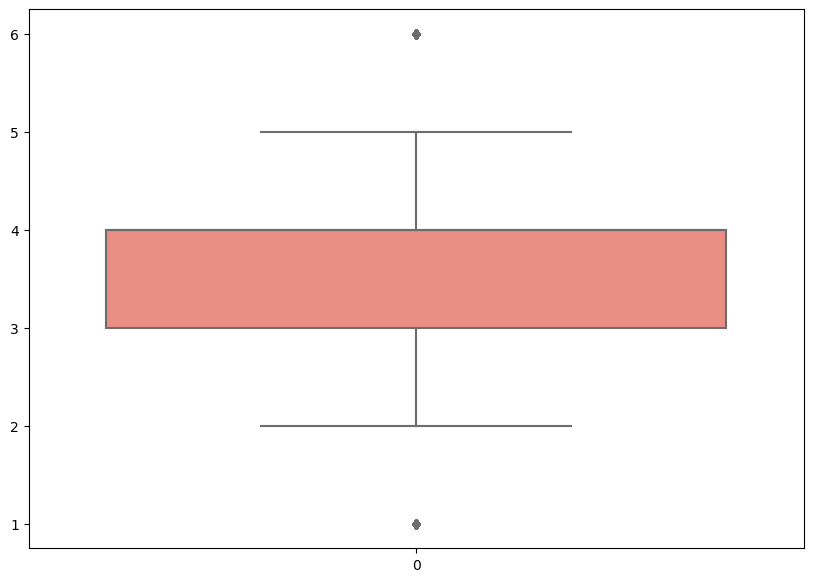

In [80]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.NumberOfDeviceRegistered, color='Salmon')

over 70% of customers have 3 or 4 devices registered, 42% highest having 4

#### NumberOfAddress

In [81]:
data_dt.NumberOfAddress.describe()

count    5630.000000
mean        4.214032
std         2.583586
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        22.000000
Name: NumberOfAddress, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\575456775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['NumberOfAddress'], bins=10, kde=False)


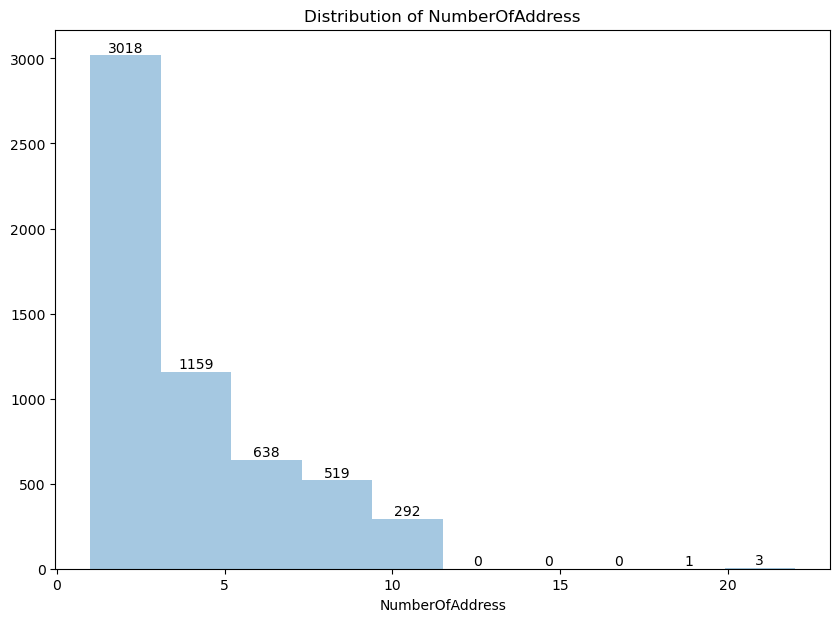

In [82]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['NumberOfAddress'], bins=10, kde=False)
ax.set(title="Distribution of NumberOfAddress")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [83]:
data_dt.NumberOfAddress.value_counts()

2     1369
3     1278
4      588
5      571
6      382
1      371
8      280
7      256
9      239
10     194
11      98
19       1
21       1
20       1
22       1
Name: NumberOfAddress, dtype: int64

In [84]:
data_dt.NumberOfAddress.value_counts(normalize=True)

2     0.243162
3     0.226998
4     0.104440
5     0.101421
6     0.067851
1     0.065897
8     0.049734
7     0.045471
9     0.042451
10    0.034458
11    0.017407
19    0.000178
21    0.000178
20    0.000178
22    0.000178
Name: NumberOfAddress, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\3292454994.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.NumberOfAddress, palette='Spectral')


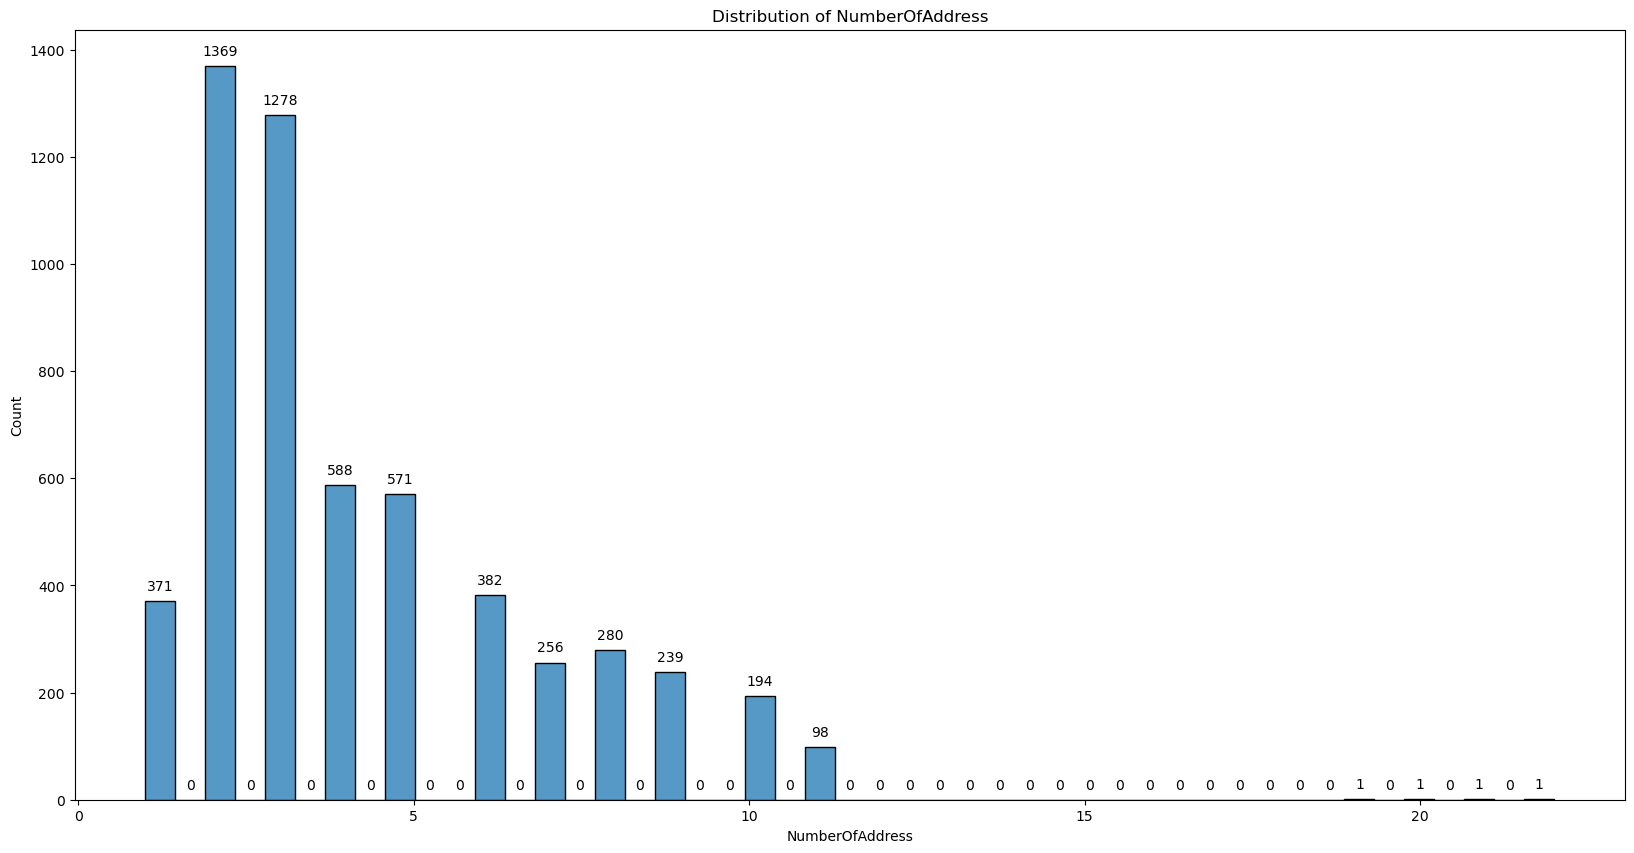

In [85]:
plt.figure(figsize = (20,10))
ax = sns.histplot(data_dt.NumberOfAddress, palette='Spectral')
ax.set(title="Distribution of NumberOfAddress")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


<Axes: >

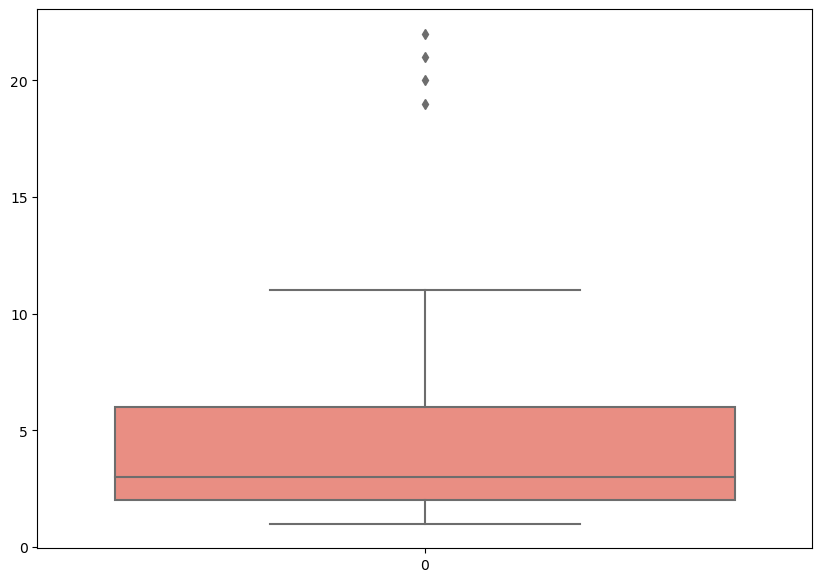

In [86]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.NumberOfAddress, color='Salmon')

Note: Presence of extreme values (greater than 18), and also a significant number with 5 or more addresses

#### OrderAmountHikeFromlastYear

In [87]:
data_dt.OrderAmountHikeFromlastYear.describe()

count    5365.000000
mean       15.707922
std         3.675485
min        11.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        26.000000
Name: OrderAmountHikeFromlastYear, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\3315859662.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['OrderAmountHikeFromlastYear'], bins=10, kde=False)


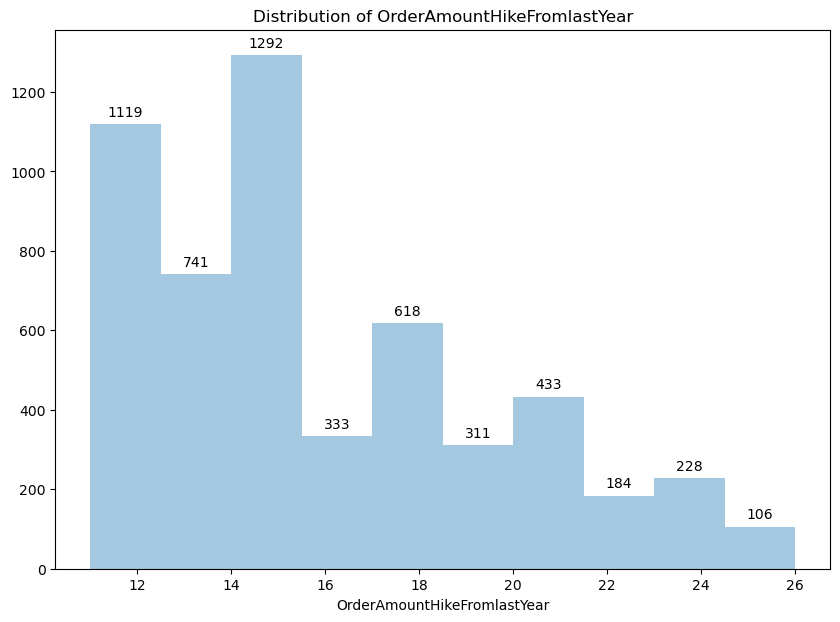

In [88]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['OrderAmountHikeFromlastYear'], bins=10, kde=False)
ax.set(title="Distribution of OrderAmountHikeFromlastYear")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [89]:
data_dt.OrderAmountHikeFromlastYear.value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

In [90]:
data_dt.OrderAmountHikeFromlastYear.value_counts(normalize=True)

14.0    0.139795
13.0    0.138117
12.0    0.135694
15.0    0.101025
11.0    0.072880
16.0    0.062069
18.0    0.059832
19.0    0.057968
17.0    0.055359
20.0    0.045294
21.0    0.035415
22.0    0.034296
23.0    0.026841
24.0    0.015657
25.0    0.013607
26.0    0.006151
Name: OrderAmountHikeFromlastYear, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\317575650.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data_dt.OrderAmountHikeFromlastYear, palette='Spectral')


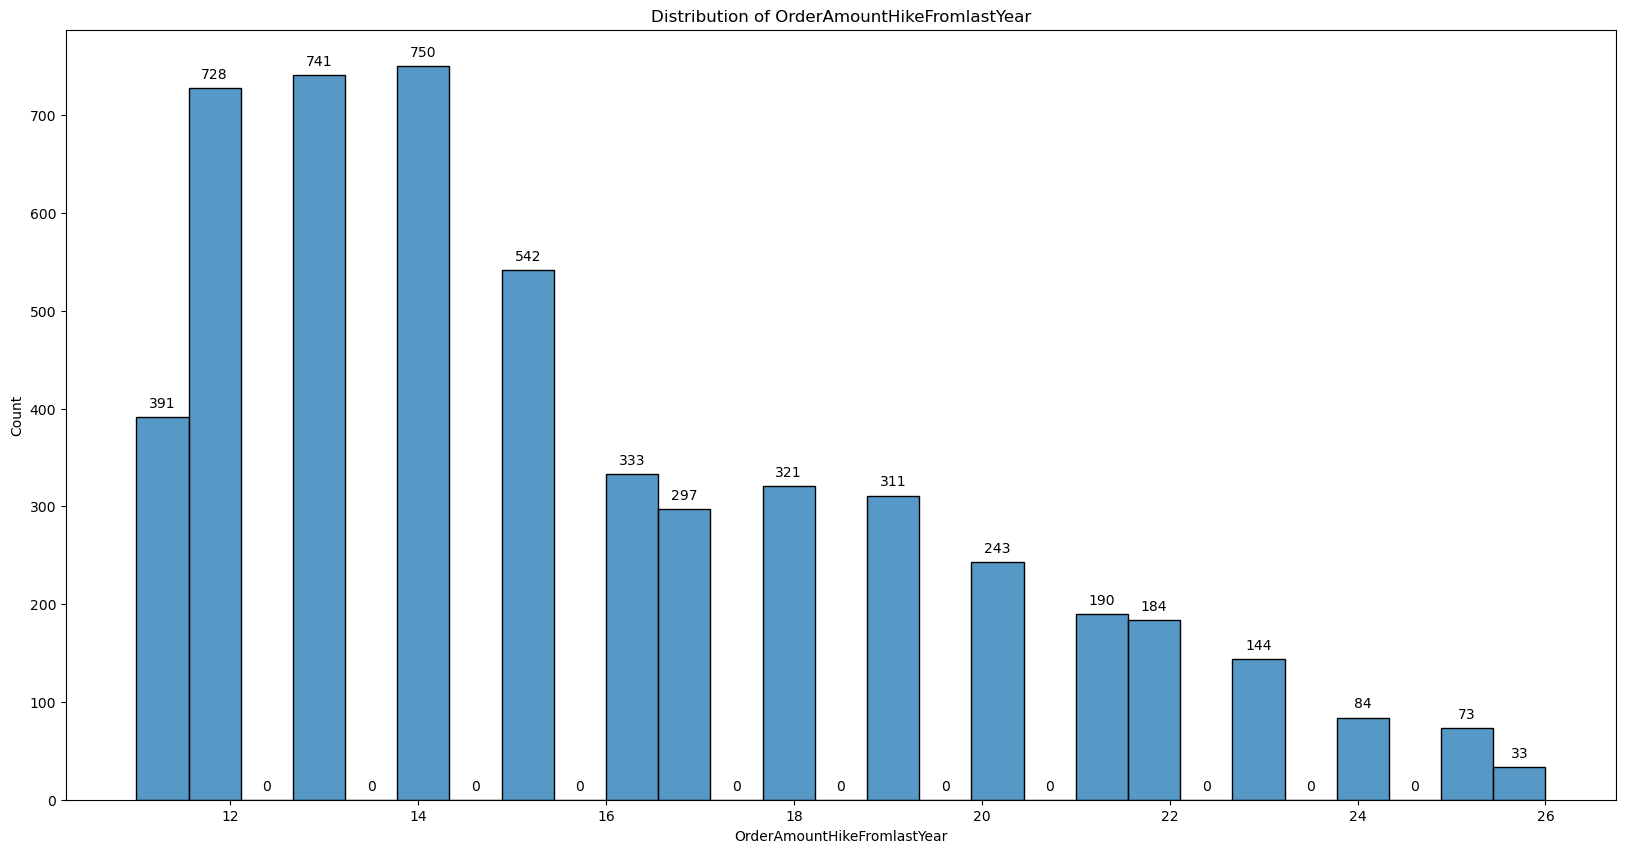

In [91]:
plt.figure(figsize = (20,10))
ax = sns.histplot(data_dt.OrderAmountHikeFromlastYear, palette='Spectral')
ax.set(title="Distribution of OrderAmountHikeFromlastYear")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+10, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


<Axes: >

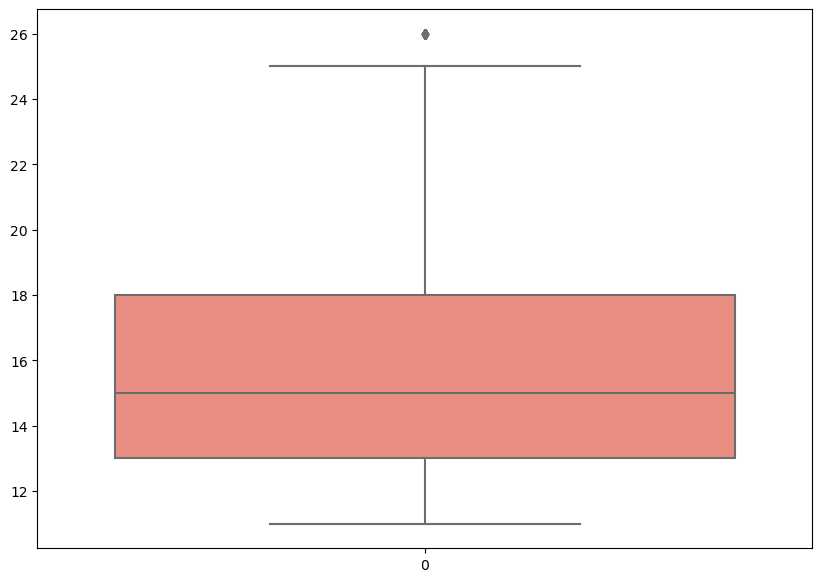

In [92]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.OrderAmountHikeFromlastYear, color='Salmon')

Trying to make sense of the OrderAmountHikeFromLastYear column - all positive values, indicating that all customers in the dataset have bought more since last year. Some customers, based on Tenure, have not evem been on the records for a year. 

In [93]:
data_dt.OrderAmountHikeFromlastYear.isnull().sum()

265

In [94]:
data_dt[data_dt.OrderAmountHikeFromlastYear.isnull()]

CustomerID Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
10        50011     1     4.0         Mobile Phone        1             18.0   
40        50041     0    23.0         Mobile Phone        1             17.0   
65        50066     0    25.0         Mobile Phone        1              6.0   
106       50107     0    15.0         Mobile Phone        1             10.0   
108       50109     0    23.0         Mobile Phone        3              6.0   
...         ...   ...     ...                  ...      ...              ...   
5534      55535     0    61.0         Mobile Phone        3             28.0   
5537      55538     0    23.0             Computer        1              9.0   
5561      55562     0    29.0         Mobile Phone        2             33.0   
5597      55598     0    13.0             Computer        1             16.0   
5603      55604     0    16.0         Mobile Phone        1              9.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
10       Cash on Delivery  Female             2.0                         3   
40             Debit Card  Female             2.0                         3   
65             Debit Card    Male             3.0                         4   
106      Cash on Delivery    Male             2.0                         3   
108           Credit Card  Female             3.0                         3   
...                   ...     ...             ...                       ...   
5534           Debit Card  Female             4.0                         4   
5537           Debit Card    Male             3.0                         4   
5561                  UPI    Male             4.0                         2   
5597           Debit Card    Male             3.0                         4   
5603           Debit Card    Male             3.0                         4   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
10             Others                 3      Divorced                2   
40             Others                 4        Single                4   
65             Others                 3      Divorced                1   
106            Others                 2      Divorced                2   
108            Others                 2       Married                4   
...               ...               ...           ...              ...   
5534          Grocery                 1       Married                6   
5537           Others                 1       Married                5   
5561           Others                 4       Married                6   
5597           Others                 1        Single                4   
5603           Others                 3       Married                7   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
10          0                          NaN         9.0        15.0   
40          0                          NaN         2.0         4.0   
65          0                          NaN         1.0        11.0   
106         0                          NaN         0.0        11.0   
108         0                          NaN         1.0         1.0   
...       ...                          ...         ...         ...   
5534        1                          NaN         1.0         2.0   
5537        0                          NaN         5.0         5.0   
5561        1                          NaN         2.0         2.0   
5597        0                          NaN         2.0         2.0   
5603        0                          NaN         1.0         5.0   

      DaySinceLastOrder  CashbackAmount  
10                  8.0             295  
40                  4.0             299  
65                  9.0             300  
106                15.0             292  
108                 6.0             295  
...                 ...             ...  
5534                1.0             304  
5537                4.0      

Note: Null values are distributed, and don't comform to any pattern

In [95]:
data_dt.Tenure.value_counts()

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

In [96]:
data_dt.Tenure[data.Tenure<12].count()

3288

There are 3288 customers with less than 12 month Tenure. And at least 500 customers with 0 tenure - how is it that all customers have a positive order amount hike from last year?

Assumption: This is a computed variable by business, and hence is taken at face value. 

#### CouponUsed

In [97]:
data_dt.CouponUsed.describe()

count    5374.000000
mean        1.751023
std         1.894621
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: CouponUsed, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\193001548.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['CouponUsed'], bins=10, kde=False)


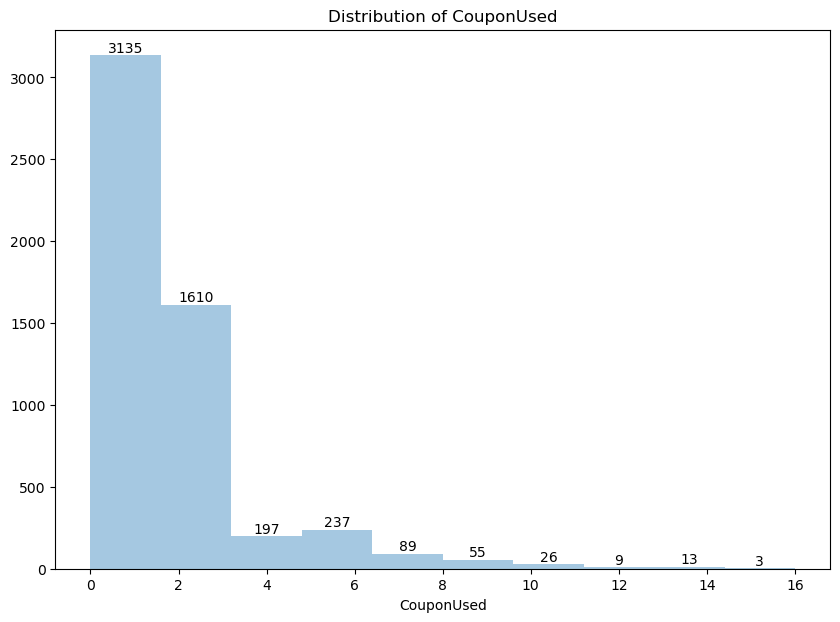

In [98]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['CouponUsed'], bins=10, kde=False)
ax.set(title="Distribution of CouponUsed")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


In [99]:
data_dt.CouponUsed.value_counts()

1.0     2105
2.0     1283
0.0     1030
3.0      327
4.0      197
5.0      129
6.0      108
7.0       89
8.0       42
10.0      14
9.0       13
11.0      12
12.0       9
13.0       8
14.0       5
16.0       2
15.0       1
Name: CouponUsed, dtype: int64

In [100]:
data_dt.CouponUsed.value_counts(normalize=True)

1.0     0.391701
2.0     0.238742
0.0     0.191664
3.0     0.060849
4.0     0.036658
5.0     0.024004
6.0     0.020097
7.0     0.016561
8.0     0.007815
10.0    0.002605
9.0     0.002419
11.0    0.002233
12.0    0.001675
13.0    0.001489
14.0    0.000930
16.0    0.000372
15.0    0.000186
Name: CouponUsed, dtype: float64

<Axes: >

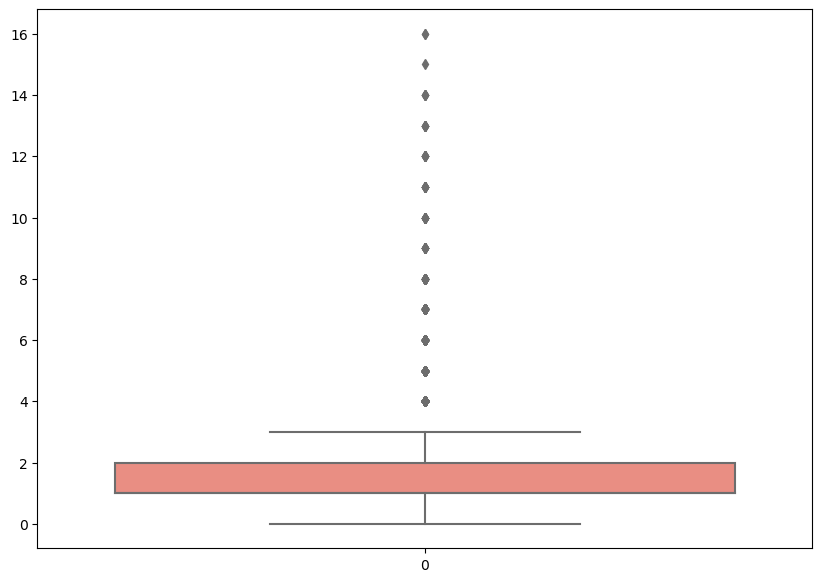

In [101]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.CouponUsed, color='Salmon')

Outliers indicate a possible class of heavy coupon users

#### OrderCount

In [102]:
data_dt.OrderCount.describe()

count    5372.000000
mean        3.008004
std         2.939680
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: OrderCount, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\3437427135.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['OrderCount'], bins=10, kde=False)


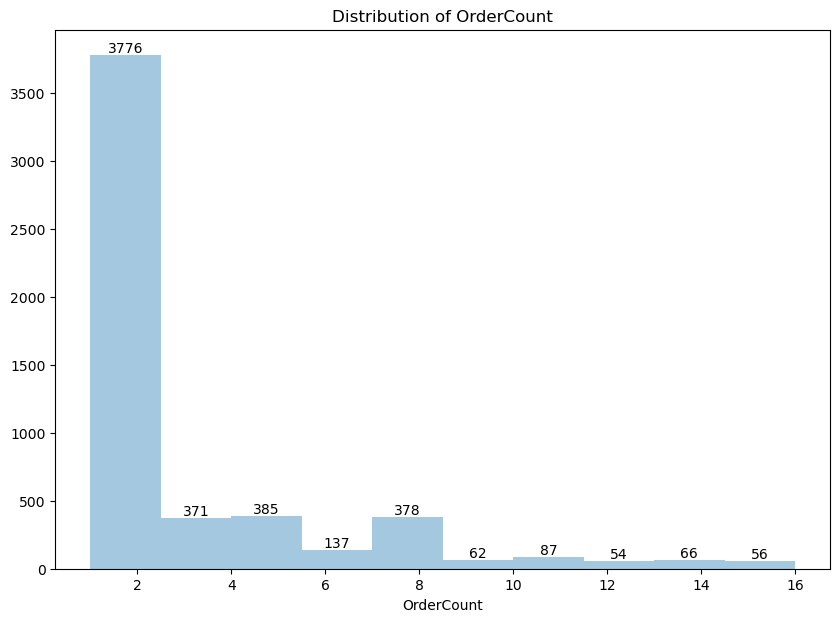

In [103]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['OrderCount'], bins=10, kde=False)
ax.set(title="Distribution of OrderCount")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [104]:
data_dt.OrderCount.value_counts()

2.0     2025
1.0     1751
3.0      371
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
10.0      36
14.0      36
15.0      33
13.0      30
16.0      23
Name: OrderCount, dtype: int64

In [105]:
data_dt.OrderCount.value_counts(normalize=True)

2.0     0.376955
1.0     0.325949
3.0     0.069062
7.0     0.038347
4.0     0.037975
5.0     0.033693
8.0     0.032018
6.0     0.025503
9.0     0.011541
12.0    0.010052
11.0    0.009494
10.0    0.006701
14.0    0.006701
15.0    0.006143
13.0    0.005585
16.0    0.004281
Name: OrderCount, dtype: float64

<Axes: >

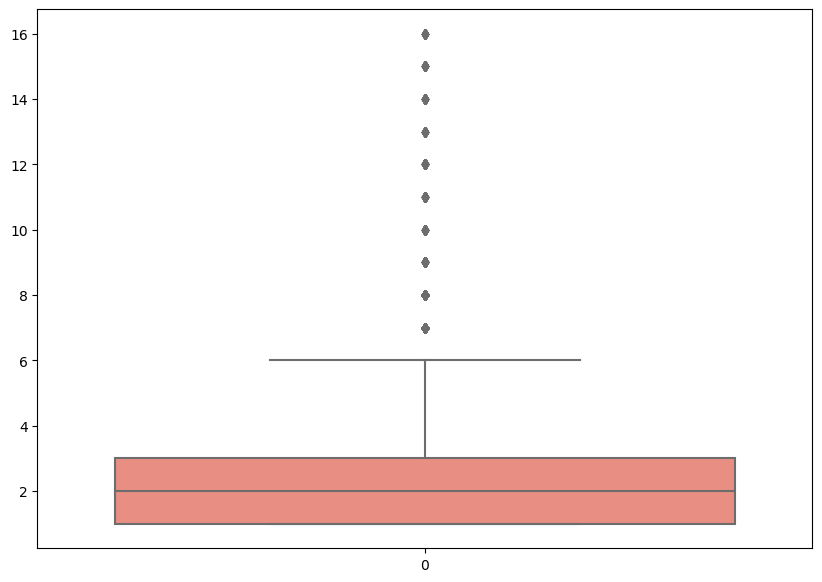

In [106]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.OrderCount, color='Salmon')

most have placed 2 orders, 70% either 1 or 2. 

#### Observation: every customer in the dataset has placed at least 1 order last month

In [107]:
data_dt.OrderCount.isnull().sum()

258

In [108]:
data_dt[data_dt.OrderCount.isnull()]

CustomerID Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
64        50065     0    24.0         Mobile Phone        1              9.0   
90        50091     0    14.0         Mobile Phone        3             12.0   
110       50111     0    16.0         Mobile Phone        3             22.0   
120       50121     0     4.0             Computer        1              9.0   
143       50144     0    18.0         Mobile Phone        1             26.0   
...         ...   ...     ...                  ...      ...              ...   
5565      55566     0     5.0             Computer        1             17.0   
5581      55582     0    21.0             Computer        1              8.0   
5590      55591     0    12.0         Mobile Phone        1             17.0   
5621      55622     1    14.0         Mobile Phone        3             35.0   
5622      55623     0    13.0         Mobile Phone        3             31.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
64            Credit Card  Female             3.0                         3   
90             Debit Card  Female             3.0                         3   
110              E wallet  Female             3.0                         3   
120           Credit Card    Male             3.0                         3   
143           Credit Card    Male             3.0                         3   
...                   ...     ...             ...                       ...   
5565          Credit Card  Female             3.0                         4   
5581          Credit Card  Female             4.0                         4   
5590          Credit Card  Female             4.0                         6   
5621             E wallet    Male             3.0                         5   
5622             E wallet  Female             3.0                         5   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
64            Grocery                 4        Single                4   
90            Fashion                 2        Single                4   
110           Grocery                 2      Divorced                6   
120           Fashion                 3       Married               10   
143           Grocery                 2      Divorced                1   
...               ...               ...           ...              ...   
5565          Fashion                 3       Married                6   
5581          Fashion                 4       Married                2   
5590          Fashion                 3       Married                5   
5621          Fashion                 5       Married                6   
5622          Grocery                 1       Married                2   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
64          0                         18.0         0.0         NaN   
90          1                         18.0         0.0         NaN   
110         1                         22.0         0.0         NaN   
120         0                         12.0         1.0         NaN   
143         1                         14.0         0.0         NaN   
...       ...                          ...         ...         ...   
5565        0                         21.0         4.0         NaN   
5581        0                         19.0         1.0         NaN   
5590        0                         13.0         1.0         NaN   
5621        1                         14.0         3.0         NaN   
5622        0                         12.0         4.0         NaN   

      DaySinceLastOrder  CashbackAmount  
64                  0.0             237  
90                  0.0             236  
110                 9.0             261  
120                 2.0             237  
143                10.0             235  
...                 ...             ...  
5565                9.0             235  
5581               13.0      

No pattern as such among NaN 

#### DaySinceLastOrder

In [109]:
data_dt.DaySinceLastOrder.describe()

count    5323.000000
mean        4.543491
std         3.654433
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\729823497.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['DaySinceLastOrder'], bins=10, kde=False)


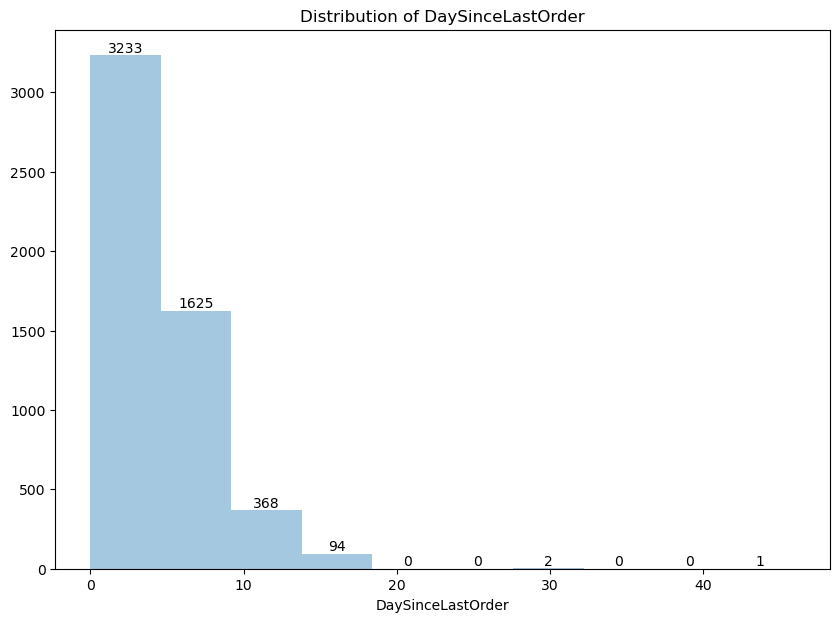

In [110]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['DaySinceLastOrder'], bins=10, kde=False)
ax.set(title="Distribution of DaySinceLastOrder")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [111]:
data_dt.DaySinceLastOrder.value_counts()

3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

In [112]:
data_dt.DaySinceLastOrder.value_counts(normalize=True)

3.0     0.169078
2.0     0.148788
1.0     0.115348
8.0     0.101071
0.0     0.093181
7.0     0.083975
4.0     0.080969
9.0     0.056171
5.0     0.042833
10.0    0.029495
6.0     0.021229
11.0    0.017096
12.0    0.012963
13.0    0.009581
14.0    0.006575
15.0    0.003569
17.0    0.003194
16.0    0.002442
18.0    0.001879
30.0    0.000188
46.0    0.000188
31.0    0.000188
Name: DaySinceLastOrder, dtype: float64

<Axes: >

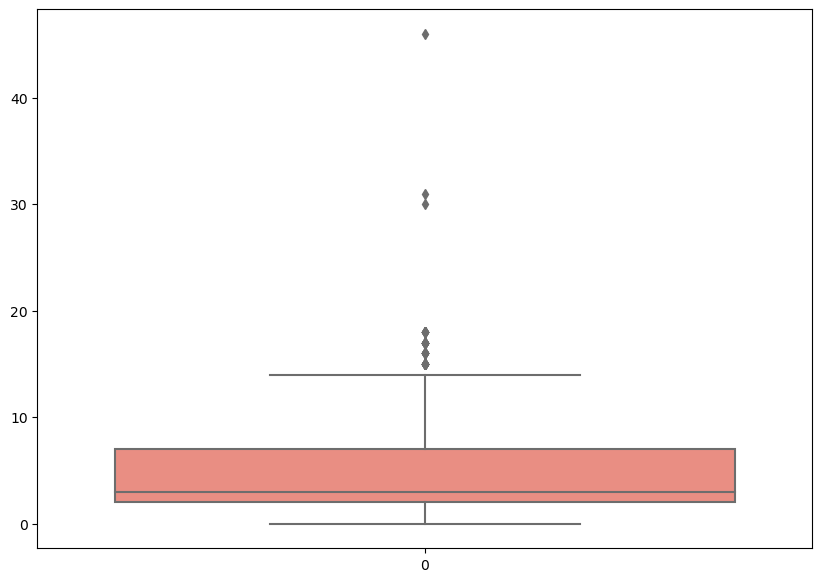

In [113]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.DaySinceLastOrder, color='Salmon')

In [114]:
data_dt.DaySinceLastOrder.isnull().sum()

307

In [115]:
## if everyone has placed an order last month, how does value exceed 30 days? 41 is an Incorrect value - impute??

Most customers have placed an order in at least 14 days/ fortnight. Some over 2 weeks, and a few, many days back. 

#### CashbackAmount

In [116]:
data_dt.CashbackAmount.describe()

count    5630.000000
mean      177.221492
std        49.193869
min         0.000000
25%       146.000000
50%       163.000000
75%       196.000000
max       325.000000
Name: CashbackAmount, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\2259018136.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_dt['CashbackAmount'], bins=10, kde=False)


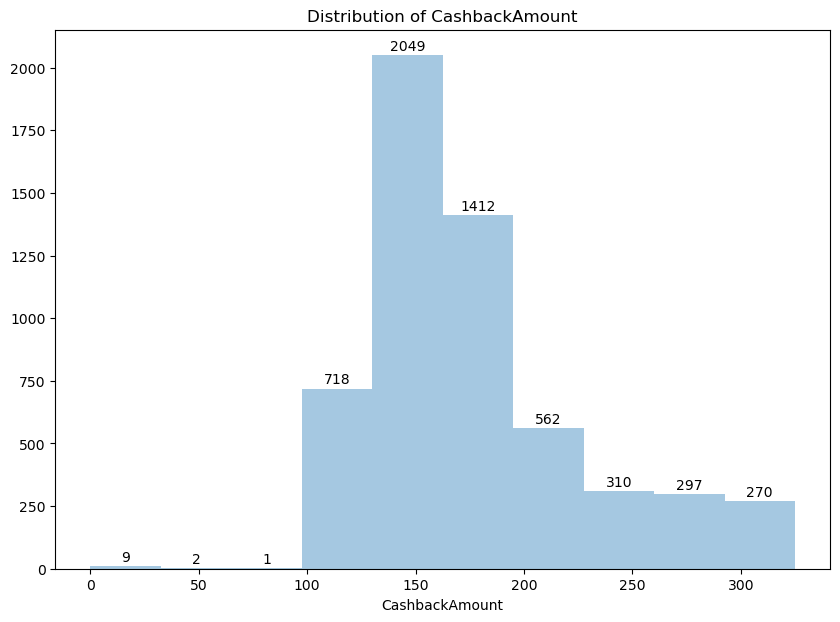

In [117]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['CashbackAmount'], bins=10, kde=False)
ax.set(title="Distribution of CashbackAmount")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


<Axes: >

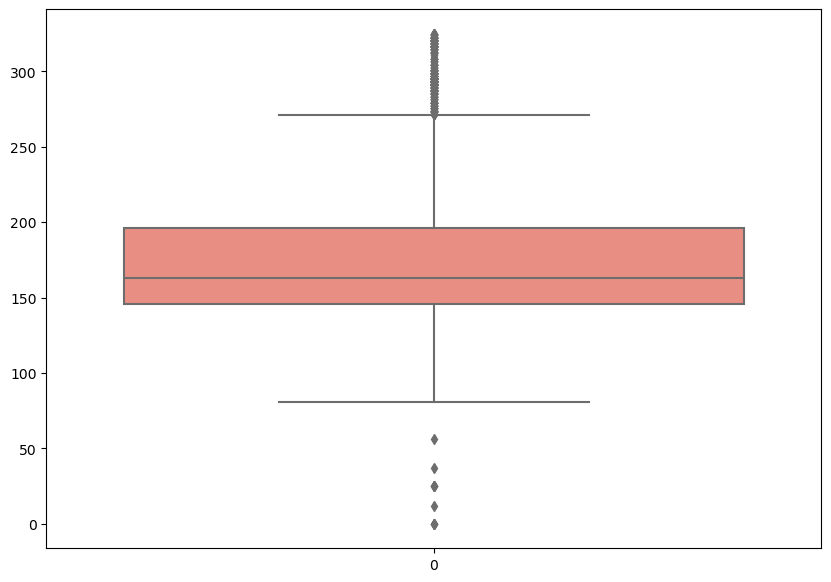

In [118]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.CashbackAmount, color='Salmon')

In [119]:
data_dt[data_num].skew(axis = 0, skipna = True)

Tenure                         0.736513
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
NumberOfDeviceRegistered      -0.396969
NumberOfAddress                1.088639
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
CashbackAmount                 1.149595
dtype: float64

### EDA - BIVARIATE

#### Assessing Correlation between Numeric Variables using pairplot and heatmap

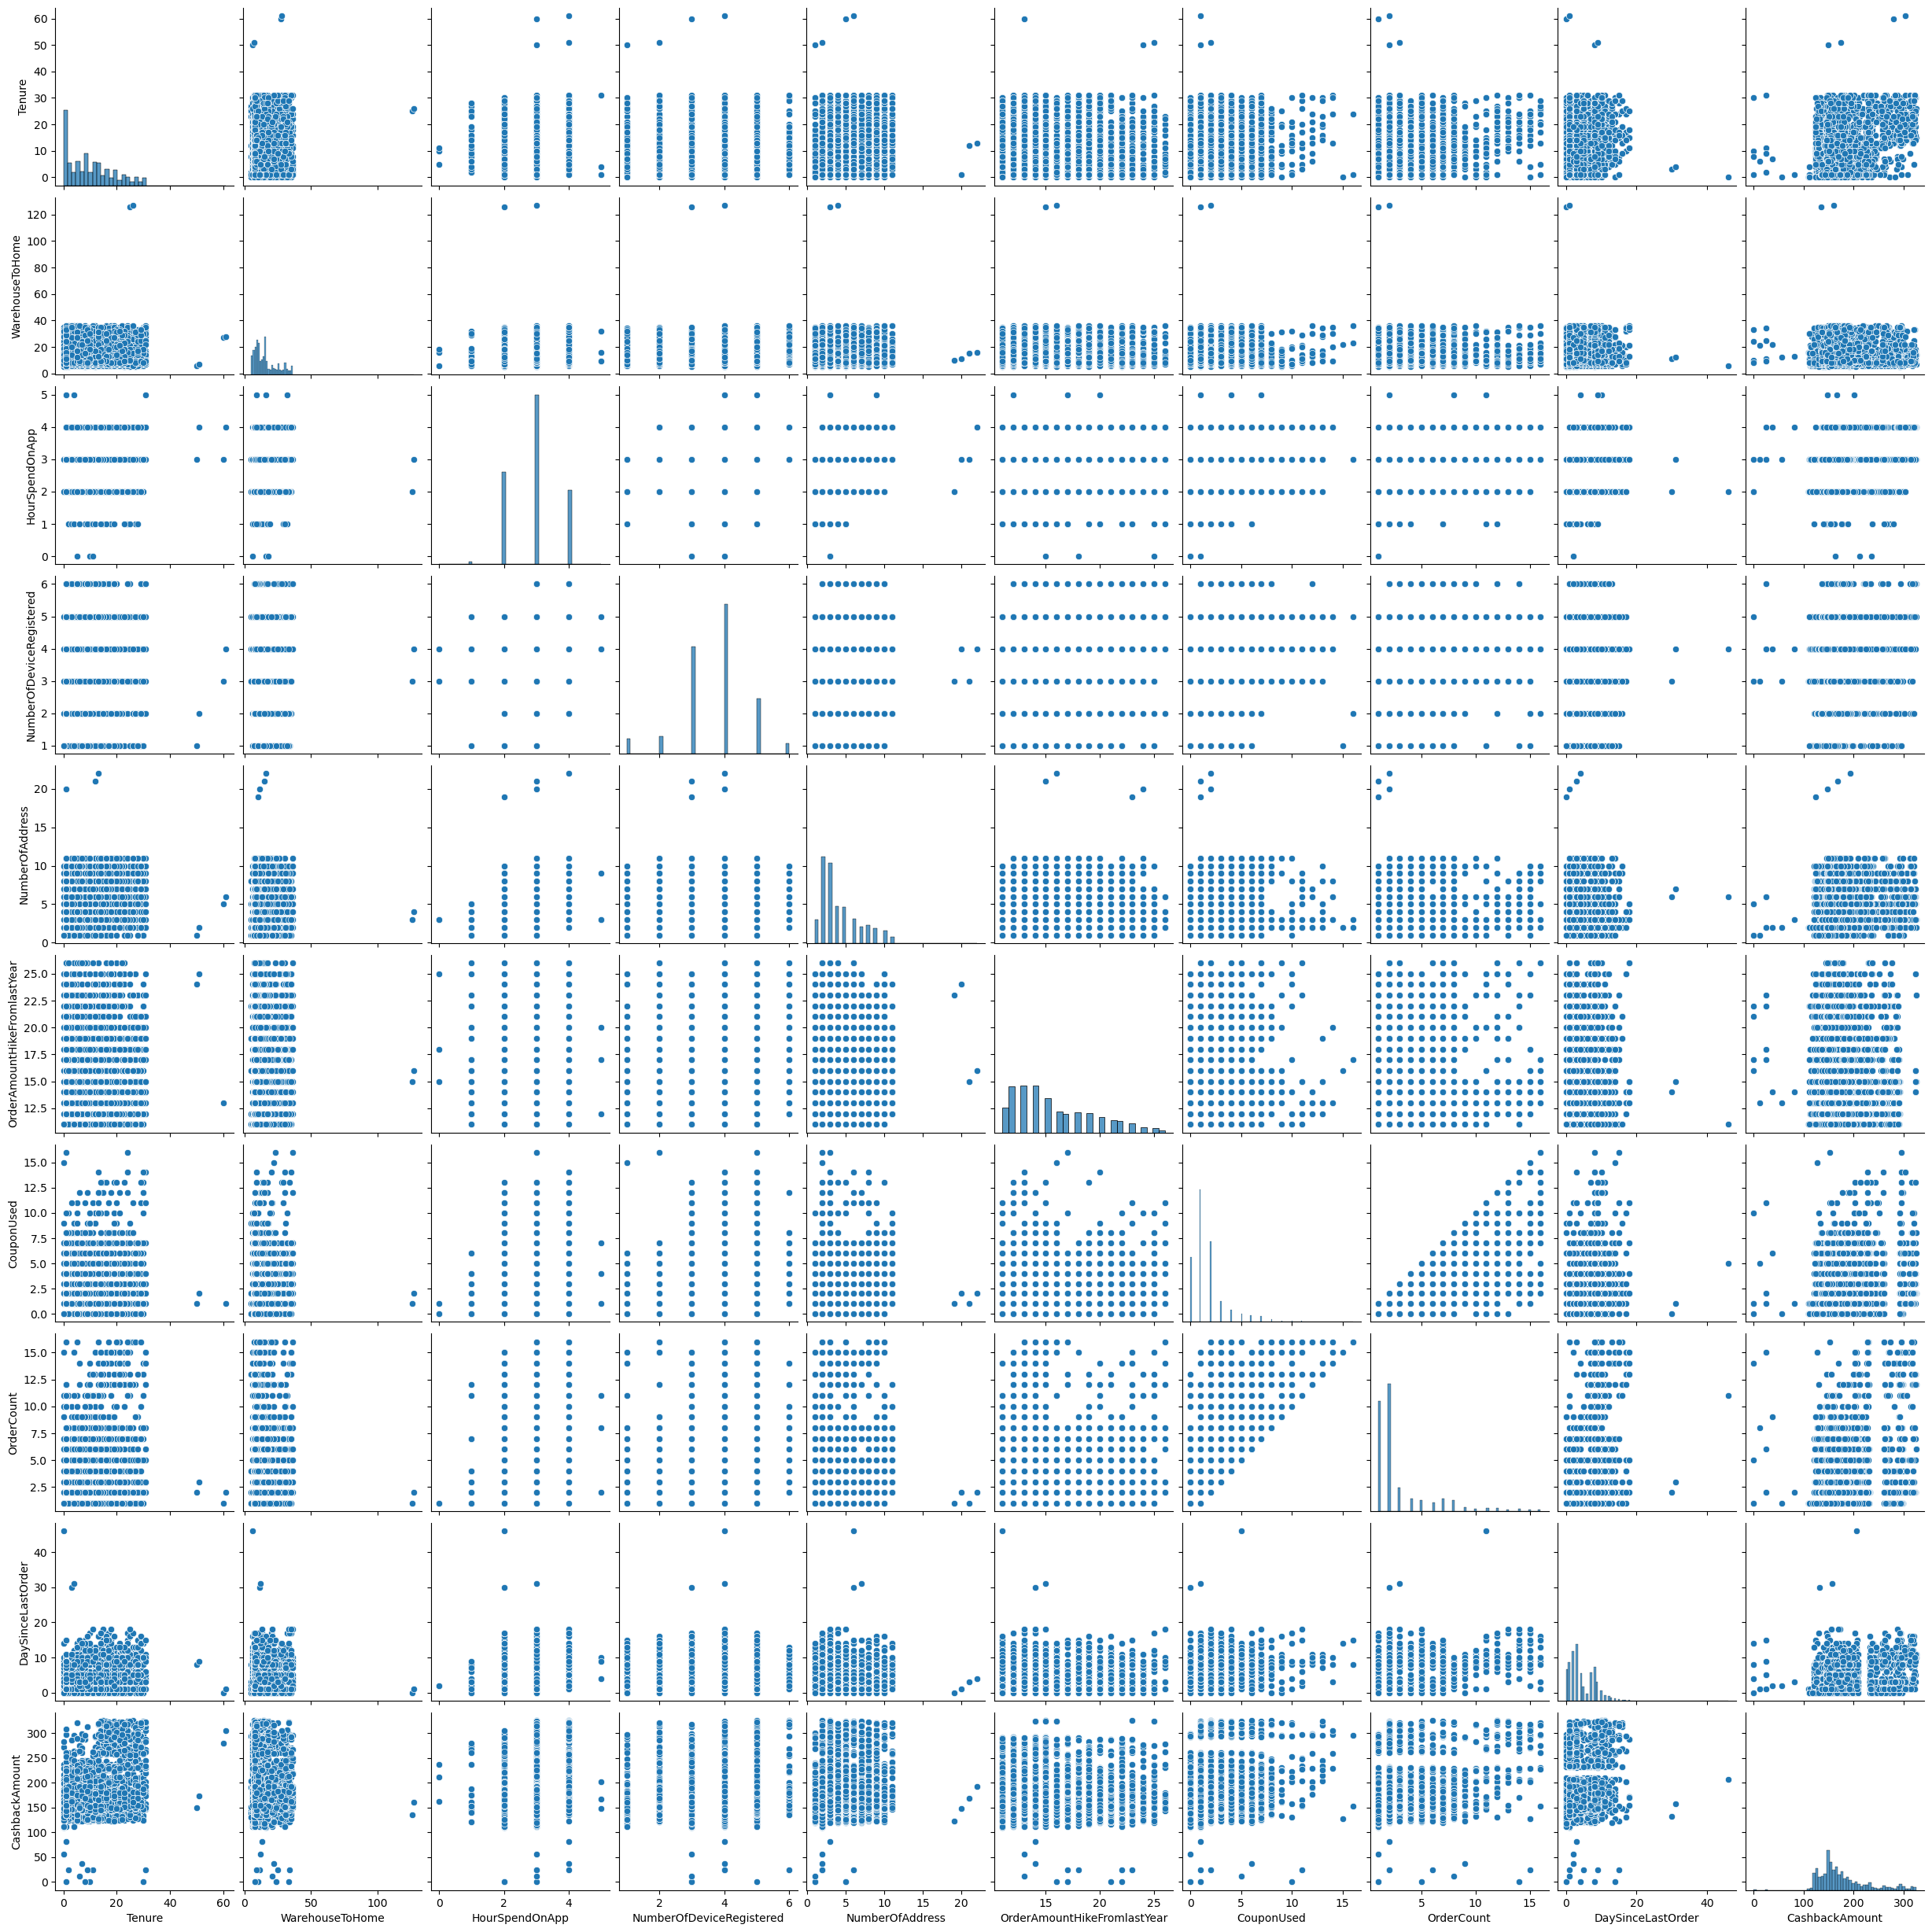

In [120]:
sns.pairplot(data_vt[data_num])

<Axes: >

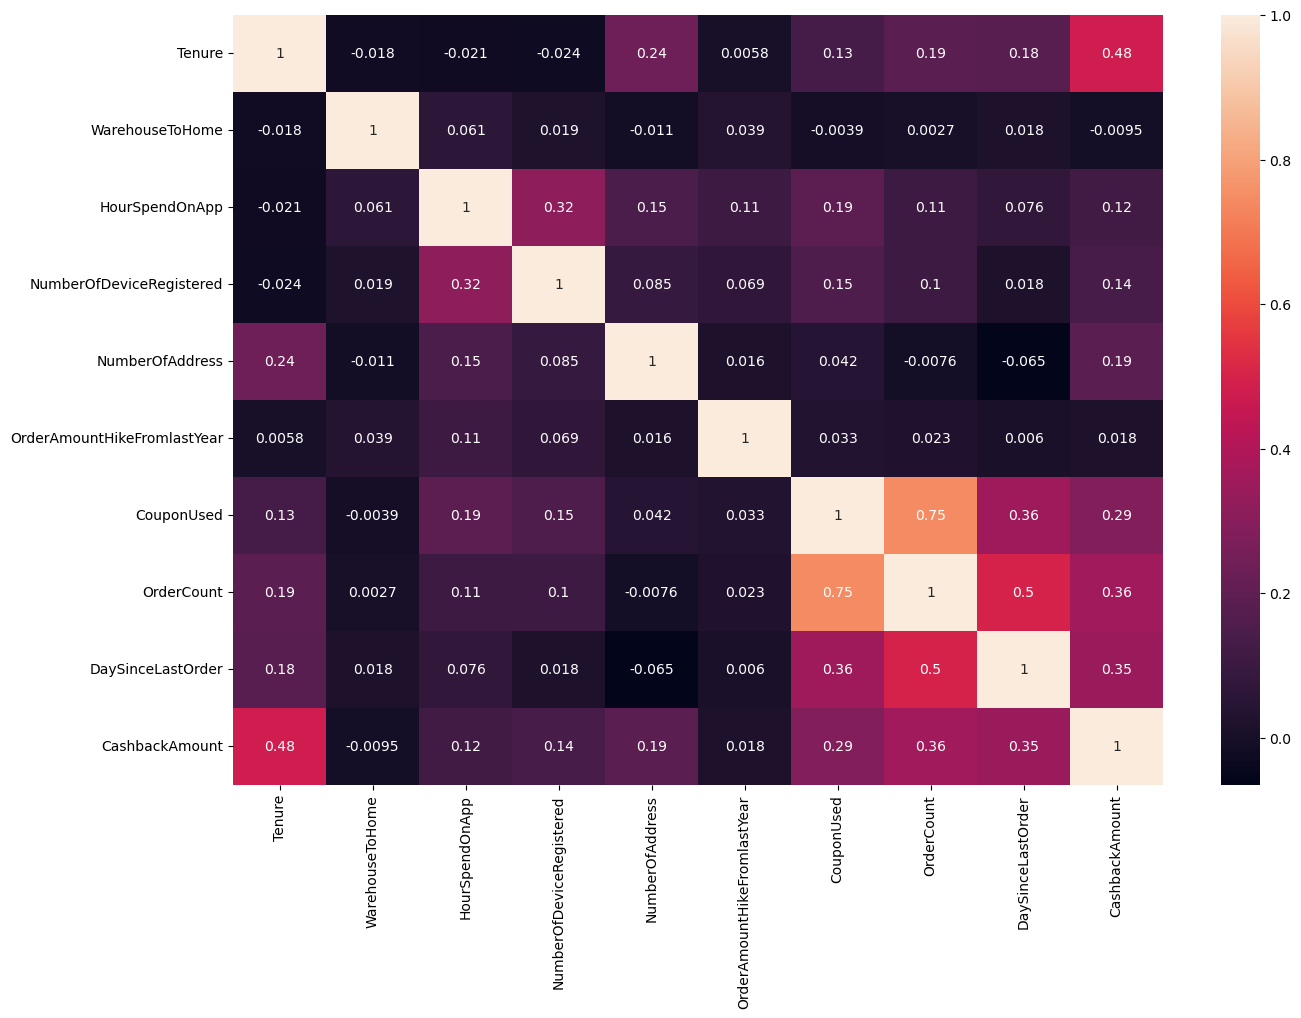

In [121]:
plt.figure(figsize=(15,10))
sns.heatmap(data_vt[data_num].corr(), annot=True)

<b>Note: </b> Only CouponsUsed and OrderCount appear to have a strong correlation; rest are not significantly correlated.

#### Bivariate analysis of Churn (target variable) with independent Numeric variables:

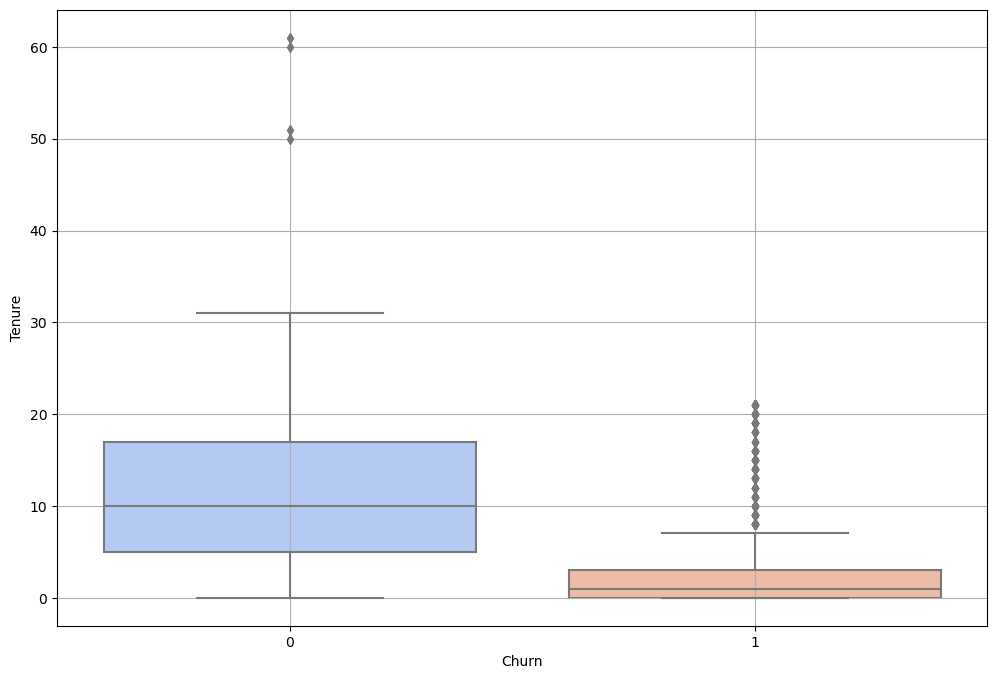

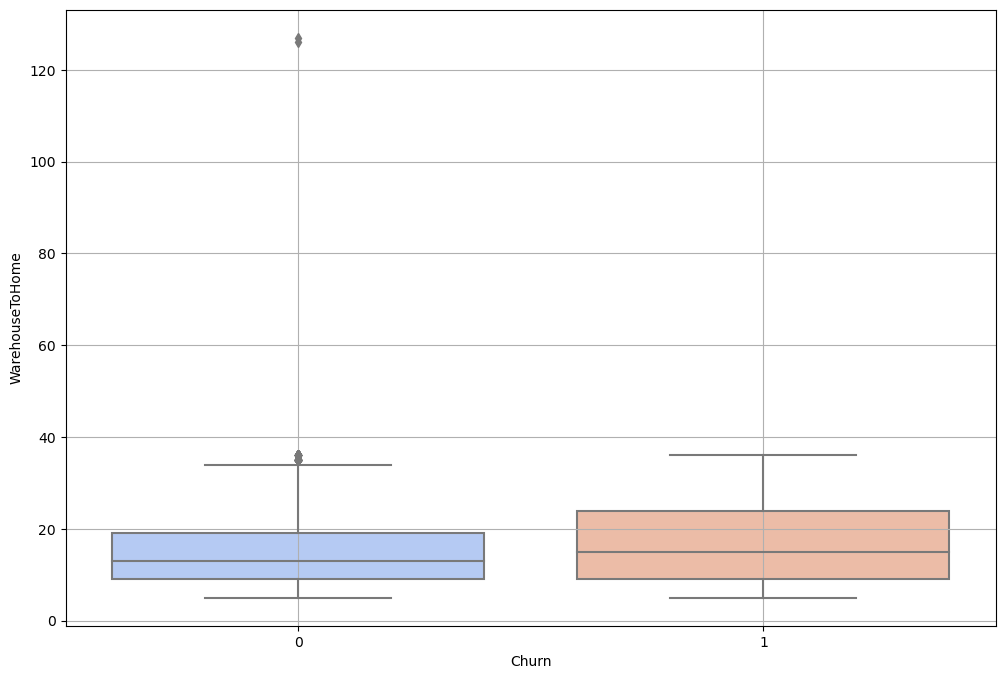

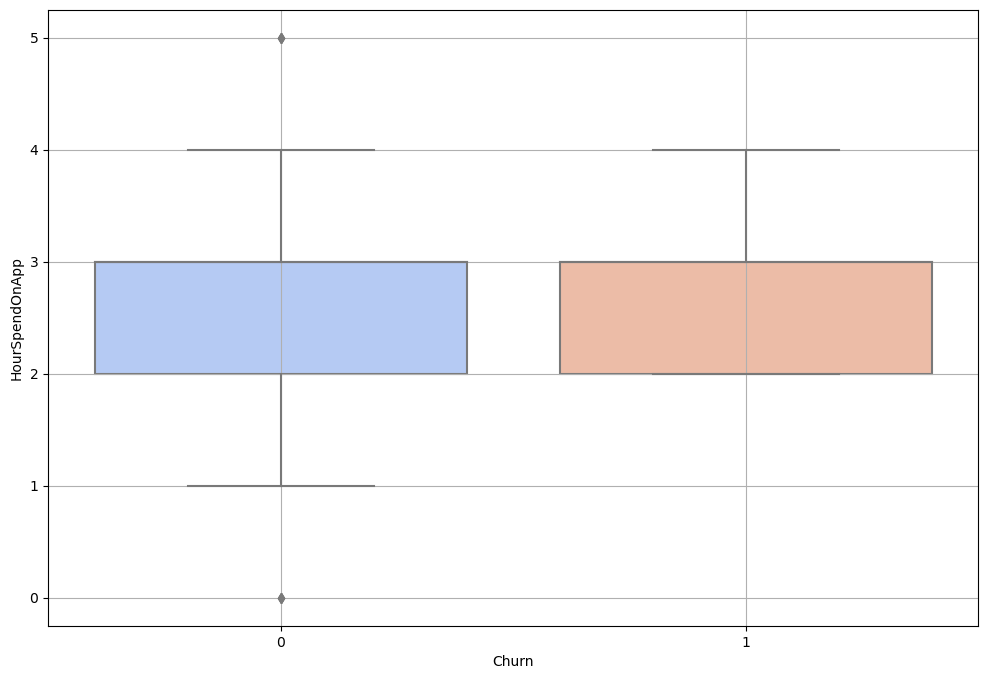

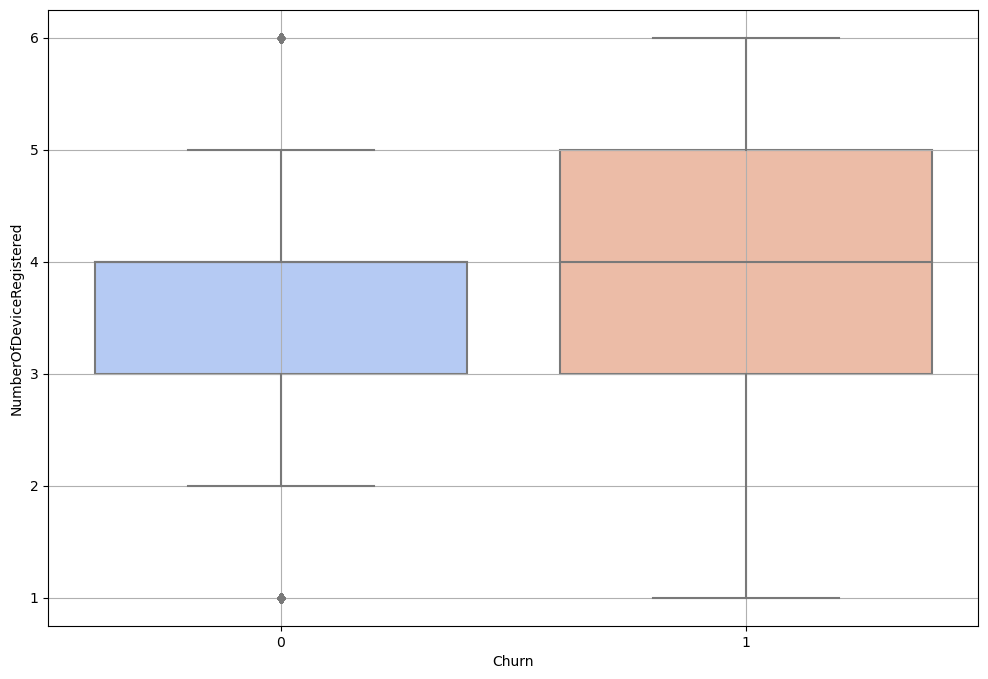

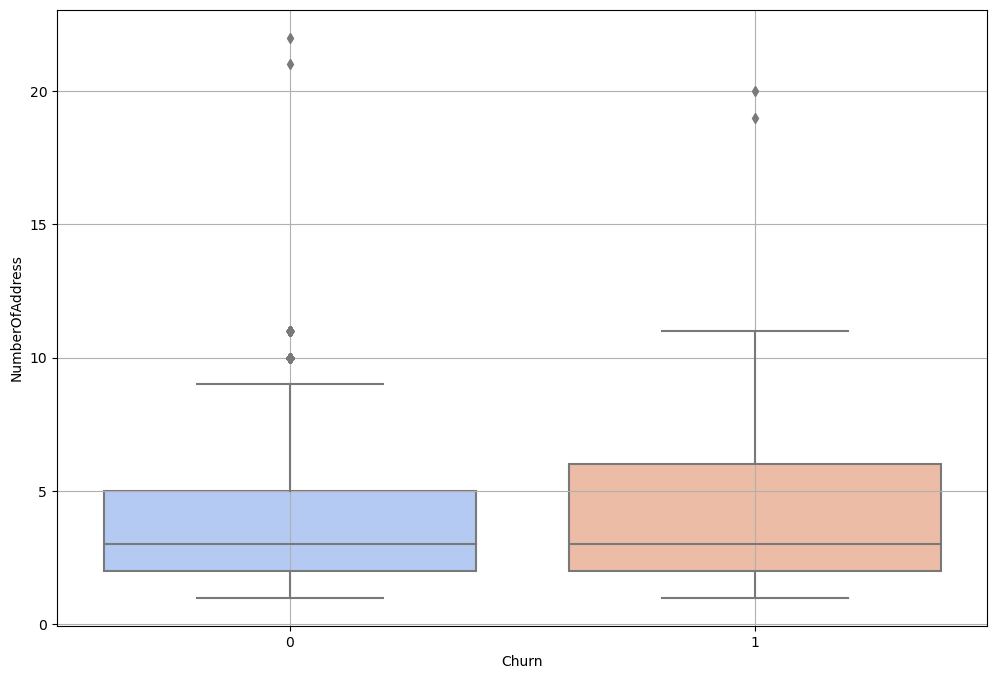

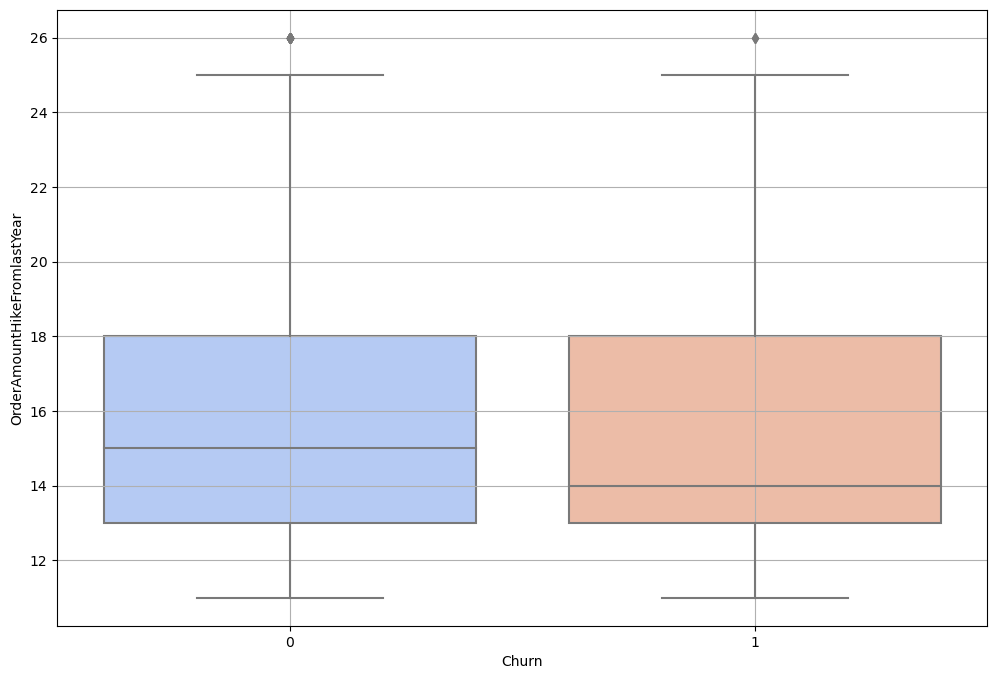

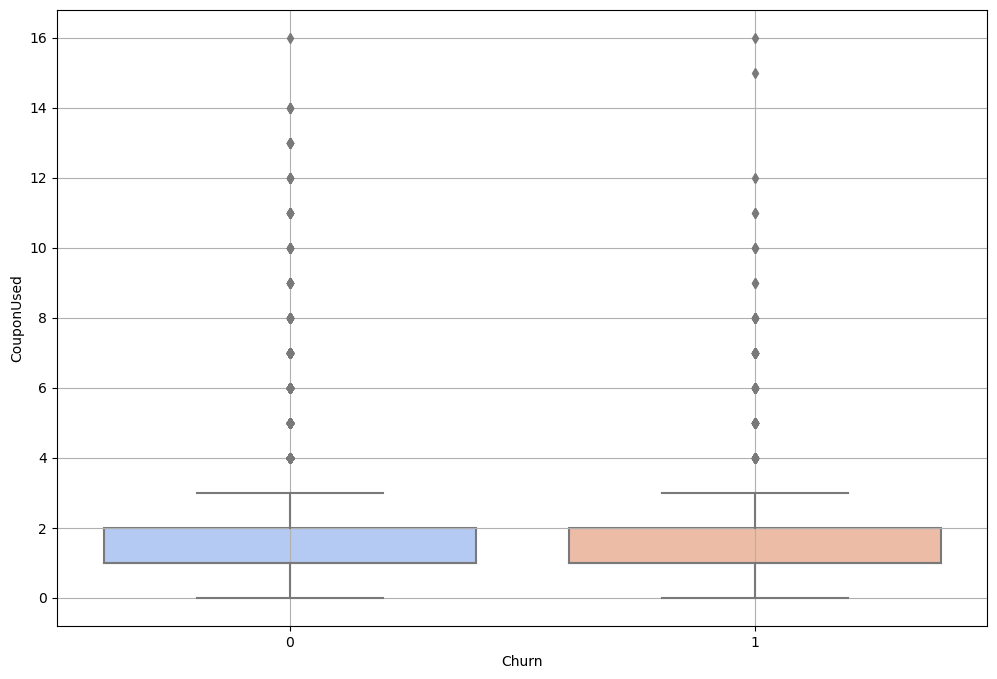

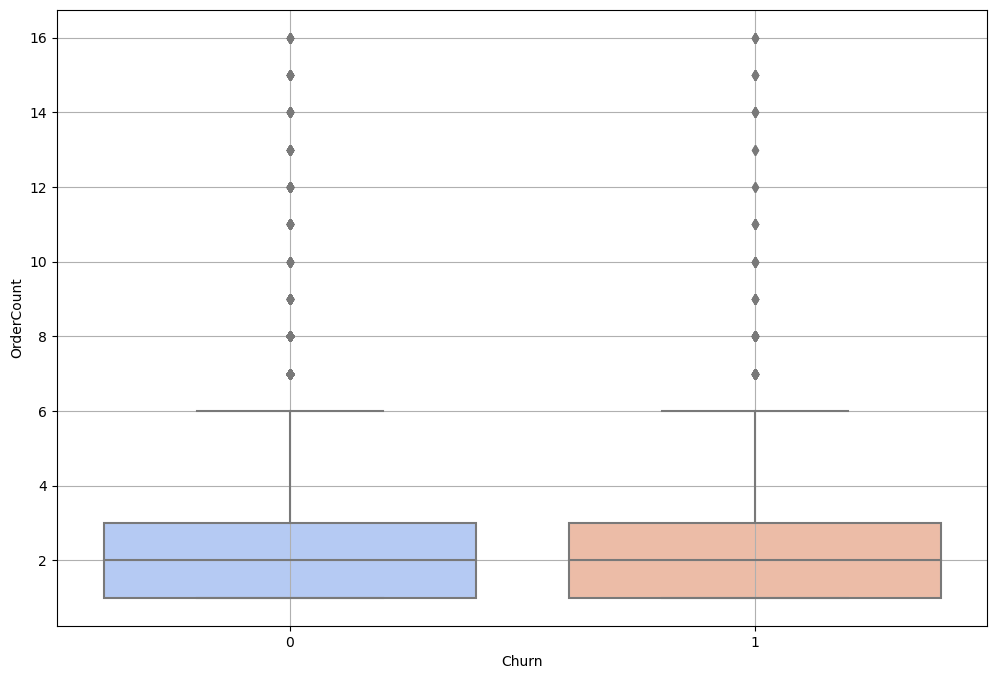

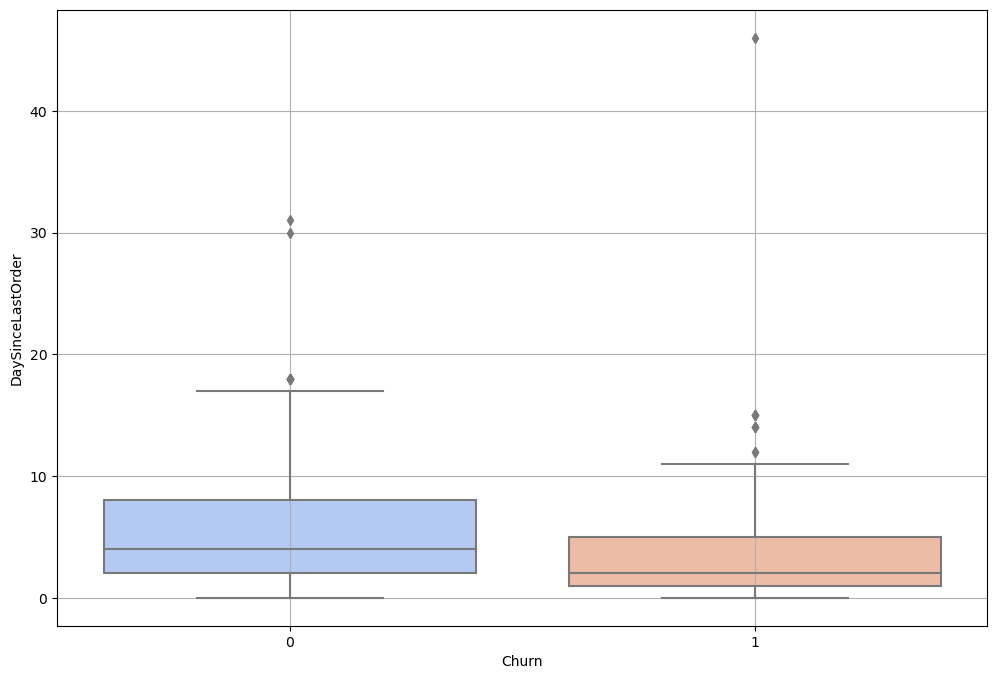

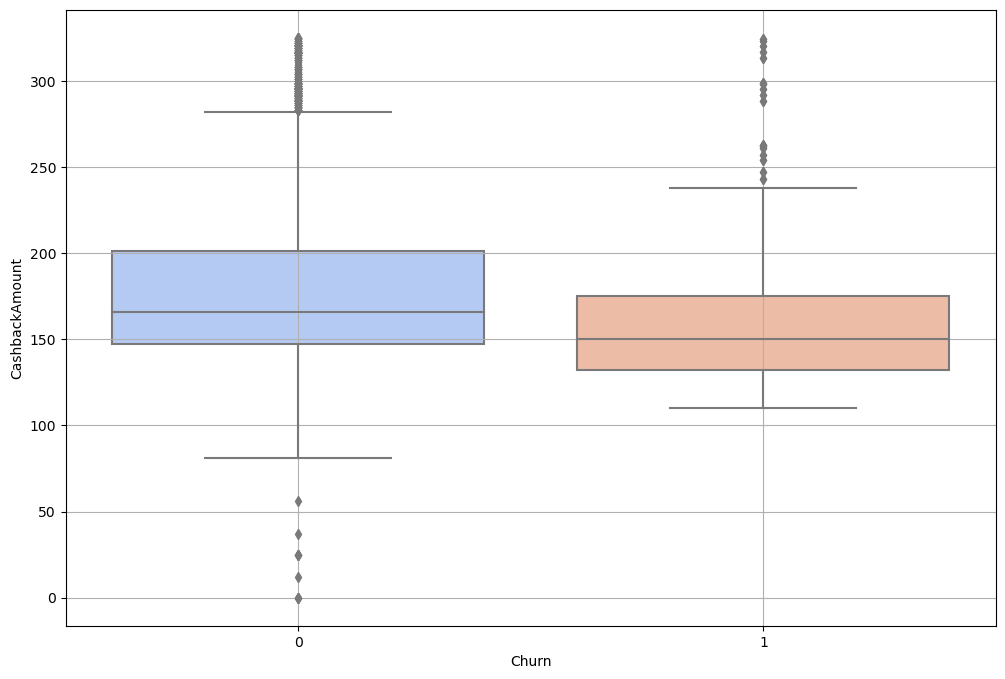

In [122]:
for column in data_num:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=data_vt['Churn'],y=data_vt[column].dropna(), palette='coolwarm')
    plt.grid()
    plt.show()

Note: Tenure appears to be an important discriminator for Churn. Tenure of over 8, and especially over 20 typically indicates No Churn. 

#### Bivariate analysis of Churn (target variable) with independent Categorical variables:

crosstab
row: categories of each variable
column: count of churn, and not churn
margins

In [123]:
test_a = pd.crosstab(data_vt.Churn, data_vt['PreferredLoginDevice'], margins=True, normalize=True)

In [124]:
test_a

PreferredLoginDevice  Computer  Mobile Phone       All
Churn                                                 
0                     0.232682      0.598934  0.831616
1                     0.057549      0.110835  0.168384
All                   0.290231      0.709769  1.000000

In [125]:
test_a.iloc[1,0]

0.057548845470692715

In [126]:
test_a.iloc[1,1]

0.1108348134991119

In [127]:
test_a.shape[1]

3

In [128]:
for column in data_cat:
    temp_tab = pd.crosstab(data_vt.Churn, data_vt[column], margins=True, normalize=True)
    print(temp_tab)
    cols = temp_tab.shape[1] - 1
    col = 0
    while col < cols:
        print(temp_tab.iloc[1,col]/temp_tab.iloc[2,col])
        col = col + 1
    print()
    print('\n')

PreferredLoginDevice  Computer  Mobile Phone       All
Churn                                                 
0                     0.232682      0.598934  0.831616
1                     0.057549      0.110835  0.168384
All                   0.290231      0.709769  1.000000
0.19828641370869032
0.15615615615615616



CityTier         1         2         3       All
Churn                                           
0         0.556661  0.034458  0.240497  0.831616
1         0.094494  0.008526  0.065364  0.168384
All       0.651155  0.042984  0.305861  1.000000
0.14511729405346424
0.1983471074380165
0.21370499419279906



PreferredPaymentMode  Cash on Delivery  Credit Card  Debit Card  E wallet  \
Churn                                                                       
0                             0.068561     0.270337    0.347780  0.084192   
1                             0.022735     0.044760    0.063233  0.024867   
All                           0.091297     0.315098    0.411012  0.

#### Bivariate Analysis of Categorical and Numeric variables - for Missing Value imputation

In [129]:
data_vt.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

#### There are 7 numeric columns that have missing values. We will now study if there is any association between these numeric variables and categorical variables, so that we can better impute the missing values

MISSING VALUES in columns: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [130]:
data_vt.Tenure.describe()

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

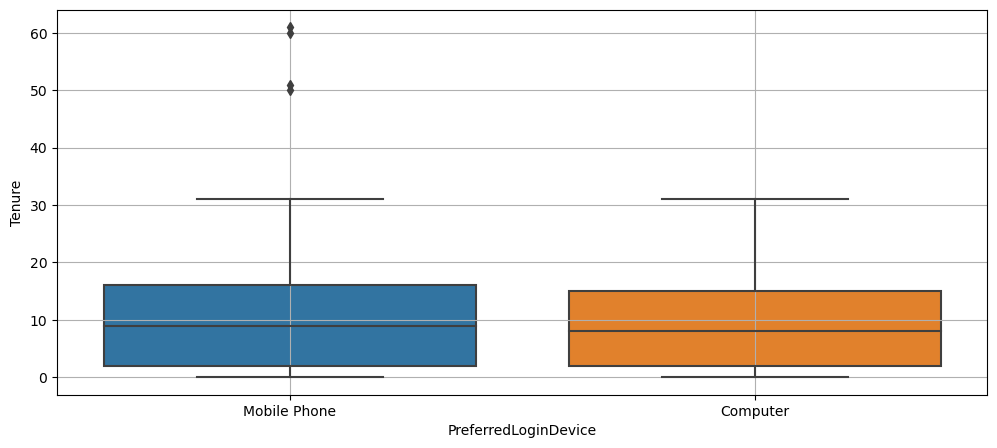

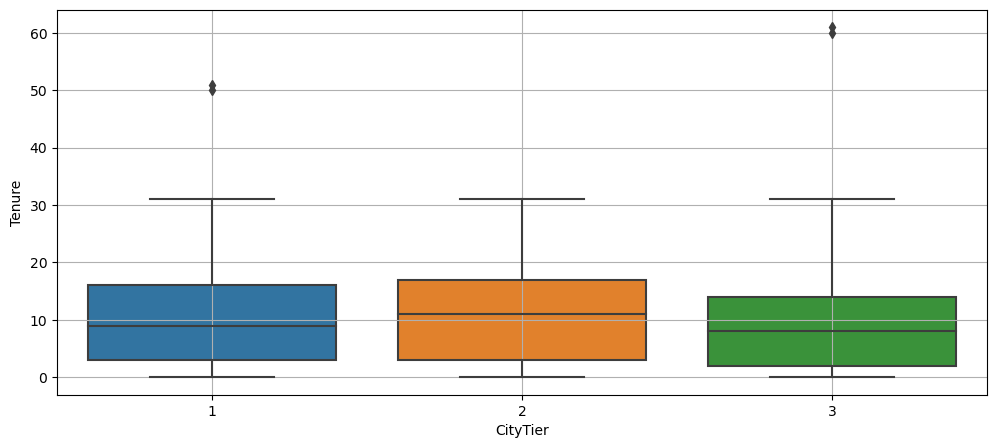

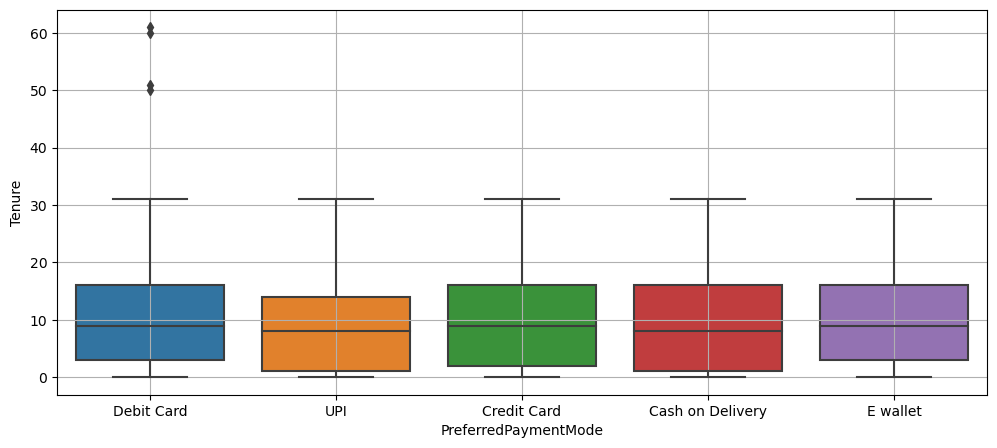

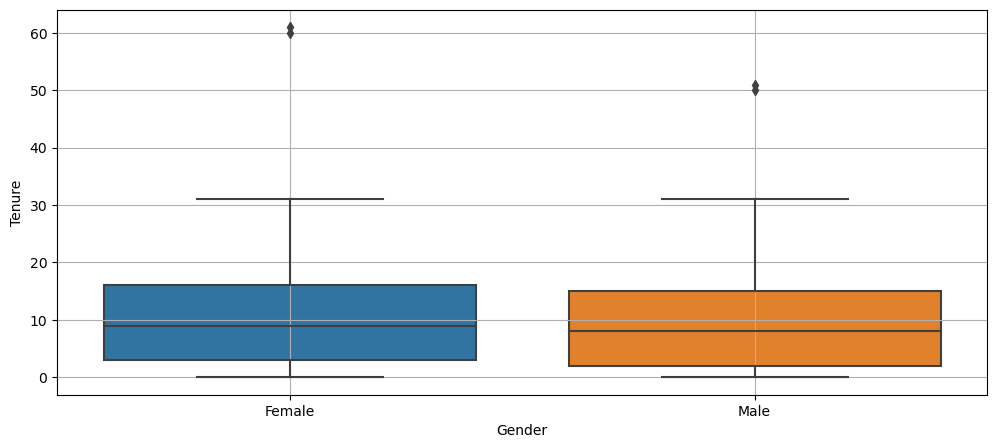

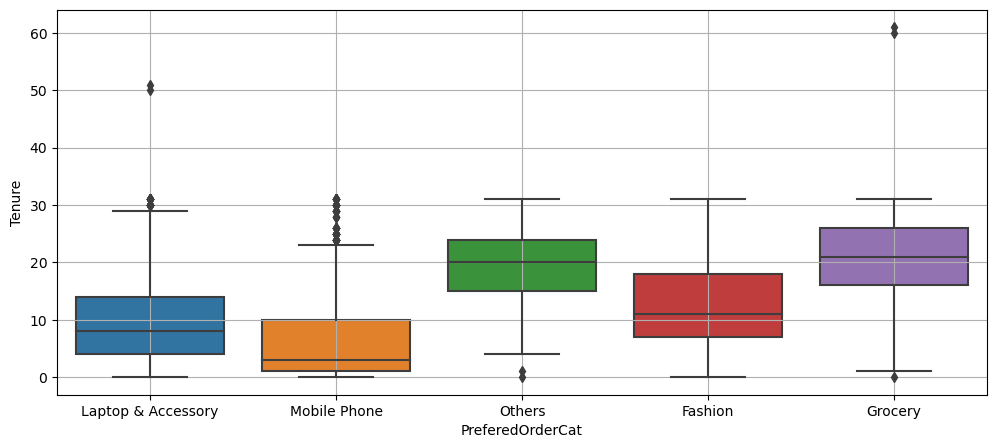

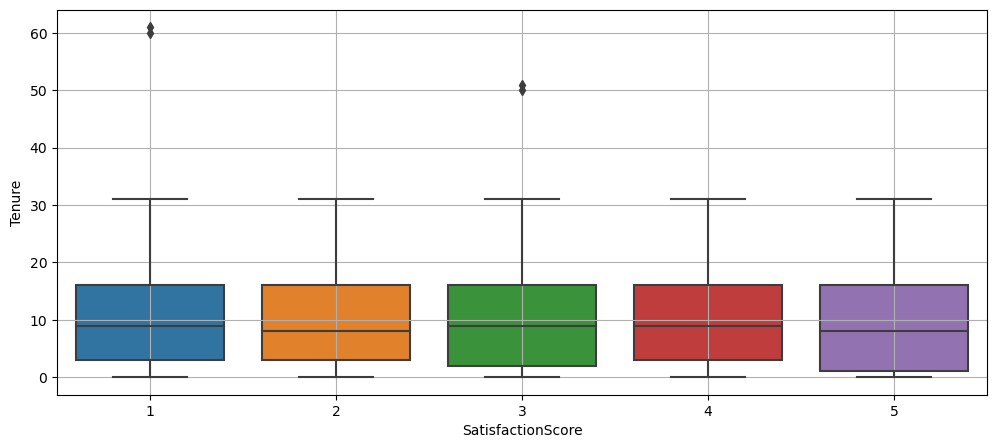

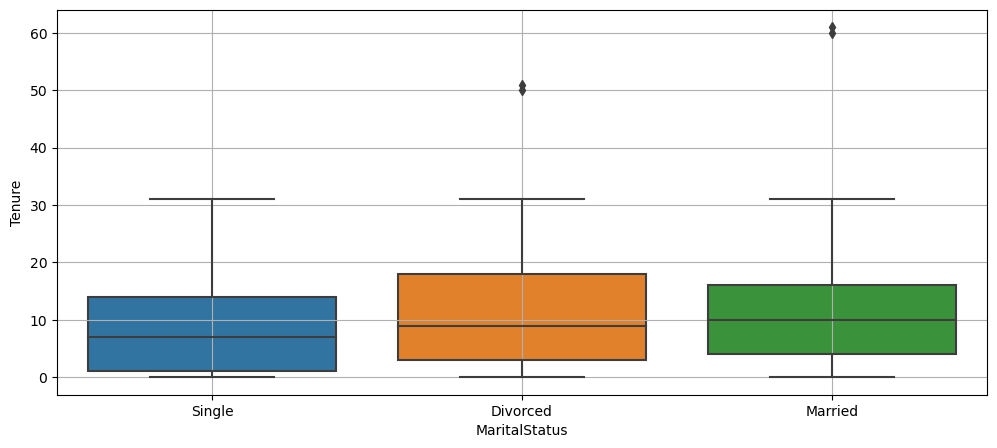

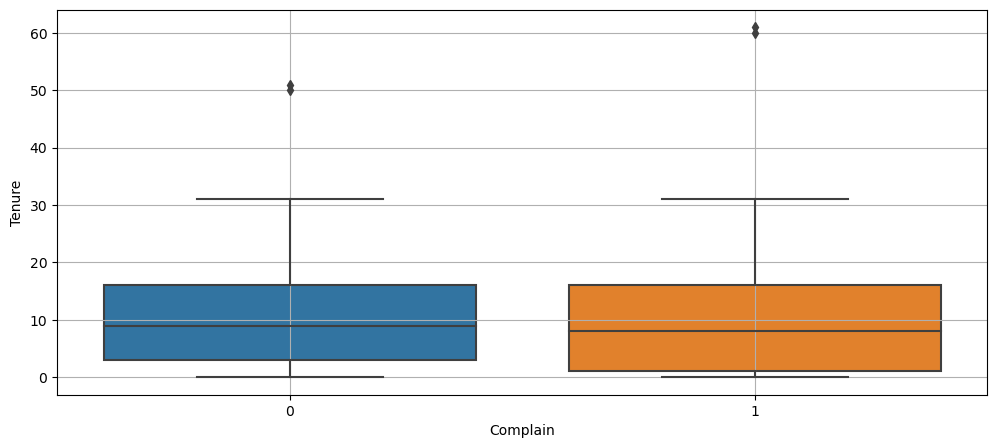

In [131]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['Tenure'])
    plt.grid()
    plt.show()

In [132]:
## Tenure varies for categories across: PreferedOrderCat, MaritalStatus

In [133]:
data_vt.WarehouseToHome.describe()

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

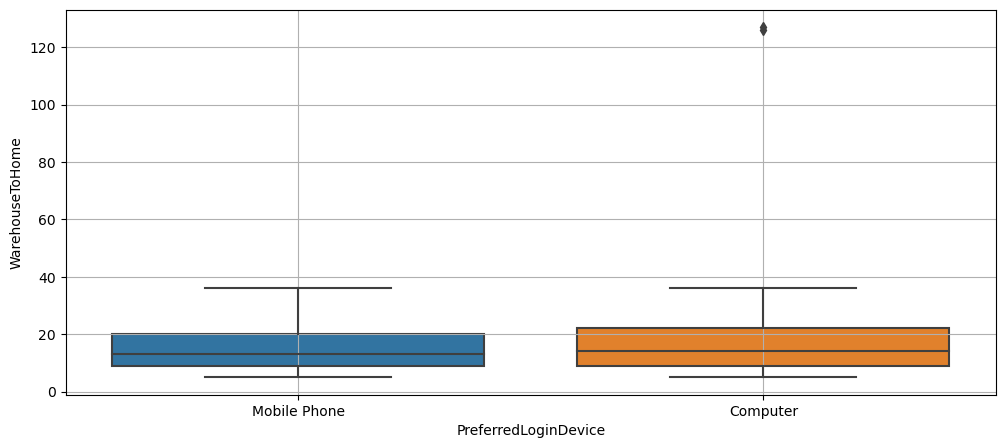

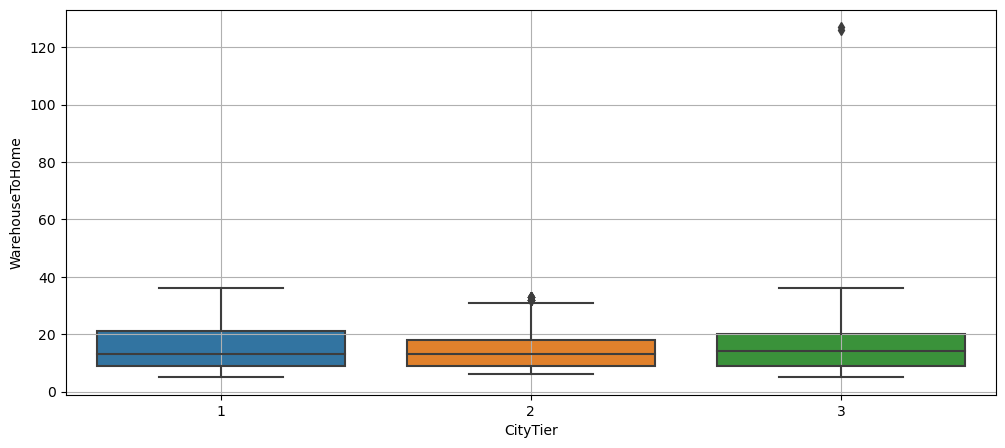

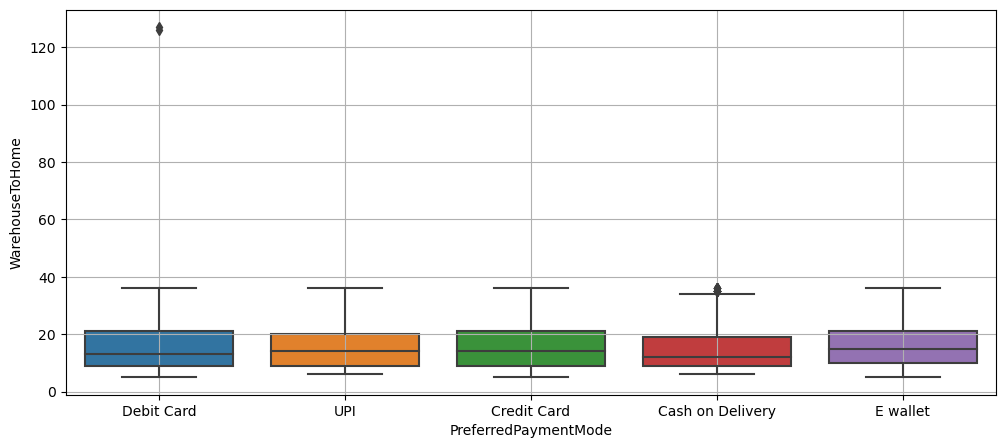

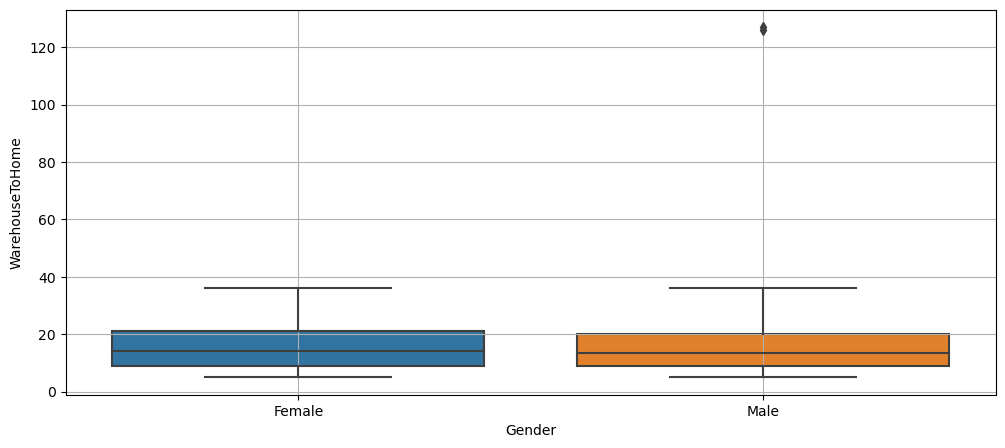

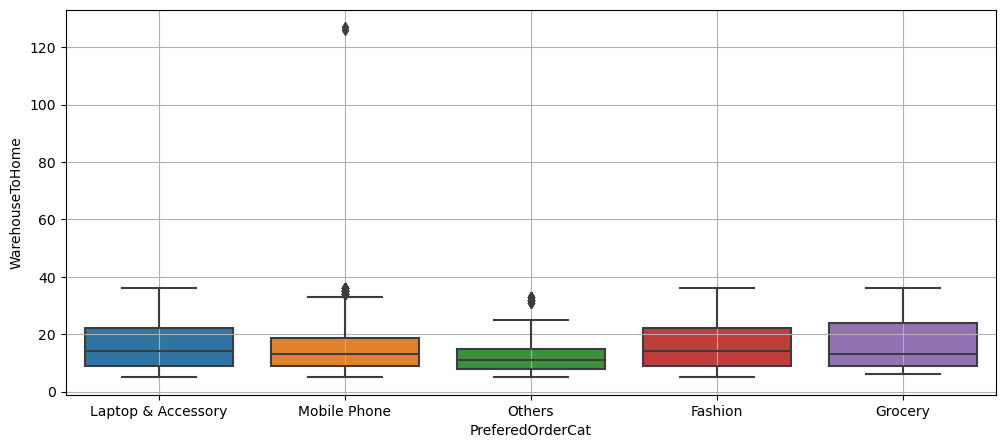

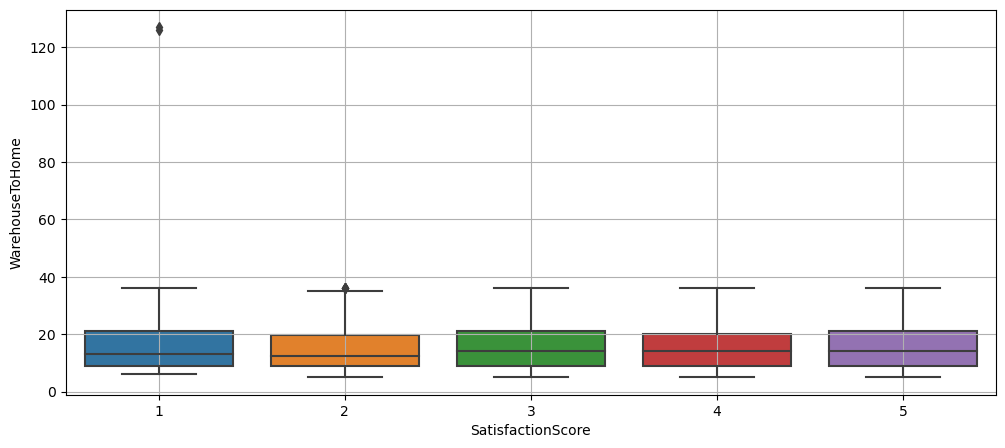

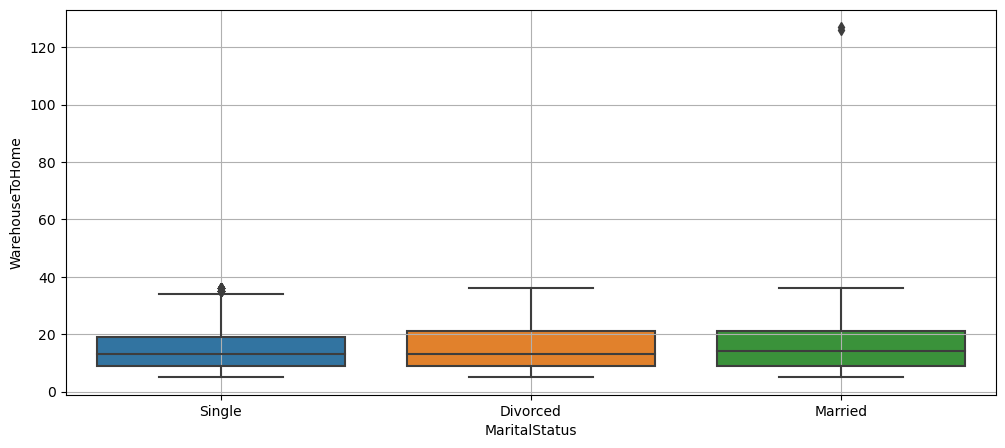

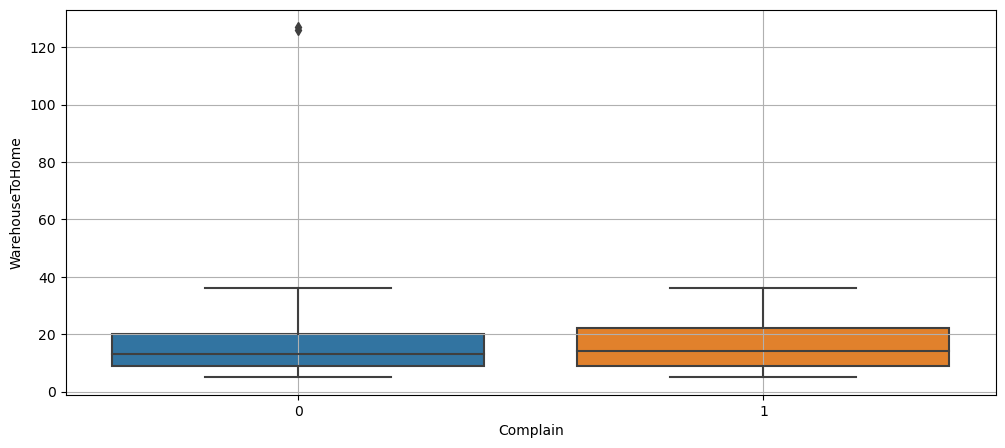

In [134]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['WarehouseToHome'])
    plt.grid()
    plt.show()

In [135]:
## no clear differentiator - PreferedOrderCat marginally

In [136]:
data_vt.HourSpendOnApp.describe()

count    5375.000000
mean        2.931535
std         0.721926
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

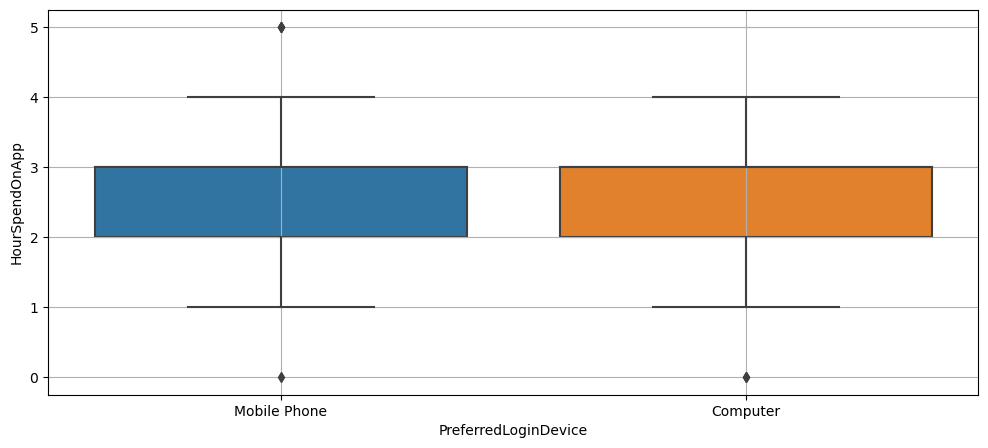

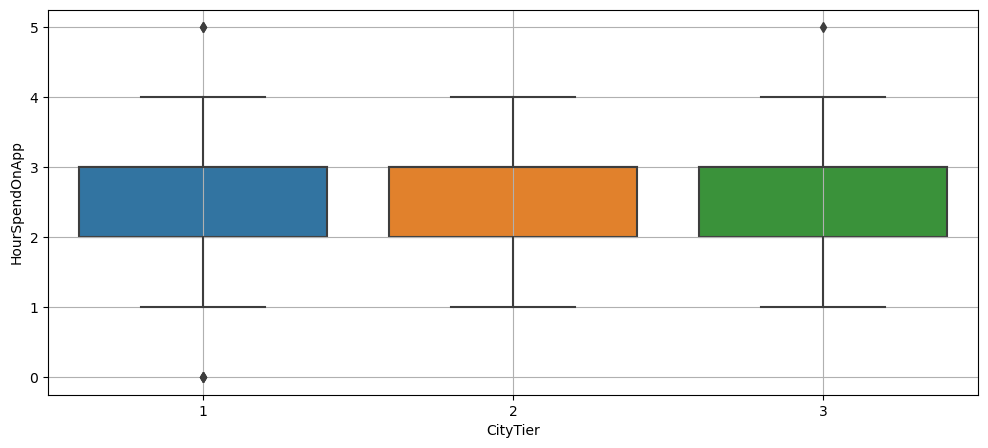

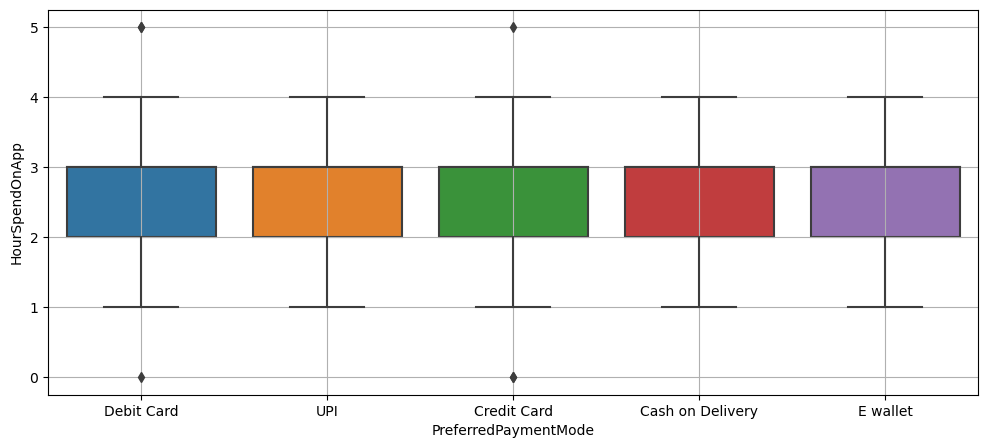

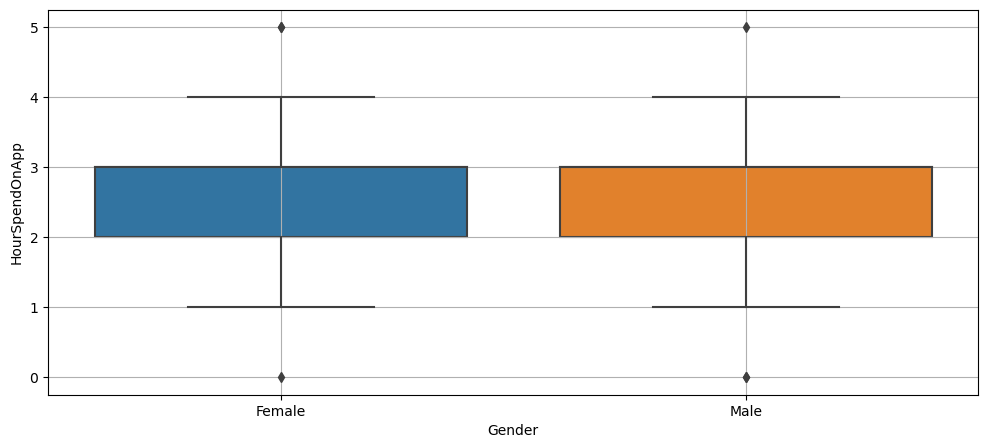

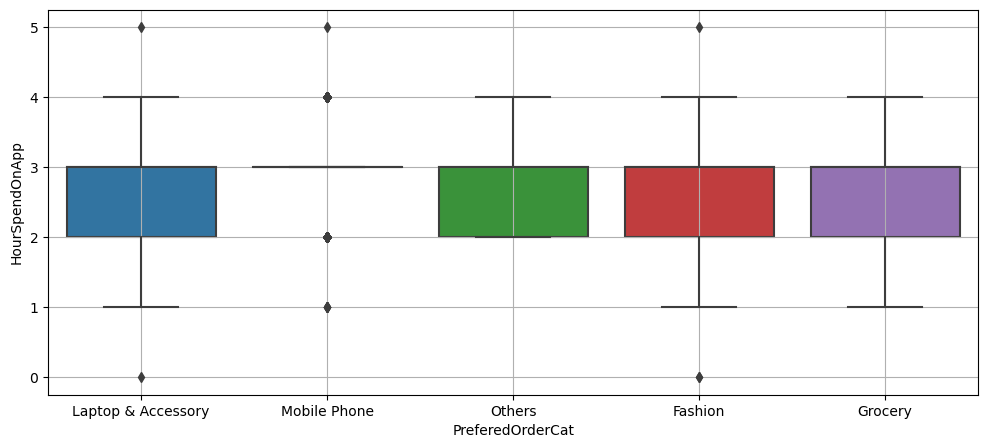

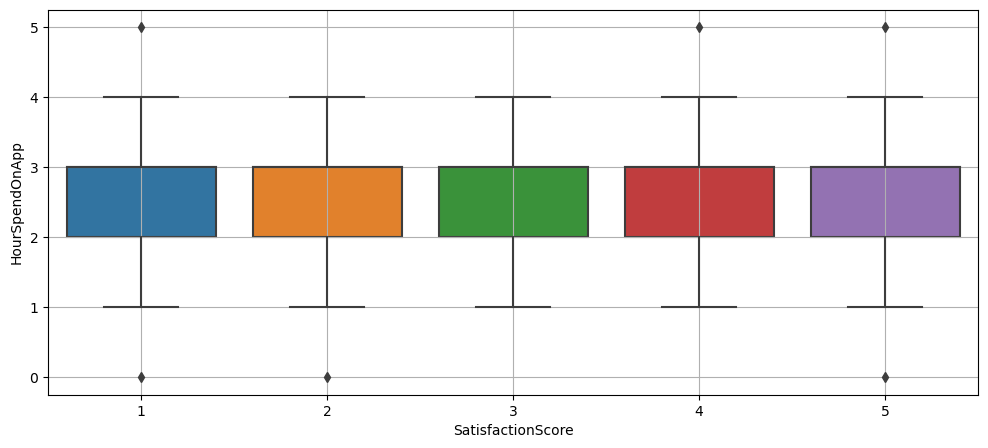

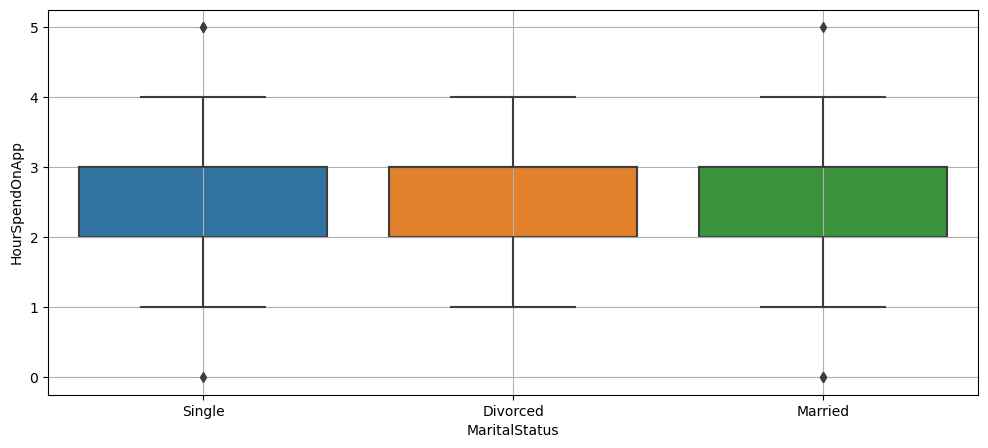

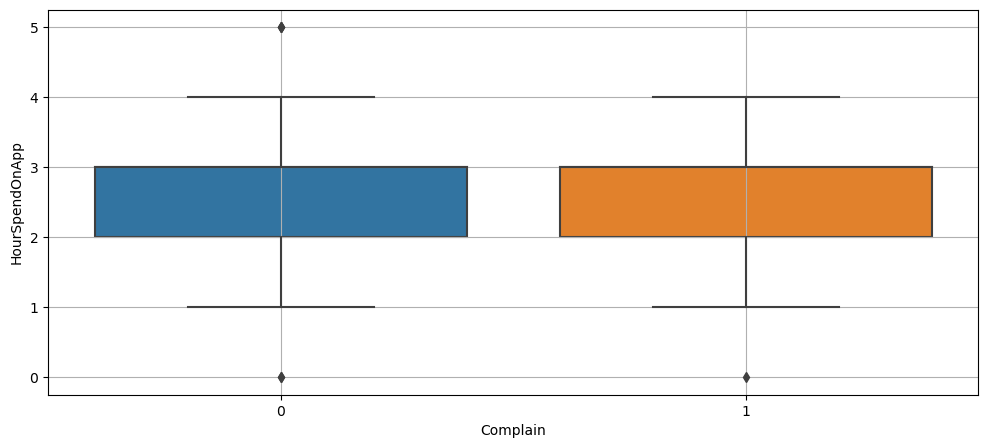

In [137]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['HourSpendOnApp'])
    plt.grid()
    plt.show()

In [138]:
## HourSpendOnApp varies for categories across:: PreferedOrderCat

In [139]:
data_vt.OrderAmountHikeFromlastYear.describe()

count    5365.000000
mean       15.707922
std         3.675485
min        11.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        26.000000
Name: OrderAmountHikeFromlastYear, dtype: float64

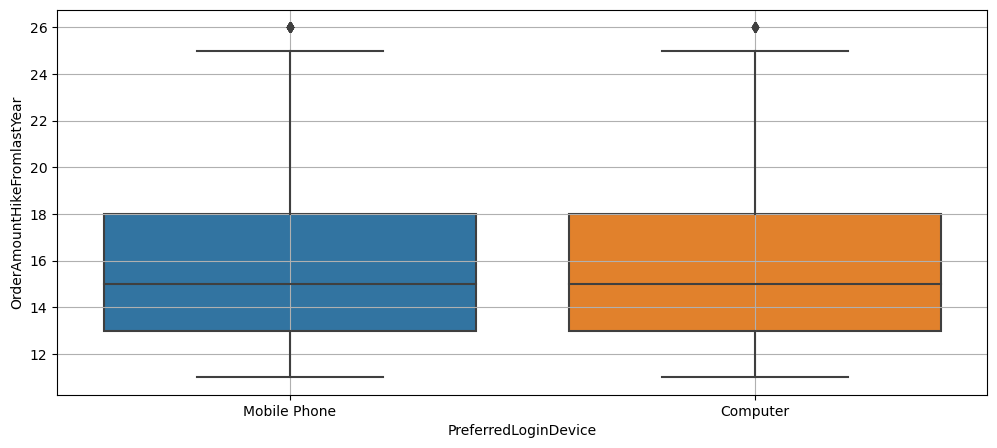

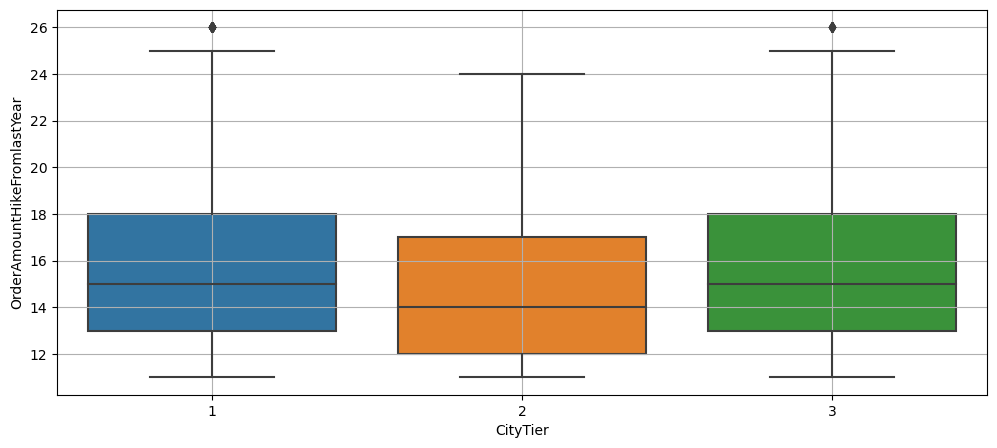

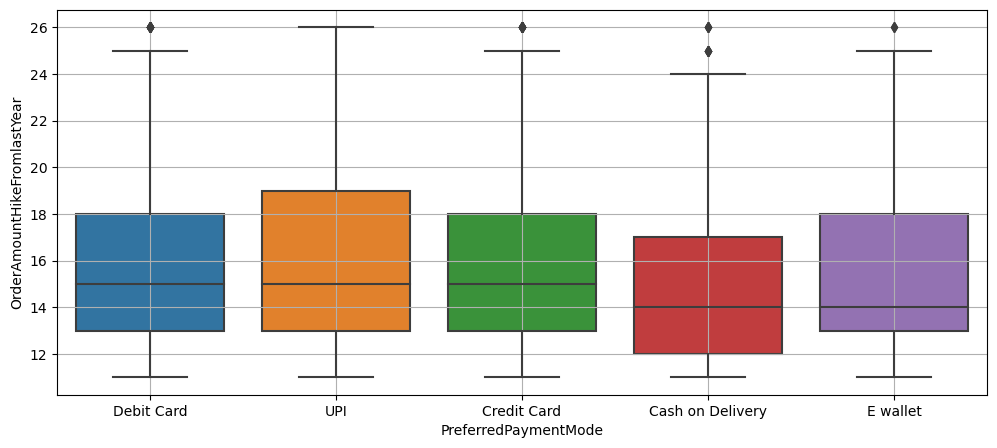

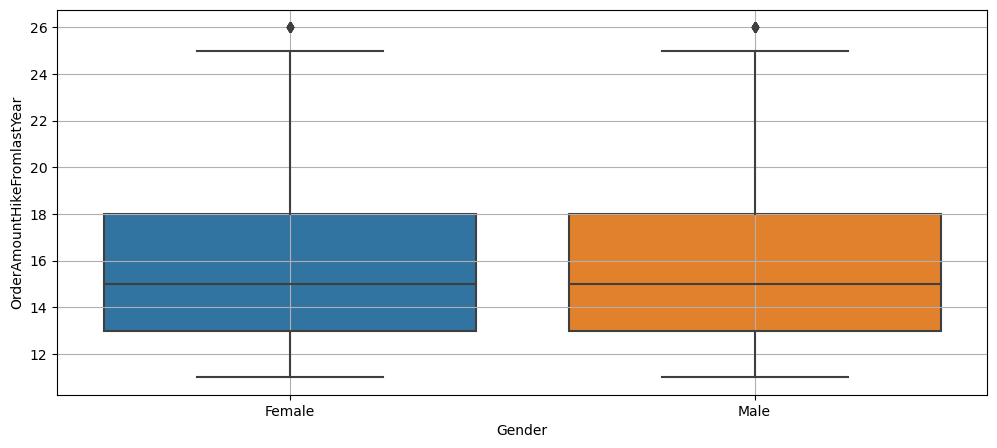

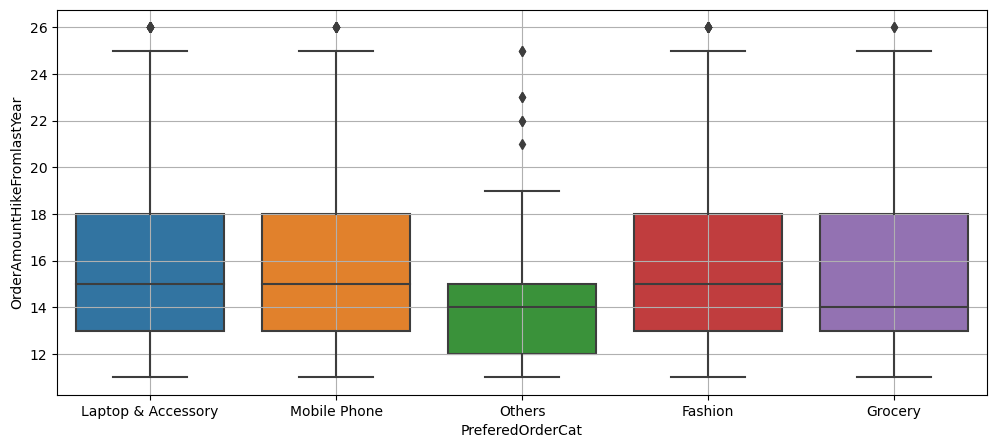

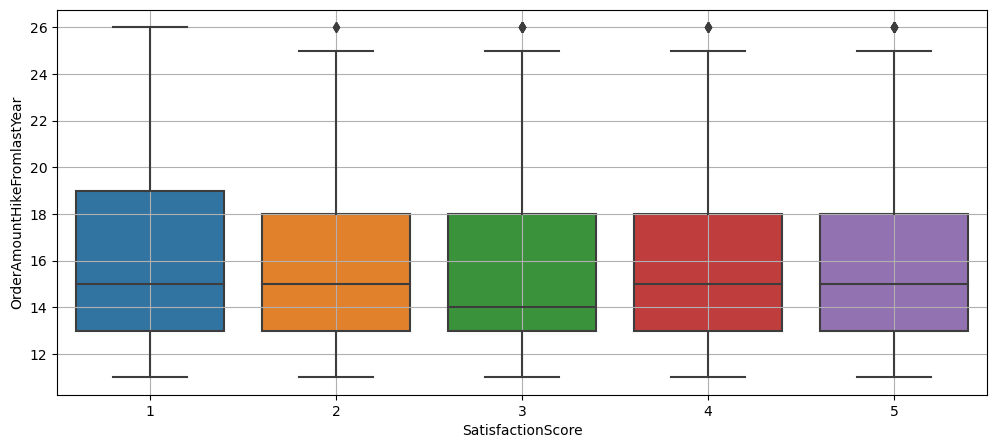

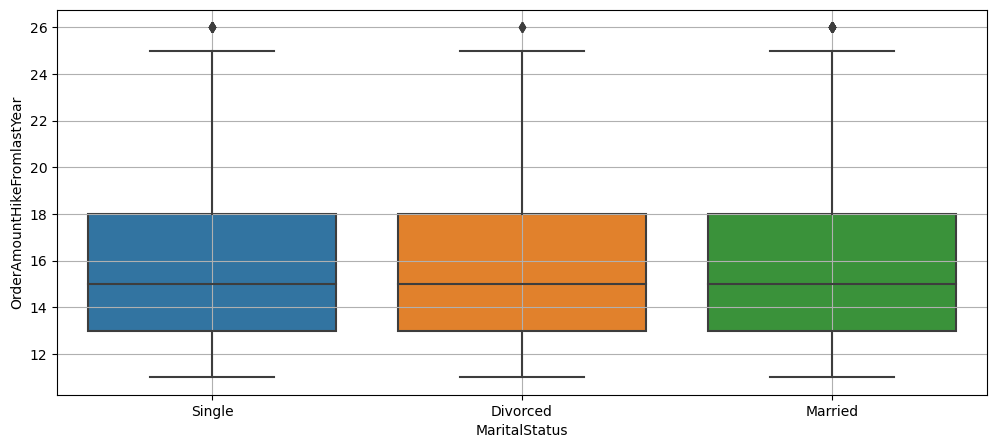

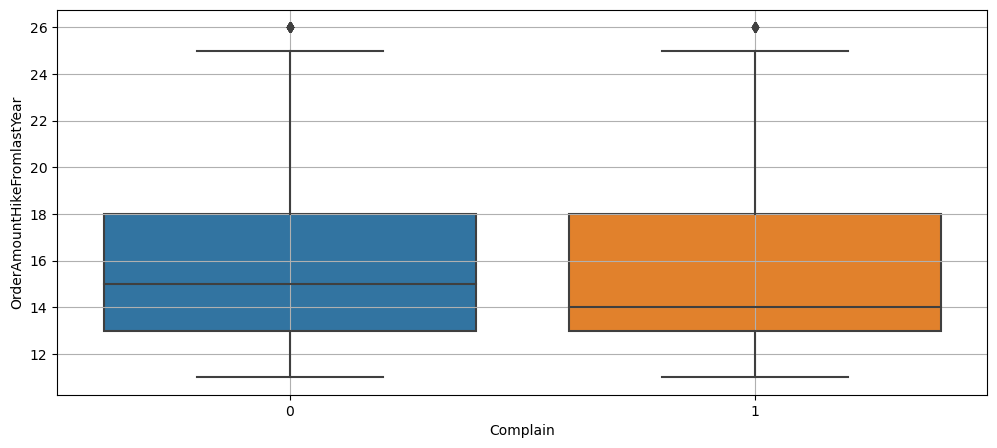

In [140]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['OrderAmountHikeFromlastYear'])
    plt.grid()
    plt.show()

In [141]:
## OrderAmountHikeFromlastYear varies for many categories between 15, 16. choose any one, maybe PreferedOrderCat.

In [142]:
data_vt.CouponUsed.describe()

count    5374.000000
mean        1.751023
std         1.894621
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: CouponUsed, dtype: float64

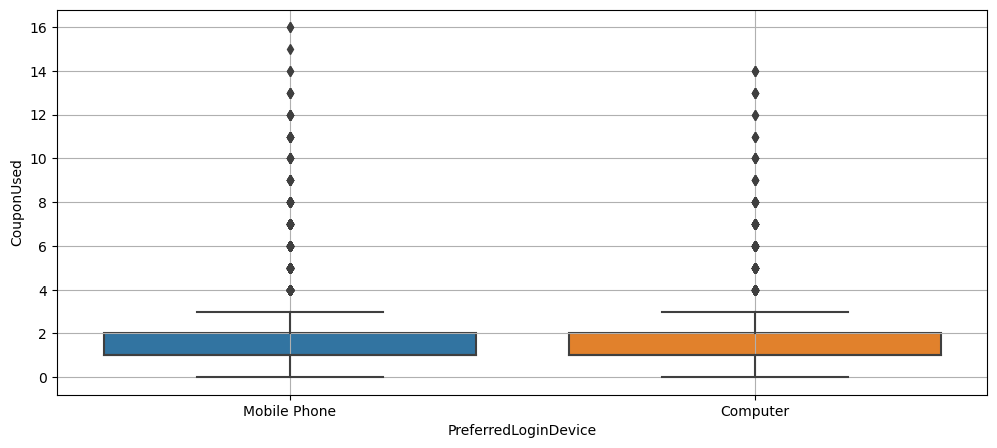

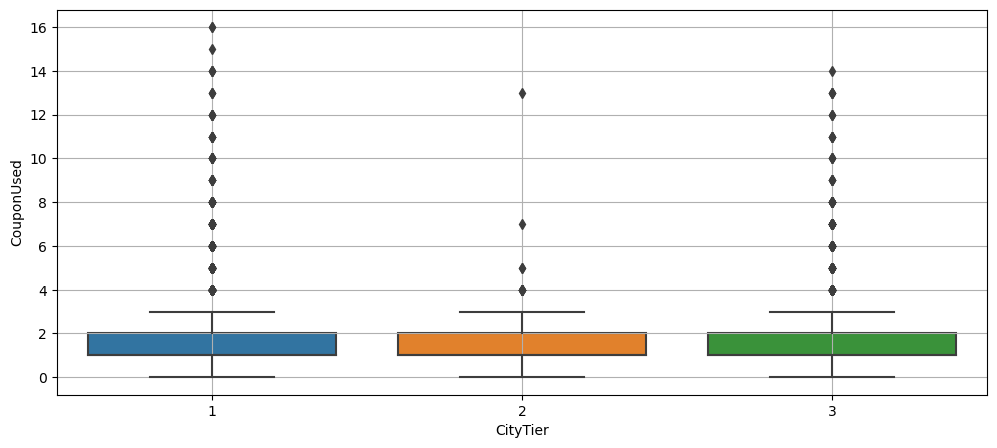

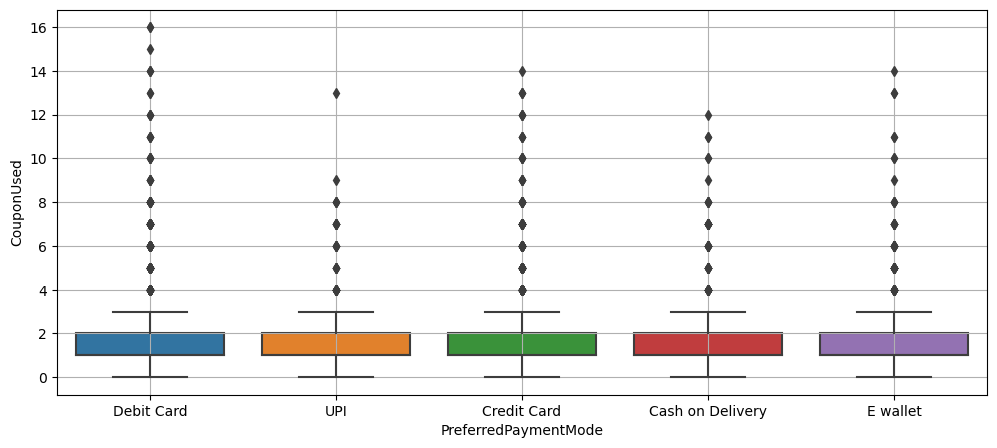

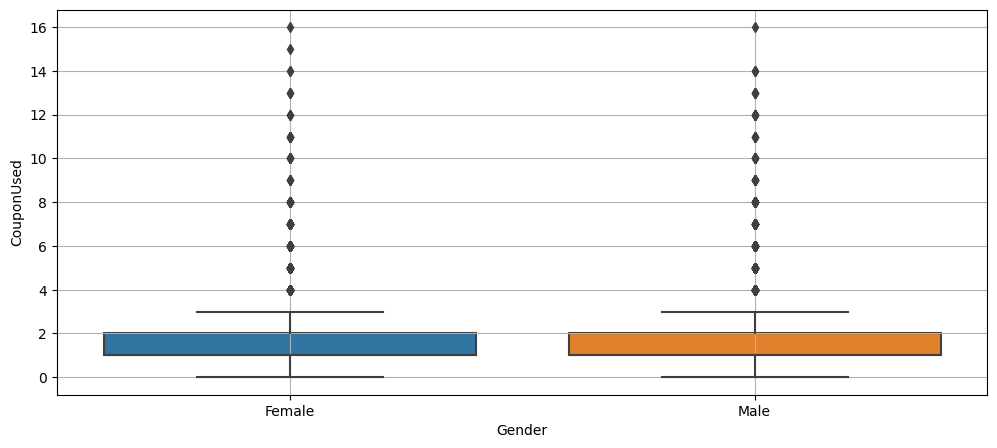

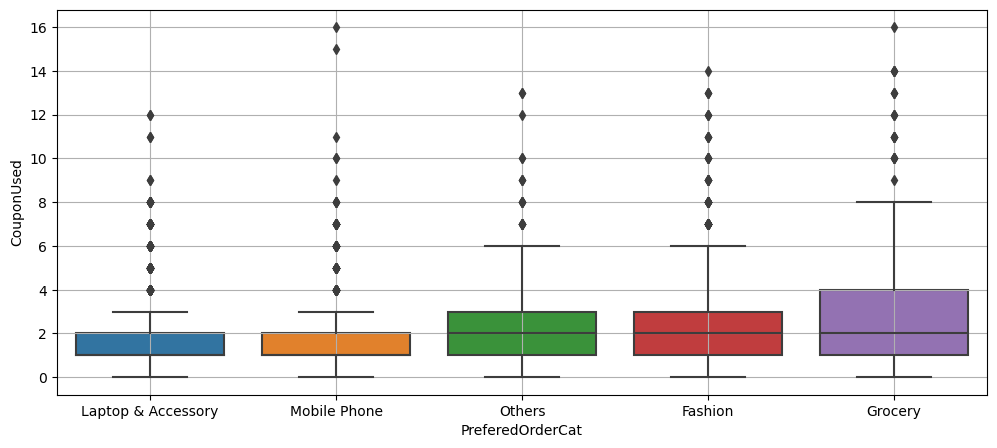

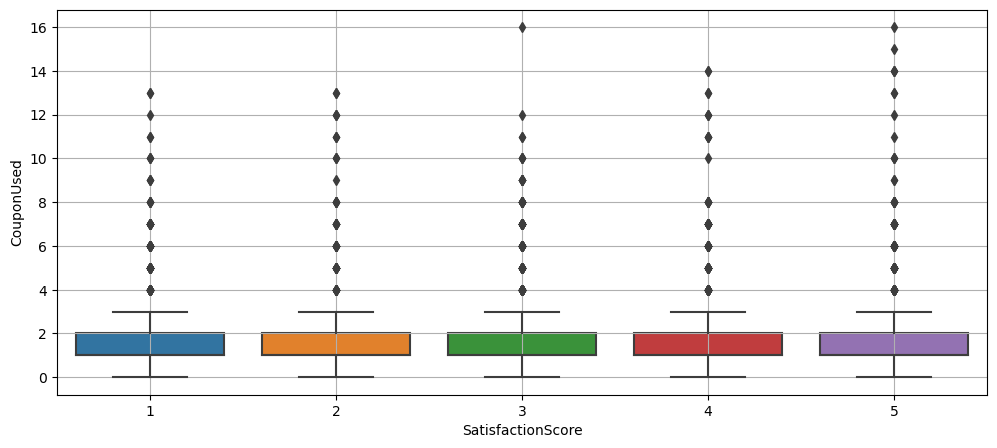

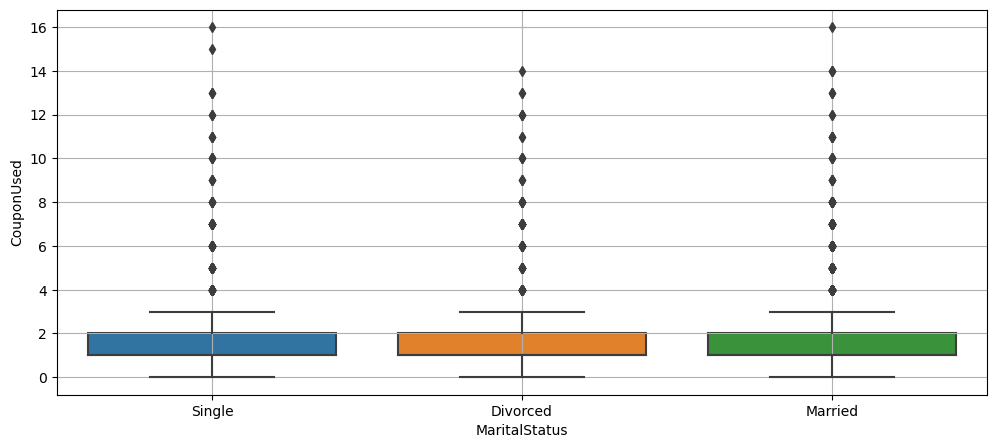

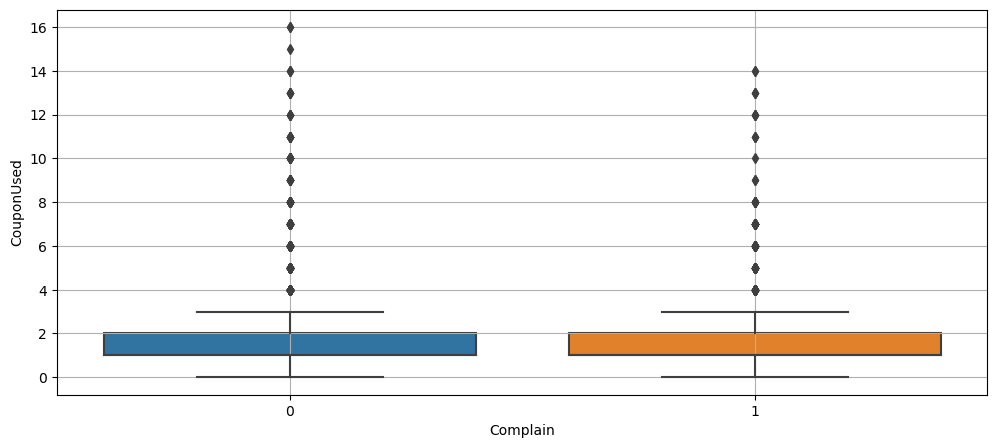

In [143]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['CouponUsed'])
    plt.grid()
    plt.show()

In [144]:
## CouponUsed varies for categories across: PreferedOrderCat

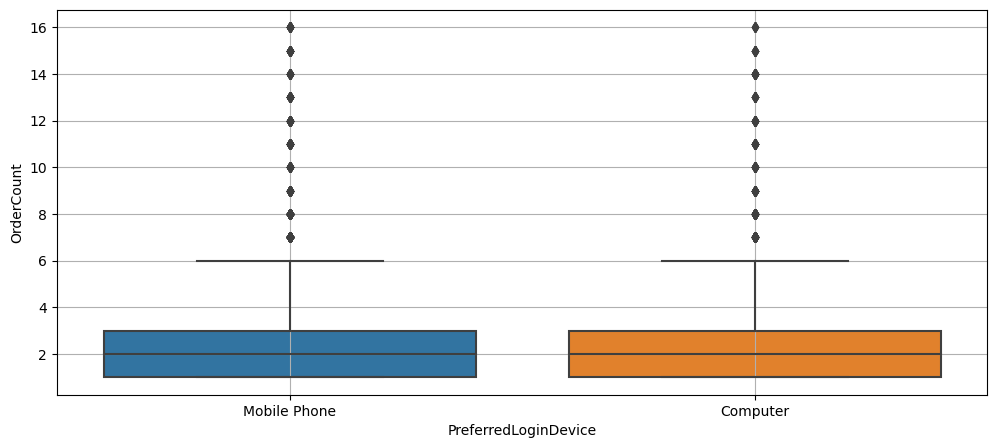

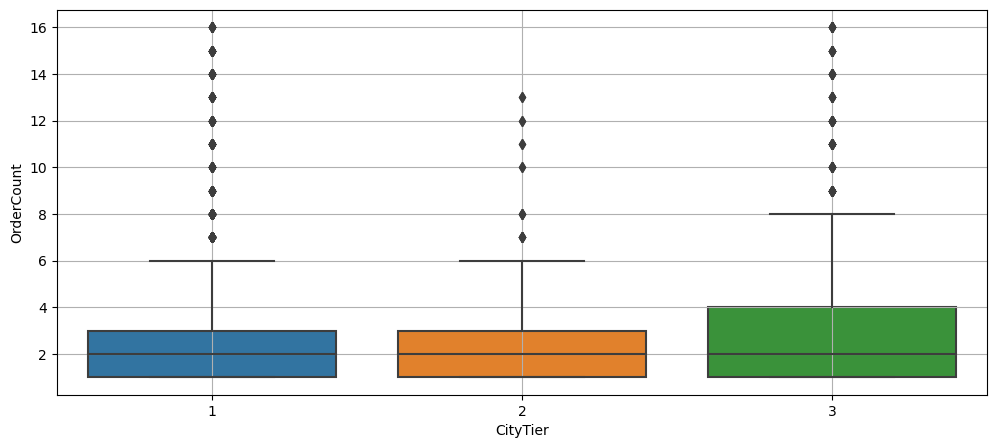

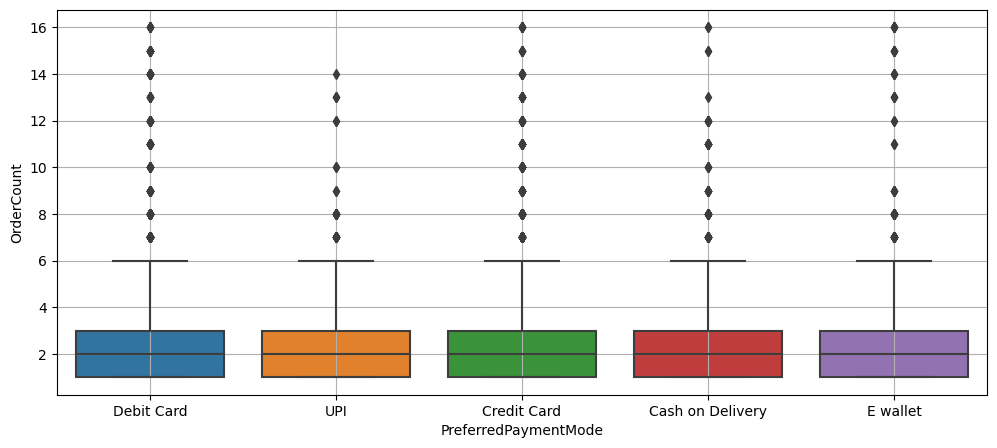

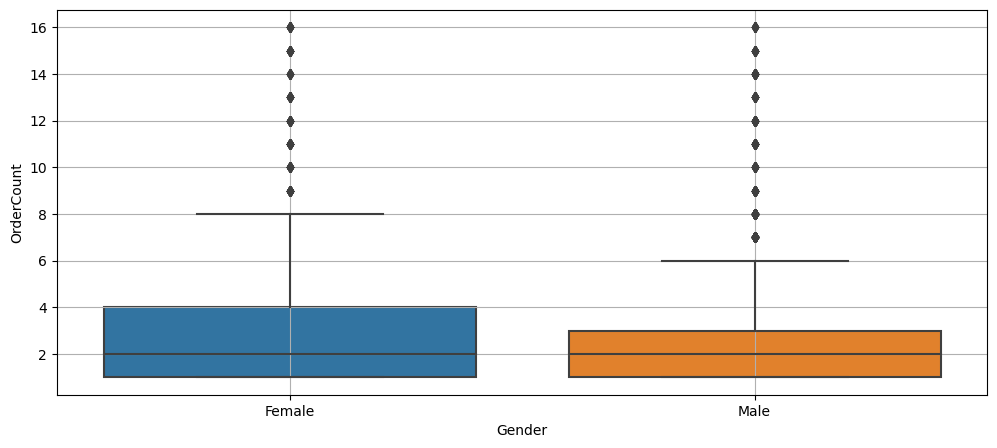

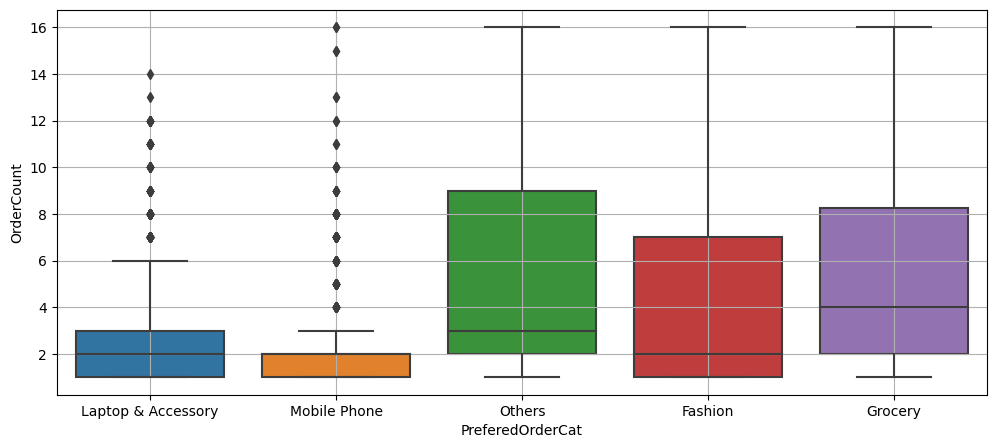

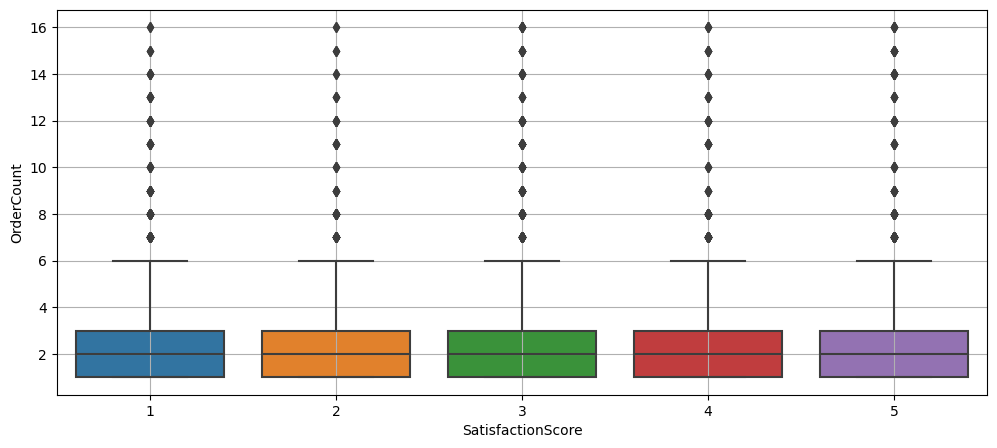

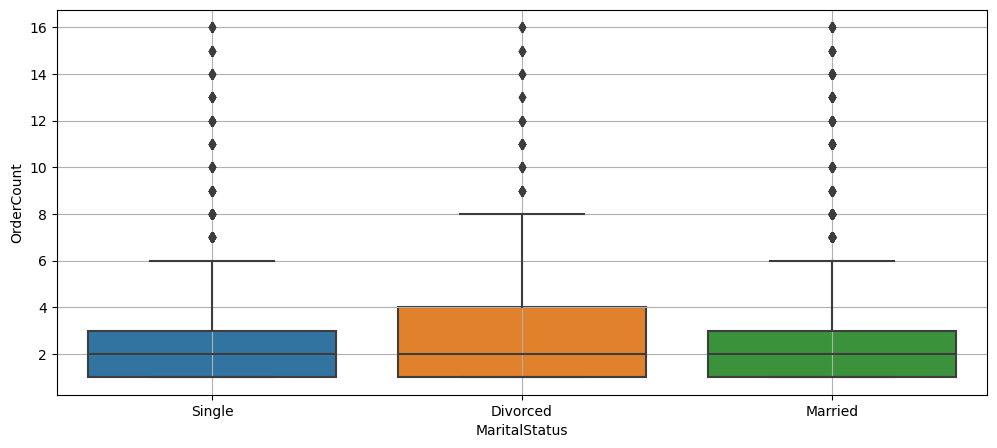

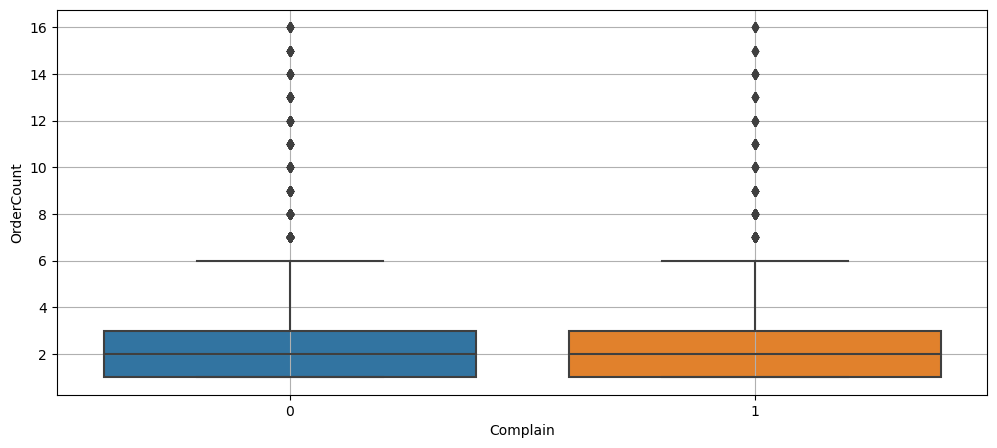

In [145]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['OrderCount'])
    plt.grid()
    plt.show()

In [146]:
## OrderCount varies for categories across: PreferredOrderCat

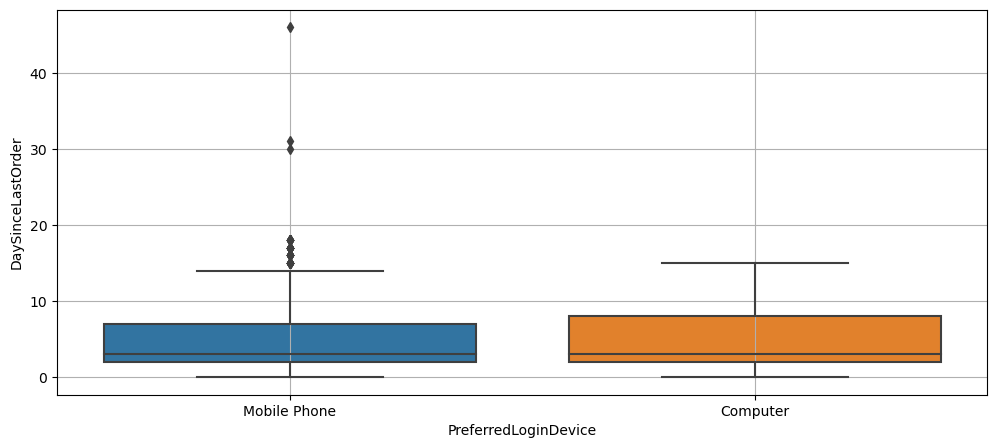

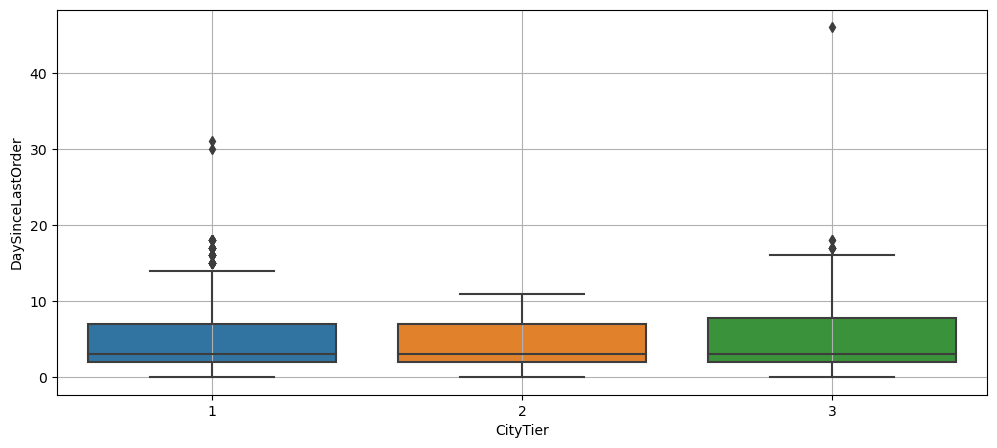

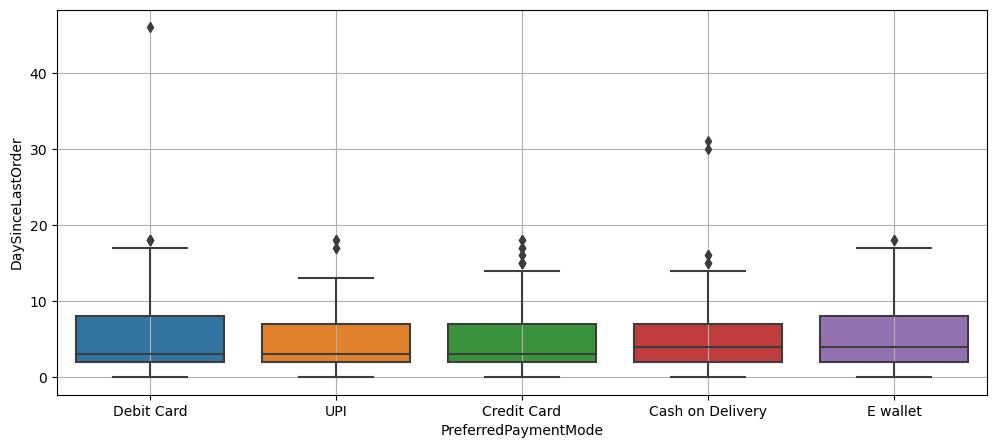

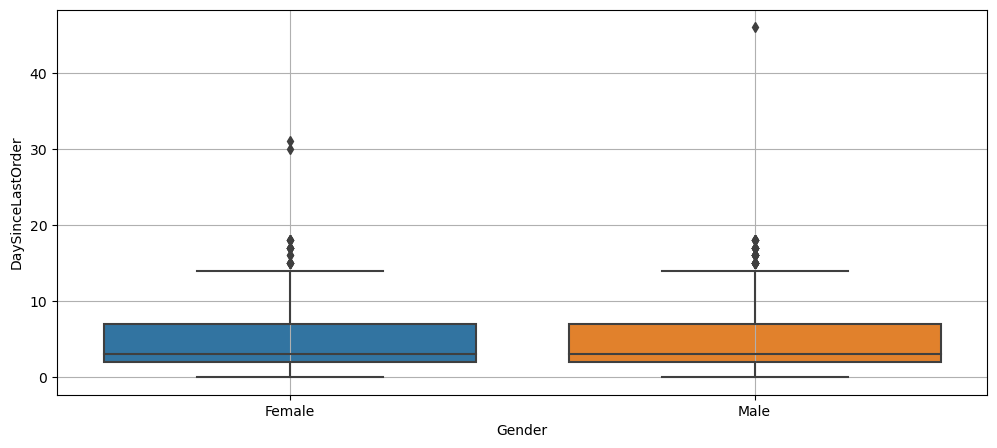

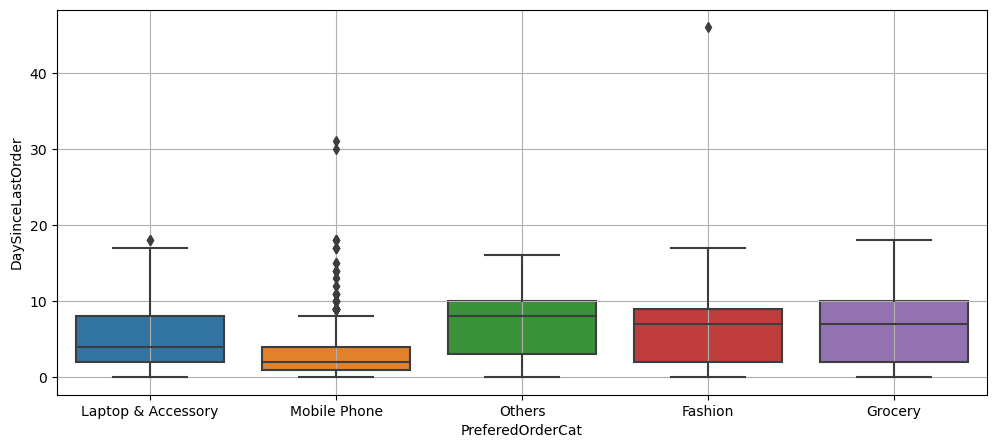

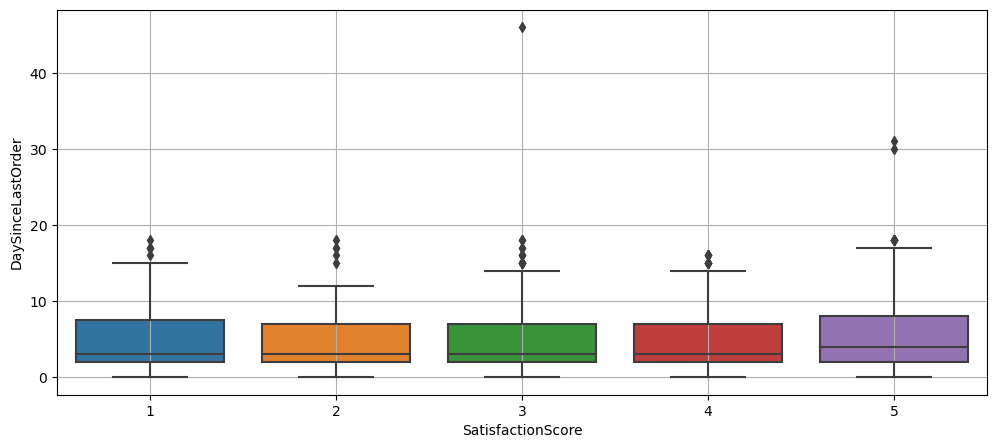

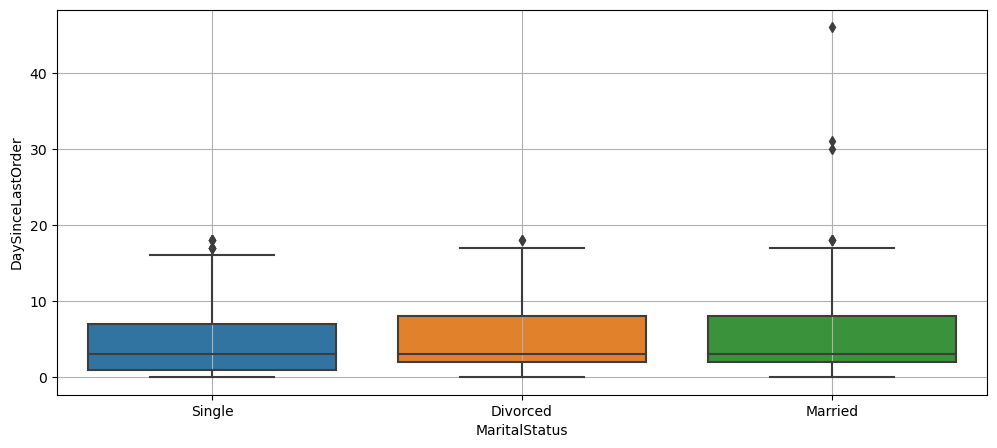

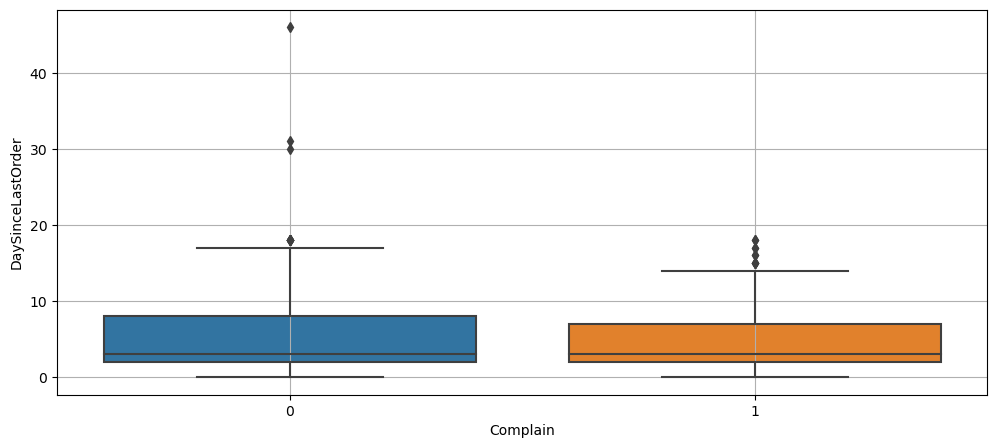

In [147]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['DaySinceLastOrder'])
    plt.grid()
    plt.show()

In [148]:
## DaySinceLastOrder varies for categories across:: PreferedOrderCat

#### Observation: It appears that most of the numeric variables with missing values vary with PreferedOrderCat. 

Hence PreferedOrderCat is a useful variable to segment customers: and can be used to impute missing values based on segments for each variable. <br>Only for Tenure, we will use PreferedOrderCat along with MaritalStatus to impute missing values. 

In [149]:
data_vt.groupby(['PreferedOrderCat', 'MaritalStatus'])['Tenure'].median()

PreferedOrderCat    MaritalStatus
Fashion             Divorced         11.0
                    Married          11.0
                    Single           11.0
Grocery             Divorced         21.0
                    Married          21.0
                    Single           22.0
Laptop & Accessory  Divorced          7.0
                    Married           9.0
                    Single            8.0
Mobile Phone        Divorced          5.0
                    Married           5.0
                    Single            1.0
Others              Divorced         18.5
                    Married          20.0
                    Single           21.0
Name: Tenure, dtype: float64

In [150]:
data_vt.groupby(['PreferedOrderCat'])['Tenure'].median()

PreferedOrderCat
Fashion               11.0
Grocery               21.0
Laptop & Accessory     8.0
Mobile Phone           3.0
Others                20.0
Name: Tenure, dtype: float64

In [151]:
data_vt.groupby(['PreferedOrderCat'])['DaySinceLastOrder'].median()

PreferedOrderCat
Fashion               7.0
Grocery               7.0
Laptop & Accessory    4.0
Mobile Phone          2.0
Others                8.0
Name: DaySinceLastOrder, dtype: float64

### DROPPING UNWANTED COLUMNS

In [152]:
data_vt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   object 
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

At this stage we will drop CustomerID because we won't be using it for building our model. 

In [153]:
data_vt.drop('CustomerID', axis=1, inplace=True)

In [154]:
data_vt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

We now proceed with only 19 columns

### MISSING VALUE TREATMENT

In [155]:
data_mvt = data_vt.copy()

In [156]:
data_mvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [157]:
data_mvt.head()

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0     1     4.0         Mobile Phone        3              6.0   
1     1     NaN         Mobile Phone        1              8.0   
2     1     NaN         Mobile Phone        1             30.0   
3     1     0.0         Mobile Phone        3             15.0   
4     1     0.0         Mobile Phone        1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             NaN                         3   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                 2        Single                9   
1        Mobile Phone                 3        Single                7   
2        Mobile Phone                 3        Single                6   
3  Laptop & Accessory                 5        Single                8   
4        Mobile Phone                 5        Single                3   

  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0        1                         11.0         1.0         1.0   
1        1                         15.0         0.0         1.0   
2        1                         14.0         0.0         1.0   
3        0                         23.0         0.0         1.0   
4        0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [158]:
#### Treating missing values in variable Tenure

In [159]:
data_mvt.Tenure.isnull().sum()

264

In [160]:
data_mvt['Tenure'] = data_mvt['Tenure'].fillna(data_mvt.groupby(['PreferedOrderCat','MaritalStatus'])['Tenure'].transform('median'))

In [161]:
data_mvt.Tenure.isnull().sum()

0

In [162]:
#### Treating missing values for all other variables in the dataset

In [163]:
data_mvt.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [164]:
nan_cols = ['WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

In [165]:
for col in nan_cols:
    data_mvt[col] = data_mvt[col].fillna(data_mvt.groupby('PreferedOrderCat')[col].transform('median'))
    

In [166]:
data_mvt.isnull().sum().sum()

0

### OUTLIER TREATMENT

In [167]:
data_omv = data_mvt.copy()

In [168]:
data_omv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

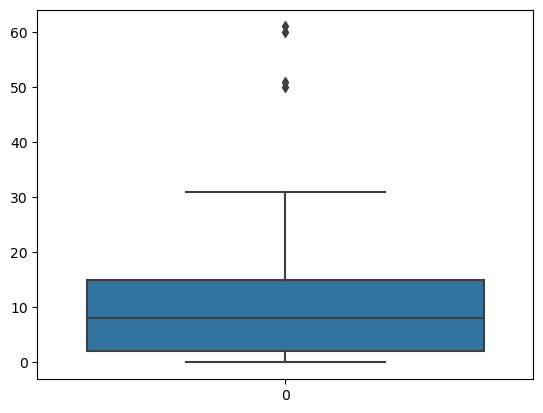

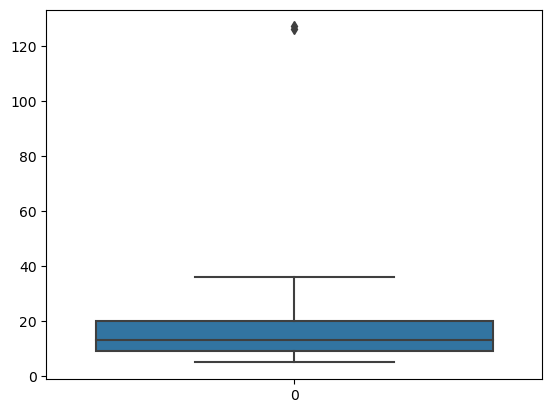

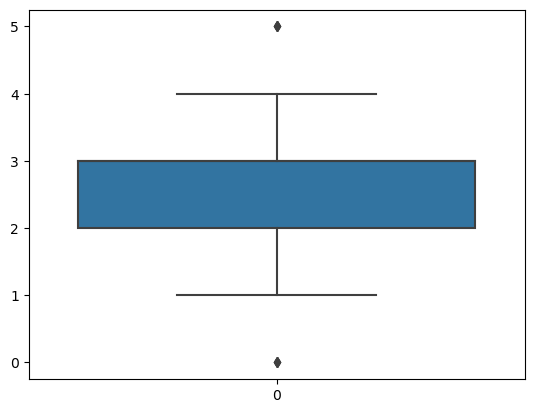

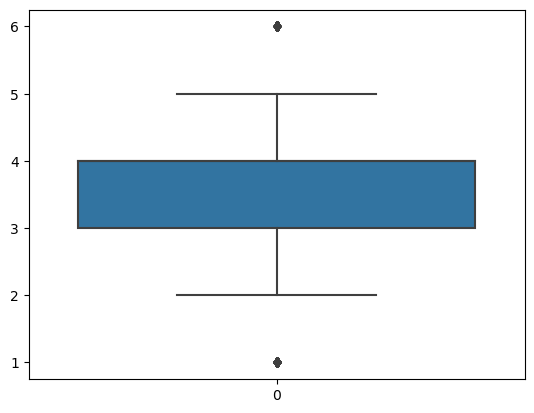

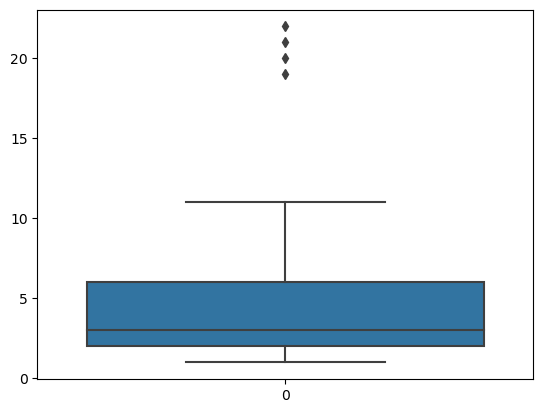

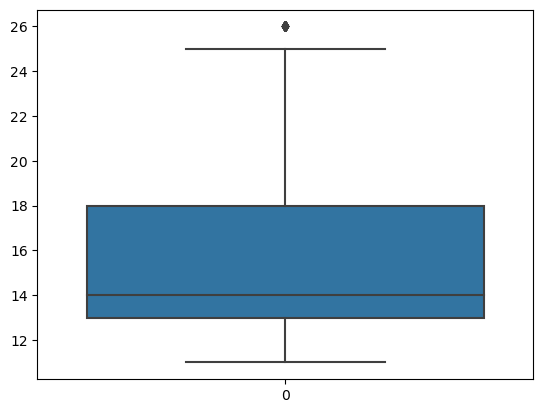

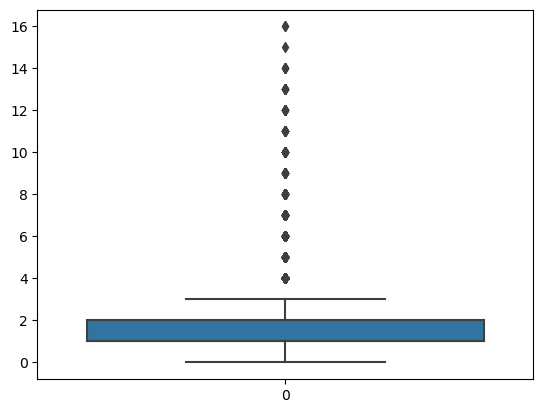

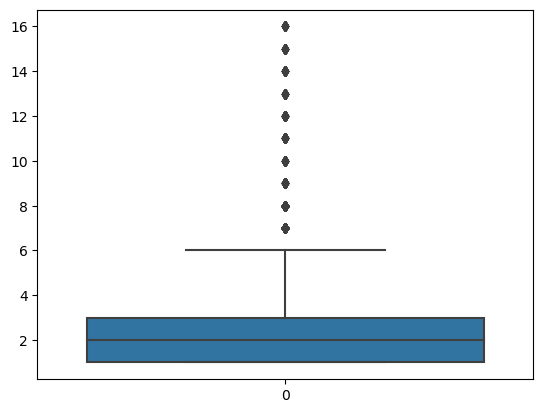

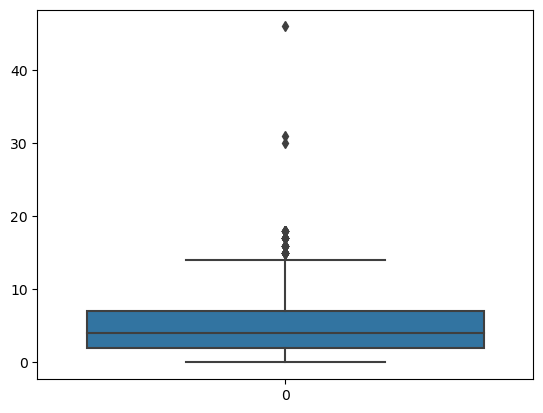

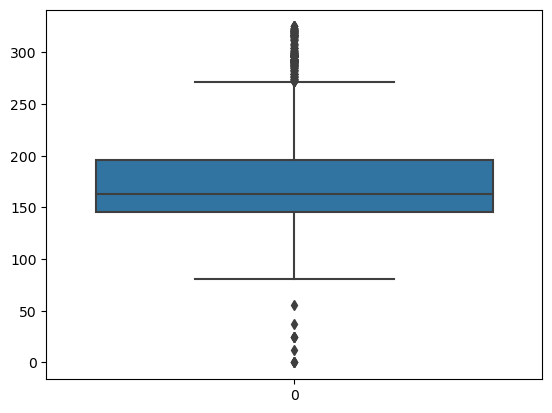

In [169]:
for column in data_num:
    sns.boxplot(data_omv[column])
    plt.show()

#### NOTE
Of the values depicted as outliers in the above boxplots:<br>
1. Tenure, WarehouseToHome, NumberOfAddress have extreme values, which are true outliers and can be capped at the Q3 + (1.5 * IQR) level
2. CouponUsed and OrderCount are valid observations, and can represent a class of high users. So we can cap them at the 99 percentile levels.
3. DaySinceLastOrder has a value of 46, which appears to be wrong, as it should not exceed 31. We will impute this with the median value, using segmentation based on variable PreferedOrderCat - similar to our missing value treatment.


In [170]:
## making 2 sets of variables
out1 = ['Tenure', 'WarehouseToHome', 'NumberOfAddress']
out2 = ['CouponUsed', 'OrderCount']

In [171]:
## the following function returns the upper and lower limits (based on the IQR measure), and the max limits based on the 99 percentile value. 

def outlier_limits(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_lim= Q1-(1.5 * IQR)
    upper_lim= Q3+(1.5 * IQR)
    max_lower_lim = col.quantile(.01)
    max_upper_lim = col.quantile(.99)
    return lower_lim, upper_lim, max_lower_lim, max_upper_lim



In [172]:
for column in data_num:
    print(column, outlier_limits(data_omv[column]))

Tenure (-17.5, 34.5, 0.0, 30.0)
WarehouseToHome (-7.5, 36.5, 6.0, 35.0)
HourSpendOnApp (0.5, 4.5, 2.0, 4.0)
NumberOfDeviceRegistered (1.5, 5.5, 1.0, 6.0)
NumberOfAddress (-4.0, 12.0, 1.0, 11.0)
OrderAmountHikeFromlastYear (5.5, 25.5, 11.0, 25.0)
CouponUsed (-0.5, 3.5, 0.0, 9.0)
OrderCount (-2.0, 6.0, 1.0, 14.0)
DaySinceLastOrder (-5.5, 14.5, 0.0, 15.0)
CashbackAmount (71.0, 271.0, 116.0, 318.71000000000004)


In [173]:
## Treating set 1
for column in out1:
    ll,ul,mll,mul=outlier_limits(data_omv[column])
    data_omv[column]=np.where(data_omv[column]>ul,ul,data_omv[column])


In [174]:
## Treating set 2
for column in out2:
    ll,ul,mll,mul=outlier_limits(data_omv[column])
    data_omv[column]=np.where(data_omv[column]>mul,mul,data_omv[column])


In [175]:
data_omv.groupby(['PreferedOrderCat'])['DaySinceLastOrder'].median()

PreferedOrderCat
Fashion               7.0
Grocery               7.0
Laptop & Accessory    4.0
Mobile Phone          2.0
Others                8.0
Name: DaySinceLastOrder, dtype: float64

In [176]:
data_omv[data_omv['DaySinceLastOrder']==46]

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
2040     1     0.0         Mobile Phone        3              6.0   

     PreferredPaymentMode Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
2040           Debit Card   Male             2.0                         4   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
2040          Fashion                 3       Married              6.0   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
2040        0                         11.0         5.0        11.0   

      DaySinceLastOrder  CashbackAmount  
2040               46.0             206

In [177]:
## Treating the apparently wrong value in DaySinceLastOrder, with the median value (segmented by PreferedOrderCat)
data_omv['DaySinceLastOrder']=np.where(data_omv['DaySinceLastOrder']==46,7,data_omv['DaySinceLastOrder'])


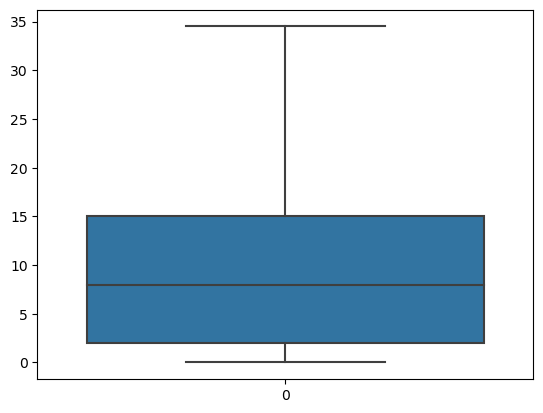

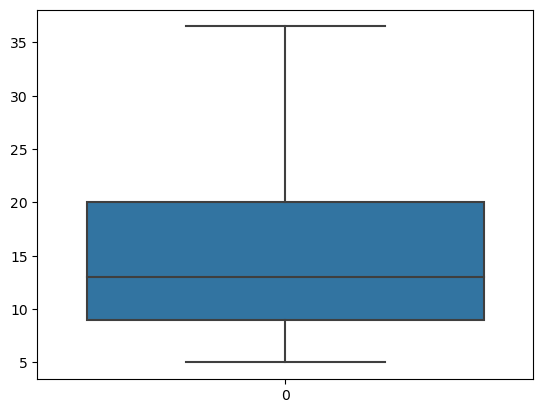

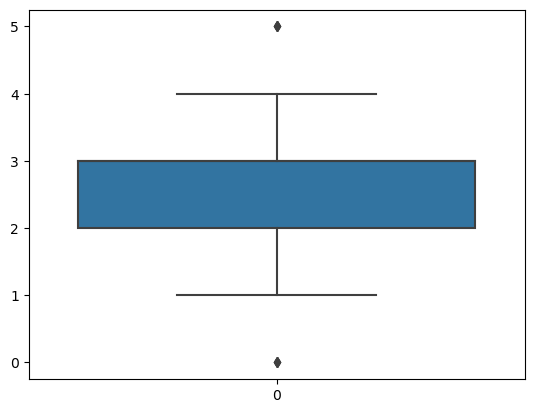

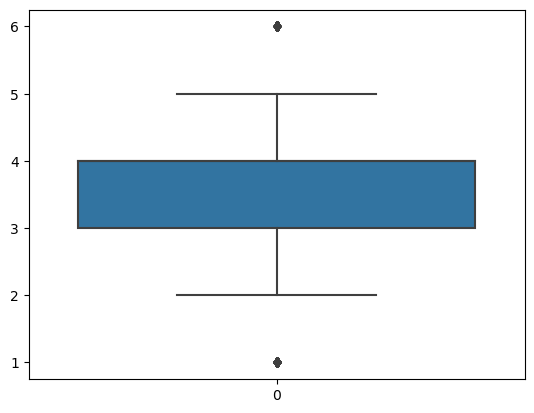

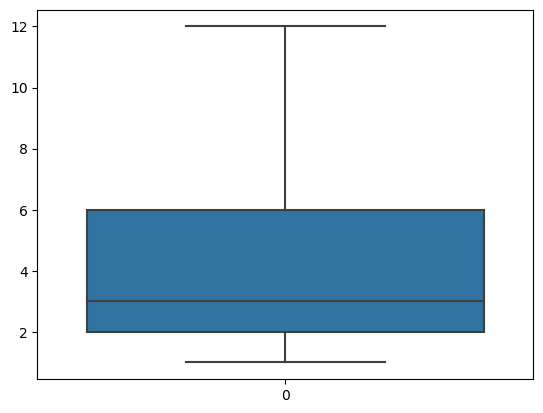

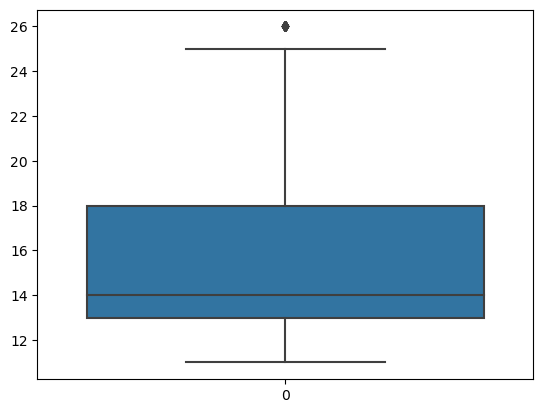

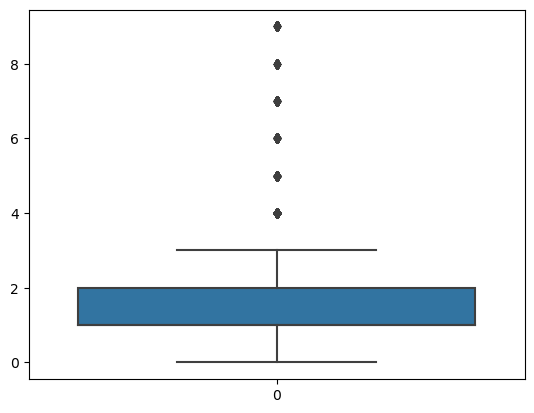

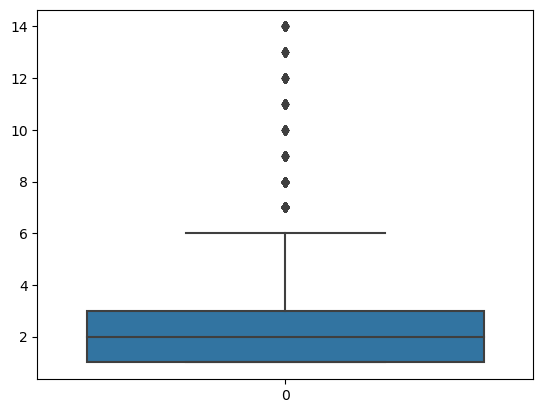

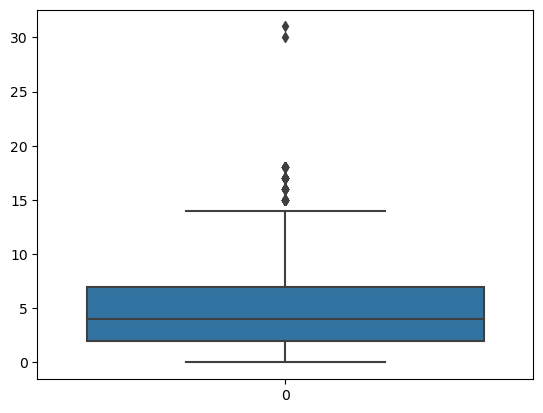

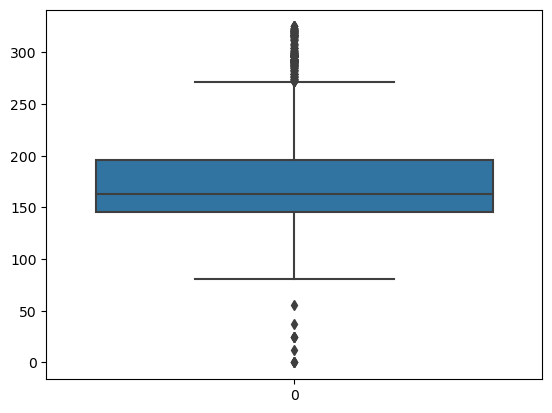

In [178]:
for column in data_num:
    sns.boxplot(data_omv[column])
    plt.show()

In [179]:
data_omv.head()

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0     1     4.0         Mobile Phone        3              6.0   
1     1     1.0         Mobile Phone        1              8.0   
2     1     1.0         Mobile Phone        1             30.0   
3     1     0.0         Mobile Phone        3             15.0   
4     1     0.0         Mobile Phone        1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             3.0                         3   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                 2        Single              9.0   
1        Mobile Phone                 3        Single              7.0   
2        Mobile Phone                 3        Single              6.0   
3  Laptop & Accessory                 5        Single              8.0   
4        Mobile Phone                 5        Single              3.0   

  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0        1                         11.0         1.0         1.0   
1        1                         15.0         0.0         1.0   
2        1                         14.0         0.0         1.0   
3        0                         23.0         0.0         1.0   
4        0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [180]:
data_omv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

### ENCODING

In [181]:
data_omv.describe(include='object').T

count unique           top  freq
Churn                 5630      2             0  4682
PreferredLoginDevice  5630      2  Mobile Phone  3996
CityTier              5630      3             1  3666
PreferredPaymentMode  5630      5    Debit Card  2314
Gender                5630      2          Male  3384
PreferedOrderCat      5630      5  Mobile Phone  2080
SatisfactionScore     5630      5             3  1698
MaritalStatus         5630      3       Married  2986
Complain              5630      2             0  4026

In [182]:
data_com = data_omv.copy()

In [183]:
data_com.head()

Churn  Tenure PreferredLoginDevice CityTier  WarehouseToHome  \
0     1     4.0         Mobile Phone        3              6.0   
1     1     1.0         Mobile Phone        1              8.0   
2     1     1.0         Mobile Phone        1             30.0   
3     1     0.0         Mobile Phone        3             15.0   
4     1     0.0         Mobile Phone        1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             3.0                         3   

     PreferedOrderCat SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                 2        Single              9.0   
1        Mobile Phone                 3        Single              7.0   
2        Mobile Phone                 3        Single              6.0   
3  Laptop & Accessory                 5        Single              8.0   
4        Mobile Phone                 5        Single              3.0   

  Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0        1                         11.0         1.0         1.0   
1        1                         15.0         0.0         1.0   
2        1                         14.0         0.0         1.0   
3        0                         23.0         0.0         1.0   
4        0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [184]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [185]:
data_com.describe(include='object').T

count unique           top  freq
Churn                 5630      2             0  4682
PreferredLoginDevice  5630      2  Mobile Phone  3996
CityTier              5630      3             1  3666
PreferredPaymentMode  5630      5    Debit Card  2314
Gender                5630      2          Male  3384
PreferedOrderCat      5630      5  Mobile Phone  2080
SatisfactionScore     5630      5             3  1698
MaritalStatus         5630      3       Married  2986
Complain              5630      2             0  4026

In [186]:
## convert binary variables: Churn (target) and Complain to numeric
data_com[['Churn','Complain']] = data_com[['Churn','Complain']].astype('int64')

In [187]:
## convert ordinal variable: Satisfaction Score to numeric
data_com['SatisfactionScore'] = data_com['SatisfactionScore'].astype('int64')

In [188]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [189]:
data_com.describe(include='object').T

count unique           top  freq
PreferredLoginDevice  5630      2  Mobile Phone  3996
CityTier              5630      3             1  3666
PreferredPaymentMode  5630      5    Debit Card  2314
Gender                5630      2          Male  3384
PreferedOrderCat      5630      5  Mobile Phone  2080
MaritalStatus         5630      3       Married  2986

In [190]:
data_com = pd.get_dummies(data_com, drop_first=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10048\480027801.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_com = pd.get_dummies(data_com, drop_first=True)


In [191]:
data_com.head()

Churn  Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0      1     4.0              6.0             3.0                         3   
1      1     1.0              8.0             3.0                         4   
2      1     1.0             30.0             2.0                         4   
3      1     0.0             15.0             2.0                         4   
4      1     0.0             12.0             3.0                         3   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  2              9.0         1                         11.0   
1                  3              7.0         1                         15.0   
2                  3              6.0         1                         14.0   
3                  5              8.0         0                         23.0   
4                  5              3.0         0                         11.0   

   CouponUsed  ...  PreferredPaymentMode_Debit Card  \
0         1.0  ...                                1   
1         0.0  ...                                0   
2         0.0  ...                                1   
3         0.0  ...                                1   
4         1.0  ...                                0   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender_Male  \
0                              0                         0            0   
1                              0                         1            1   
2                              0                         0            1   
3                              0                         0            1   
4                              0                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                         0                                    1   
1                         0                                    0   
2                         0                                    0   
3                         0                                    1   
4                         0                                    0   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              1                        0   
2                              1                        0   
3                              0                        0   
4                              1                        0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     1  

[5 rows x 27 columns]

In [192]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   Tenure                               5630 non-null   float64
 2   WarehouseToHome                      5630 non-null   float64
 3   HourSpendOnApp                       5630 non-null   float64
 4   NumberOfDeviceRegistered             5630 non-null   int64  
 5   SatisfactionScore                    5630 non-null   int64  
 6   NumberOfAddress                      5630 non-null   float64
 7   Complain                             5630 non-null   int64  
 8   OrderAmountHikeFromlastYear          5630 non-null   float64
 9   CouponUsed                           5630 non-null   float64
 10  OrderCount                           5630 non-null   float64
 11  DaySinceLastOrder             

In [193]:
data_com.describe().T

count        mean        std   min  \
Churn                                5630.0    0.168384   0.374240   0.0   
Tenure                               5630.0    9.871936   8.414469   0.0   
WarehouseToHome                      5630.0   15.491829   8.100021   5.0   
HourSpendOnApp                       5630.0    2.934636   0.705528   0.0   
NumberOfDeviceRegistered             5630.0    3.688988   1.023999   1.0   
SatisfactionScore                    5630.0    3.066785   1.380194   1.0   
NumberOfAddress                      5630.0    4.207993   2.555111   1.0   
Complain                             5630.0    0.284902   0.451408   0.0   
OrderAmountHikeFromlastYear          5630.0   15.627531   3.606116  11.0   
CouponUsed                           5630.0    1.737123   1.723101   0.0   
OrderCount                           5630.0    2.991119   2.821433   1.0   
DaySinceLastOrder                    5630.0    4.642274   3.547899   0.0   
CashbackAmount                       5630.0  177.221492  49.193869   0.0   
PreferredLoginDevice_Mobile Phone    5630.0    0.709769   0.453909   0.0   
CityTier_2                           5630.0    0.042984   0.202839   0.0   
CityTier_3                           5630.0    0.305861   0.460812   0.0   
PreferredPaymentMode_Credit Card     5630.0    0.315098   0.464596   0.0   
PreferredPaymentMode_Debit Card      5630.0    0.411012   0.492061   0.0   
PreferredPaymentMode_E wallet        5630.0    0.109059   0.311740   0.0   
PreferredPaymentMode_UPI             5630.0    0.073535   0.261035   0.0   
Gender_Male                          5630.0    0.601066   0.489723   0.0   
PreferedOrderCat_Grocery             5630.0    0.072824   0.259871   0.0   
PreferedOrderCat_Laptop & Accessory  5630.0    0.364121   0.481225   0.0   
PreferedOrderCat_Mobile Phone        5630.0    0.369449   0.482699   0.0   
PreferedOrderCat_Others              5630.0    0.046892   0.211426   0.0   
MaritalStatus_Married                5630.0    0.530373   0.499121   0.0   
MaritalStatus_Single                 5630.0    0.319005   0.466133   0.0   

                                       25%    50%    75%    max  
Churn                                  0.0    0.0    0.0    1.0  
Tenure                                 2.0    8.0   15.0   34.5  
WarehouseToHome                        9.0   13.0   20.0   36.5  
HourSpendOnApp                         2.0    3.0    3.0    5.0  
NumberOfDeviceRegistered               3.0    4.0    4.0    6.0  
SatisfactionScore                      2.0    3.0    4.0    5.0  
NumberOfAddress                        2.0    3.0    6.0   12.0  
Complain                               0.0    0.0    1.0    1.0  
OrderAmountHikeFromlastYear           13.0   14.0   18.0   26.0  
CouponUsed                             1.0    1.0    2.0    9.0  
OrderCount                             1.0    2.0    3.0   14.0  
DaySinceLastOrder                      2.0    4.0    7.0   31.0  
CashbackAmount                       146.0  163.0  196.0  325.0  
PreferredLoginDevice_Mobile Phone      0.0    1.0    1.0    1.0  
CityTier_2                             0.0    0.0    0.0    1.0  
CityTier_3                             0.0    0.0    1.0    1.0  
PreferredPaymentMode_Credit Card       0.0    0.0    1.0    1.0  
PreferredPaymentMode_Debit Card        0.0    0.0    1.0    1.0  
PreferredPaymentMode_E wallet          0.0    0.0    0.0    1.0  
PreferredPaymentMode_UPI               0.0    0.0    0.0    1.0  
Gender_Male                            0.0    1.0    1.0    1.0  
PreferedOrderCat_Grocery               0.0    0.0    0.0    1.0  
PreferedOrderCat_Laptop & Accessory    0.0    0.0    1.0    1.0  
PreferedOrderCat_Mobile Phone          0.0    0.0    1.0    1.0  
PreferedOrderCat_Others                0.0    0.0    0.0    1.0  
MaritalStatus_Married                  0.0    1.0    1.0    1.0  
MaritalStatus_Single                   0.0    0.0    1.0    1.0

In [194]:
X = data_com.drop('Churn', axis=1)

In [195]:
y = data_com[['Churn']]

In [196]:
X.head()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     4.0              6.0             3.0                         3   
1     1.0              8.0             3.0                         4   
2     1.0             30.0             2.0                         4   
3     0.0             15.0             2.0                         4   
4     0.0             12.0             3.0                         3   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  2              9.0         1                         11.0   
1                  3              7.0         1                         15.0   
2                  3              6.0         1                         14.0   
3                  5              8.0         0                         23.0   
4                  5              3.0         0                         11.0   

   CouponUsed  OrderCount  ...  PreferredPaymentMode_Debit Card  \
0         1.0         1.0  ...                                1   
1         0.0         1.0  ...                                0   
2         0.0         1.0  ...                                1   
3         0.0         1.0  ...                                1   
4         1.0         1.0  ...                                0   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  Gender_Male  \
0                              0                         0            0   
1                              0                         1            1   
2                              0                         0            1   
3                              0                         0            1   
4                              0                         0            1   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                         0                                    1   
1                         0                                    0   
2                         0                                    0   
3                         0                                    1   
4                         0                                    0   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
0                              0                        0   
1                              1                        0   
2                              1                        0   
3                              0                        0   
4                              1                        0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     1  

[5 rows x 26 columns]

In [197]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

In [198]:
# Initialise SMOTE object
smote = SMOTE()

In [199]:
# Separate independent and dependent variables
X = data_com.drop('Churn', axis=1)
y = data_com['Churn']

In [200]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

In [201]:
# Combine balanced X and y
data_com = pd.DataFrame(x_smote, columns=data_com.drop('Churn', axis=1).columns)
data_com['Churn'] = y_smote

data_com.head()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     4.0              6.0             3.0                         3   
1     1.0              8.0             3.0                         4   
2     1.0             30.0             2.0                         4   
3     0.0             15.0             2.0                         4   
4     0.0             12.0             3.0                         3   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  2              9.0         1                         11.0   
1                  3              7.0         1                         15.0   
2                  3              6.0         1                         14.0   
3                  5              8.0         0                         23.0   
4                  5              3.0         0                         11.0   

   CouponUsed  OrderCount  ...  PreferredPaymentMode_E wallet  \
0         1.0         1.0  ...                              0   
1         0.0         1.0  ...                              0   
2         0.0         1.0  ...                              0   
3         0.0         1.0  ...                              0   
4         1.0         1.0  ...                              0   

   PreferredPaymentMode_UPI  Gender_Male  PreferedOrderCat_Grocery  \
0                         0            0                         0   
1                         1            1                         0   
2                         0            1                         0   
3                         0            1                         0   
4                         0            1                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                    1                              0   
1                                    0                              1   
2                                    0                              1   
3                                    1                              0   
4                                    0                              1   

   PreferedOrderCat_Others  MaritalStatus_Married  MaritalStatus_Single  Churn  
0                        0                      0                     1      1  
1                        0                      0                     1      1  
2                        0                      0                     1      1  
3                        0                      0                     1      1  
4                        0                      0                     1      1  

[5 rows x 27 columns]

In [202]:
data_com.Churn.value_counts()

1    4682
0    4682
Name: Churn, dtype: int64

### Modelling using data_com

##### Split train-test sets

In [203]:
# Separate dependent and independent variables
X = data_com.drop('Churn', axis=1)
y= data_com.Churn

In [205]:
#standardise the x value by using standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [208]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30,random_state =100)

### **DecisionTreeClassifier**

In [209]:
from sklearn.tree import DecisionTreeClassifier

# Training the model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [210]:
# Predictions on test data
y_pred = dt_clf.predict(X_test)

In [212]:
# Evaluation metrics
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))
print('F1-score : ', metrics.f1_score(y_test, y_pred))
print('R2-score : ', metrics.r2_score(y_test, y_pred))
print('ROC-AUC Score :', metrics.roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1421
           1       0.94      0.96      0.95      1389

    accuracy                           0.95      2810
   macro avg       0.95      0.95      0.95      2810
weighted avg       0.95      0.95      0.95      2810

[[1337   84]
 [  62 1327]]
Accuracy : 0.9480427046263346
F1-score :  0.9478571428571428
R2-score :  0.7921438628329861
ROC-AUC Score : 0.948125135210858
